In [41]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [42]:
!pip install scikeras --upgrade
!pip install scikit-learn --upgrade

In [43]:
# First install if needed
!pip install shap pandas seaborn matplotlib  numpy tensorflow joblib lime

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from google.colab import files
import joblib
import warnings
warnings.filterwarnings("ignore")

# obtain the data url and read the data using pandas
url = 'https://docs.google.com/spreadsheets/d/14jgA7DxWGOoWM7pSSPz_eqyaQ6RIDnj3/export?format=csv'
df = pd.read_csv(url)
df.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                           1485              121.0     16.37  
1                           1485              121.0     16.37  
2                           1485              121.0     16.37  
3                           1485              121.0     16.37  
4                           1485              121.0     16.37

In [45]:
df.tail(10)

Unnamed: 0      Area            Item  Year  hg/ha_yield  \
28232       28232  Zimbabwe  Sweet potatoes  2012        22222   
28233       28233  Zimbabwe           Wheat  2012        24420   
28234       28234  Zimbabwe         Cassava  2013        46000   
28235       28235  Zimbabwe           Maize  2013         7449   
28236       28236  Zimbabwe        Potatoes  2013       165714   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
28232                            657            3375.53     20.52  
28233                            657            3375.53     20.52  
28234                            657            2550.07     19.76  
28235                            657            2550.07     19.76  
28236                            657            2550.07     19.76  
28237                            657            2550.07     19.76  
28238                            657            2550.07     19.76  
28239                            657            2550.07     19.76  
28240                            657            2550.07     19.76  
28241                            657            2550.07     19.76

In [46]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
df.rename(columns={'Item':'Crop'}, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Crop                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [49]:
shape=df.shape
print(f'The Data has {shape[0]} rows and {shape[1]} columns')

The Data has 28242 rows and 7 columns


In [50]:
df.describe(include='object').T

count unique       top  freq
Area  28242    101     India  4048
Crop  28242     10  Potatoes  4276

In [51]:
df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  28242.000000   28242.000000                    28242.00000   
mean    2001.544296   77053.332094                     1149.05598   
std        7.051905   84956.612897                      709.81215   
min     1990.000000      50.000000                       51.00000   
25%     1995.000000   19919.250000                      593.00000   
50%     2001.000000   38295.000000                     1083.00000   
75%     2008.000000  104676.750000                     1668.00000   
max     2013.000000  501412.000000                     3240.00000   

       pesticides_tonnes      avg_temp  
count       28242.000000  28242.000000  
mean        37076.909344     20.542627  
std         59958.784665      6.312051  
min             0.040000      1.300000  
25%          1702.000000     16.702500  
50%         17529.440000     21.510000  
75%         48687.880000     26.000000  
max        367778.000000     30.650000

In [52]:
df.isna().sum()

Area                             0
Crop                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [53]:
df.duplicated().sum()

np.int64(2310)

In [54]:
df.drop_duplicates()

Area            Crop  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                               1485             121.00     16.37  
1                               1485             121.00     16.37  
2                               1485             121.00     16.37  
3                               1485             121.00     16.37  
4                               1485             121.00     16.37  
...                              ...                ...       ...  
28237                            657            2550.07     19.76  
28238                            657            2550.07     19.76  
28239                            657            2550.07     19.76  
28240                            657            2550.07     19.76  
28241                            657            2550.07     19.76  

[25932 rows x 7 columns]

In [55]:
shape=df.shape
print(f'The Data has {shape[0]} rows and {shape[1]} columns')

The Data has 28242 rows and 7 columns


In [56]:
df['Crop'].value_counts()

Crop
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

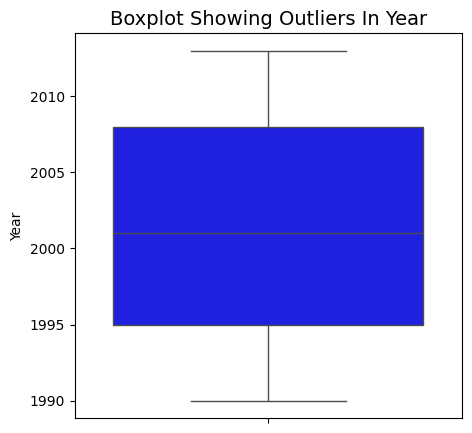

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

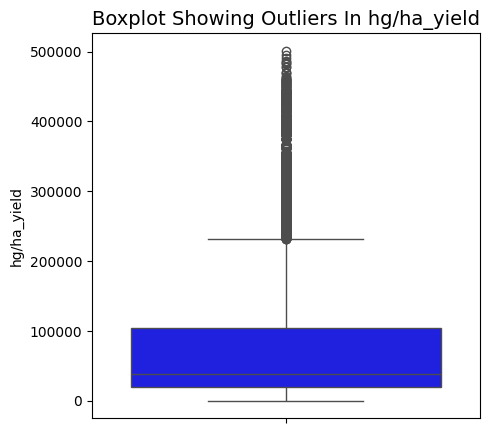

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

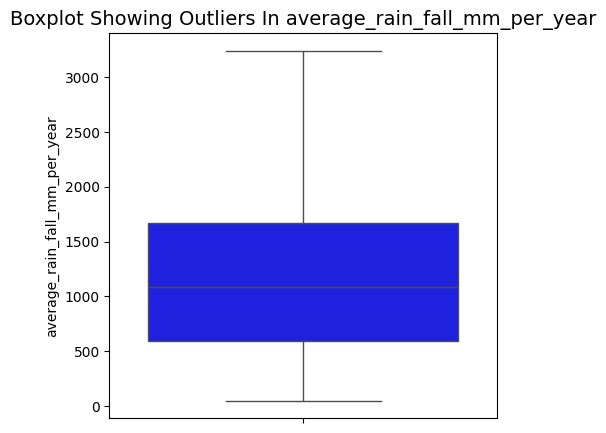

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

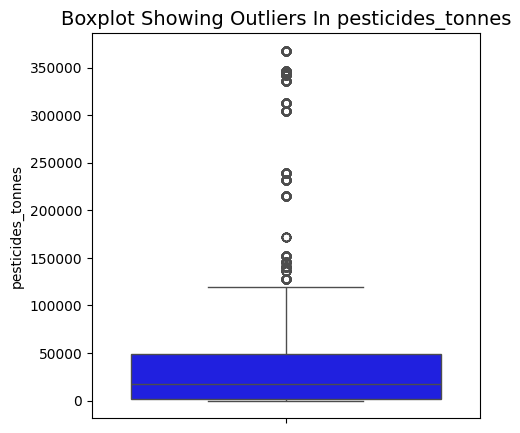

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

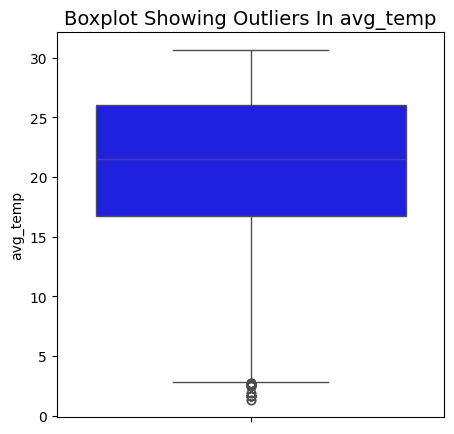

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
#Get the numerical column in the dataframe
numerical_columns= df.select_dtypes(include=['int64','float64'])
for column in numerical_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[column], color='blue')
    plt.title(f'Boxplot Showing Outliers In {column}', fontsize=14)
    # Save the figure to a file
    plt.savefig(f'outliers.png',dpi=300, bbox_inches='tight')
    plt.show()
    # Download the file in Google Colab
    files.download('outliers.png')

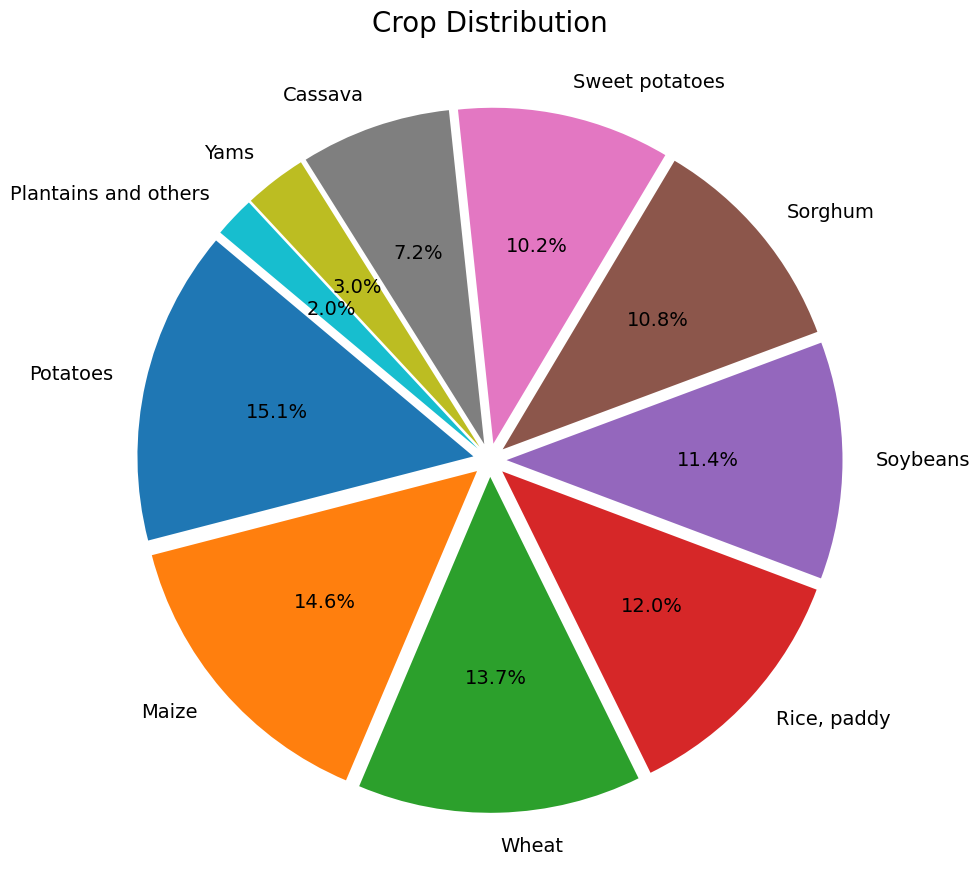

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
# Count the occurrences of each crop in the 'Crop' column of the DataFrame
crops = df['Crop'].value_counts()
# Create a figure with a fixed size for clarity
plt.figure(figsize=(10,10))
# Slightly "explode" each slice to separate them visually
explode = [0.05] * len(crops)  # Gives each slice a small offset
# Create the pie chart
plt.pie(crops,labels=crops.index,autopct='%1.1f%%',
        startangle=140,explode=explode,textprops={'fontsize': 14})
# Add a descriptive title with larger font
plt.title("Crop Distribution", fontsize=20)
# Adjust layout to ensure nothing is clipped
plt.tight_layout()
# Save the figure to a file
plt.savefig('Crop_Distribution.png',dpi=300, bbox_inches='tight')
# Display the chart
plt.show()
# Download the file in Google Colab
files.download('Crop_Distribution.png')

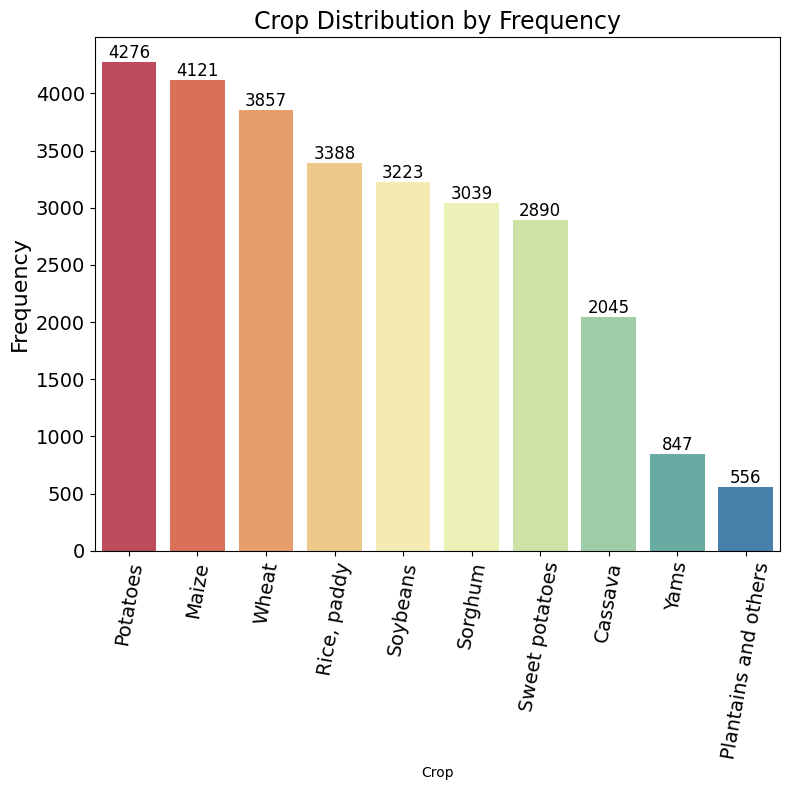

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
## Count the occurrences of each crop in the DataFrame
crops = df['Crop'].value_counts()
# Create a new DataFrame from the Series for seaborn compatibility
crop_df = crops.reset_index()
crop_df.columns = ['Crop', 'Frequency']
# Create a figure of size 8x8 inches for better visibility
plt.figure(figsize=(8, 8))
# Plot a vertical bar chart using seaborn
ax = sns.barplot(x='Crop', y='Frequency', data=crop_df, palette='Spectral', hue=crops.index)
# Rotate x-axis labels by 80 degrees and increase font size
plt.xticks(rotation=80, fontsize=14)
# Set font size of y-axis tick labels
plt.yticks(fontsize=14)
# Set axis labels with larger fonts
plt.ylabel('Frequency', fontsize=16)
# Set chart title with increased font size
plt.title('Crop Distribution by Frequency', fontsize=17)
# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
# Adjust layout to ensure nothing is clipped
plt.tight_layout()
# Save the figure to a file
plt.savefig('Crop_Distribution1.png', dpi=300, bbox_inches='tight')
# Display the chart
plt.show()
# Download the file in Google Colab
files.download('Crop_Distribution1.png')

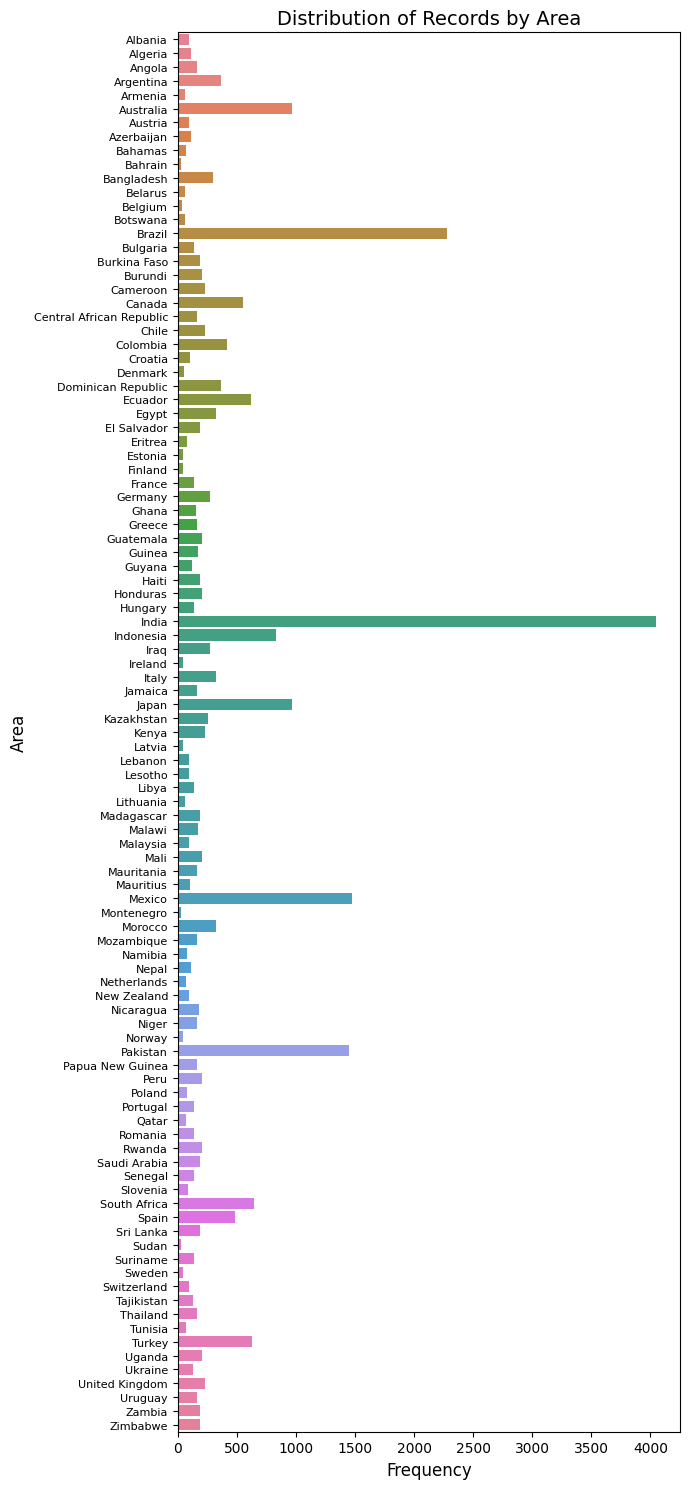

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
# Set figure size: wide vertically for long lists of areas
plt.figure(figsize=(7, 15))
# Create a countplot showing the number of occurrences for each 'Area'
sns.countplot(data=df,y='Area',palette='husl',hue='Area')
# Adjust y-axis tick font size for better readability
plt.yticks(fontsize=8)
# Add labels and title for clarity
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.title('Distribution of Records by Area', fontsize=14)
# Adjust layout to ensure nothing is clipped
plt.tight_layout()
# Save the figure to a file
plt.savefig('Area_frequency.png',dpi=300, bbox_inches='tight')
# Display the chart
plt.show()
# Download the file in Google Colab
files.download('Area_frequency.png')

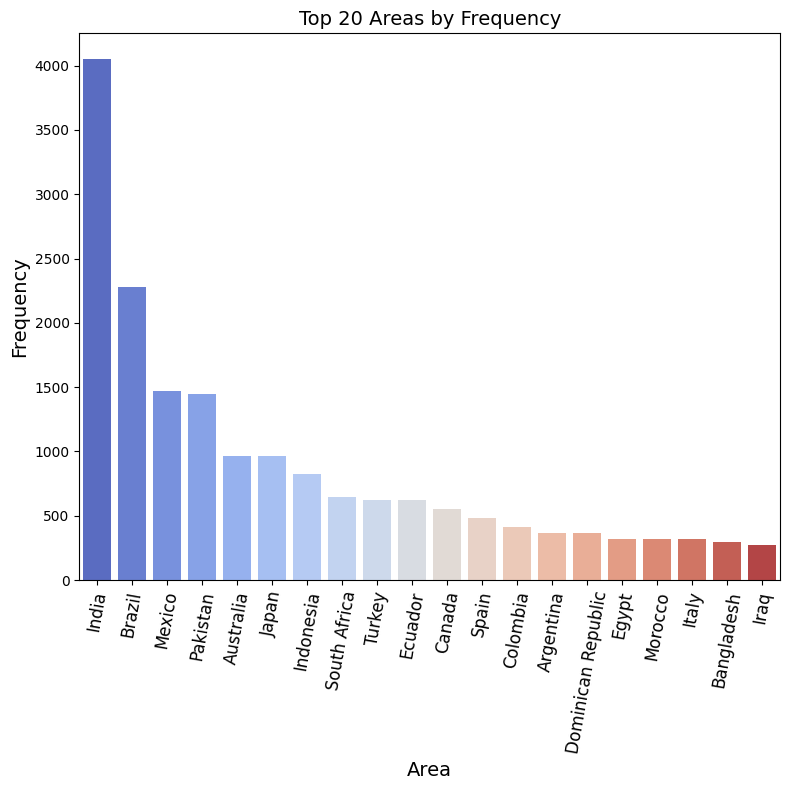

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
# Get top 20 most frequent Areas
area_counts = df['Area'].value_counts().head(20)
# Create a new figure
plt.figure(figsize=(8, 8))
# Plot a bar chart of the top 20 Areas
sns.barplot(x=area_counts.index, y=area_counts.values, palette='coolwarm',hue=area_counts.index)
# Rotate x-axis labels and set font size for readability
plt.xticks(rotation=80, fontsize=12)
# Set axis labels and title
plt.xlabel('Area', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Areas by Frequency', fontsize=14)
# Adjust layout to ensure nothing is clipped
plt.tight_layout()
# Save the figure to a file
plt.savefig('Top_frequency.png',dpi=300, bbox_inches='tight')
# Display the chart
plt.show()
# Download the file in Google Colab
files.download('Top_frequency.png')

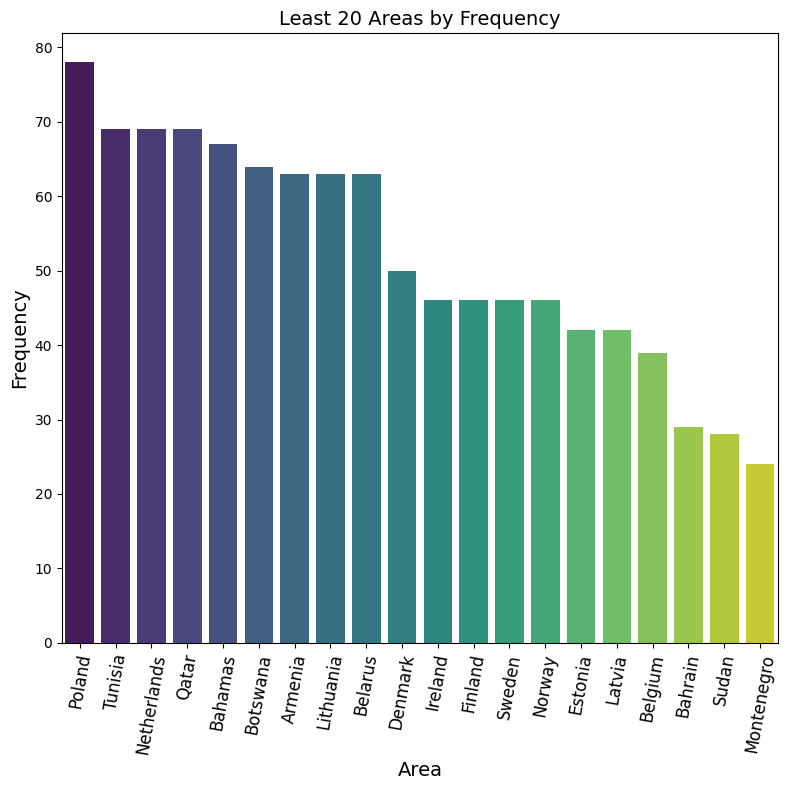

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
# Get top 20 most frequent Areas
area_counts = df['Area'].value_counts().tail(20)
# Create a new figure
plt.figure(figsize=(8, 8))
# Plot a bar chart of the top 20 Areas
sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis',hue=area_counts.index)
# Rotate x-axis labels and set font size for readability
plt.xticks(rotation=80, fontsize=12)
# Set axis labels and title
plt.xlabel('Area', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Least 20 Areas by Frequency', fontsize=14)
# Optimize layout
plt.tight_layout()
# Save the figure to a file
plt.savefig('Least_frequency.png',dpi=300, bbox_inches='tight')
# Display the chart
plt.show()
# Download the file in Google Colab
files.download('Least_frequency.png')

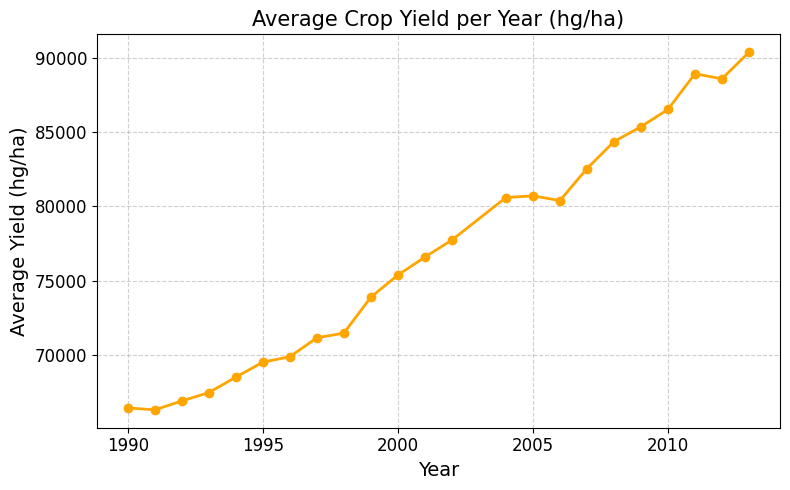

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
# Group data by 'Year' and calculate the mean of 'hg/ha_yield'
yearly_yield = df.groupby('Year')['hg/ha_yield'].mean()
# Create a line plot of average yield over time
plt.figure(figsize=(8, 5))
yearly_yield.plot(color='orange', linewidth=2, marker='o')
# Set chart title and axis labels
plt.title('Average Crop Yield per Year (hg/ha)', fontsize=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Yield (hg/ha)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add grid for better visual guidance
plt.grid(True, linestyle='--', alpha=0.6)
# Optimize layout
plt.tight_layout()
# Save the figure to a file
plt.savefig('Average_yield.png',dpi=300, bbox_inches='tight')
# Display the chart
plt.show()
# Download the file in Google Colab
files.download('Average_yield.png')

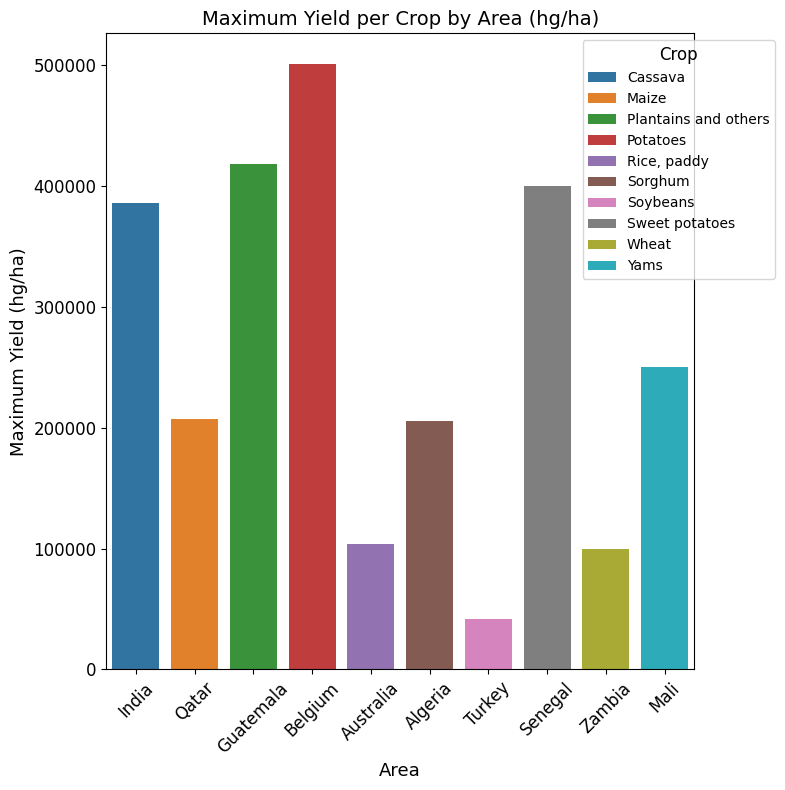

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
# Group by Crop and get the row with the highest yield per crop
best_crop = df.loc[df.groupby('Crop')['hg/ha_yield'].idxmax()][['Crop', 'Area', 'hg/ha_yield']]
# Create a bar plot of maximum yield per crop
plt.figure(figsize=(8, 8))
sns.barplot(data=best_crop,x='Area', y='hg/ha_yield', hue='Crop')
# Set the title and axis labels
plt.title('Maximum Yield per Crop by Area (hg/ha)', fontsize=14)
plt.xlabel('Area', fontsize=13)
plt.ylabel('Maximum Yield (hg/ha)', fontsize=13)
# Adjust tick label font sizes
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
# Resize and position the hue legend
plt.legend(title='Crop', title_fontsize=12, fontsize=10, loc='upper right', bbox_to_anchor=(1.15, 1))
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Maximum_yield_per_crop.png')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Maximum_yield_per_crop.png')

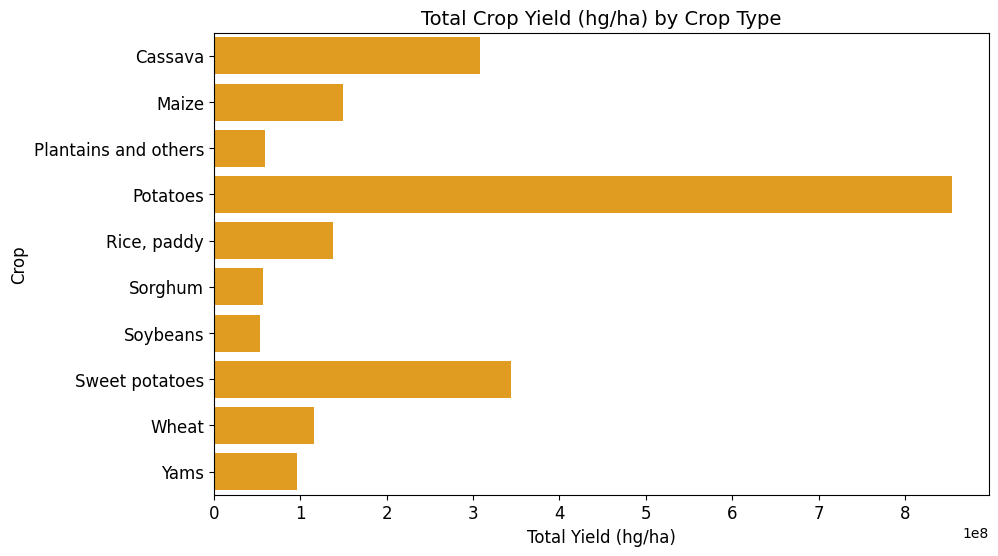

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# Group by crop and calculate **total** yield
yield_per_crop = df.groupby('Crop')['hg/ha_yield'].sum()
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=yield_per_crop.values, y=yield_per_crop.index, color='orange')
plt.title('Total Crop Yield (hg/ha) by Crop Type', fontsize=14)
plt.xlabel('Total Yield (hg/ha)', fontsize=12)
plt.ylabel('Crop', fontsize=12)
# Adjust tick label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Save the figure to a file
plt.savefig('Total_yield.png',dpi=300, bbox_inches='tight')
# Display the chart
plt.show()
# Download the file in Google Colab
files.download('Total_yield.png')

Country/Area with the best average yield:
Area           United Kingdom
hg/ha_yield     240956.478261
Name: 97, dtype: object


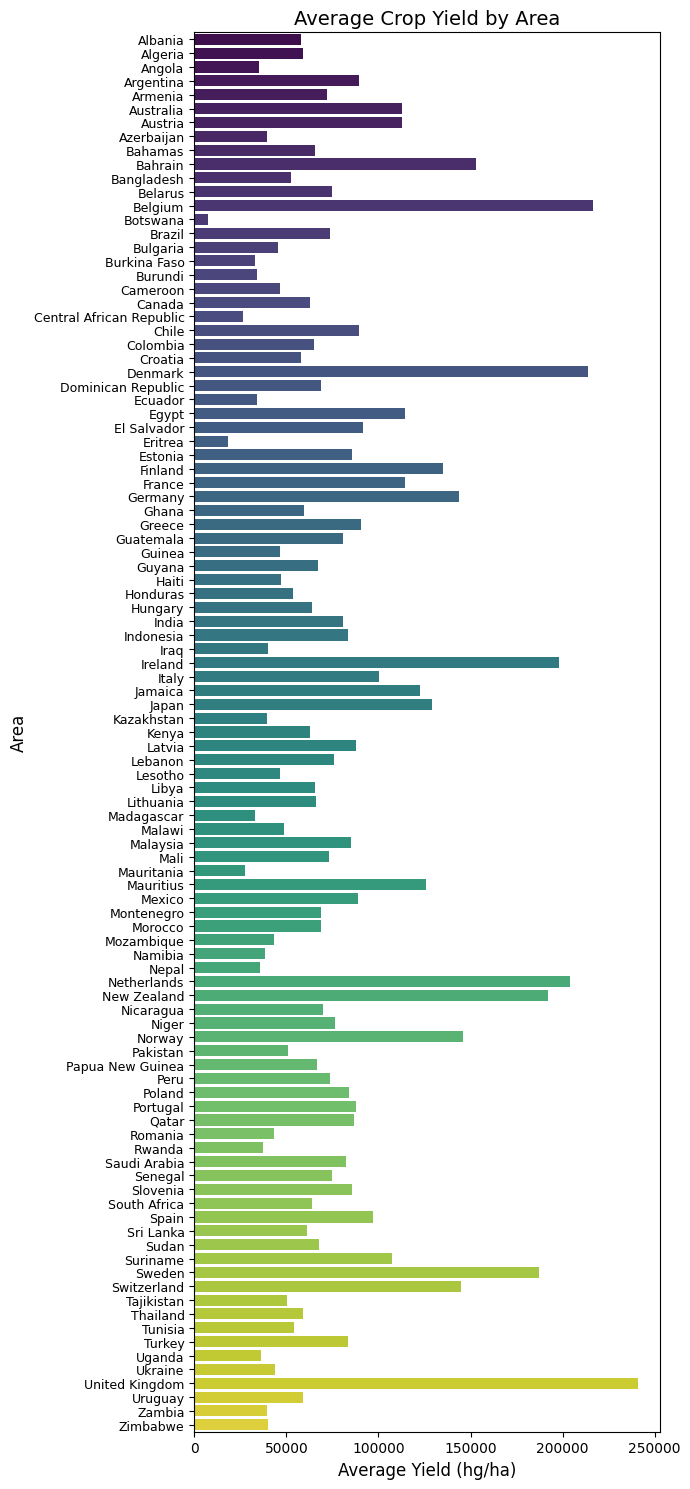

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
# Group by Area and compute average yield
Area_sum = df.groupby('Area')['hg/ha_yield'].mean().reset_index()
Area_sum.columns = ['Area', 'hg/ha_yield']

# Find the country/area with the best average yield
best_area = Area_sum.loc[Area_sum['hg/ha_yield'].idxmax()]
print("Country/Area with the best average yield:")
print(best_area)

# Plot average yield per area
plt.figure(figsize=(7, 15))
sns.barplot(data=Area_sum, x='hg/ha_yield', y='Area', hue='Area', palette="viridis")
plt.yticks(fontsize=9)
plt.xlabel('Average Yield (hg/ha)', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.title('Average Crop Yield by Area', fontsize=14)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Average_yield_per_crop.png')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Average_yield_per_crop.png')

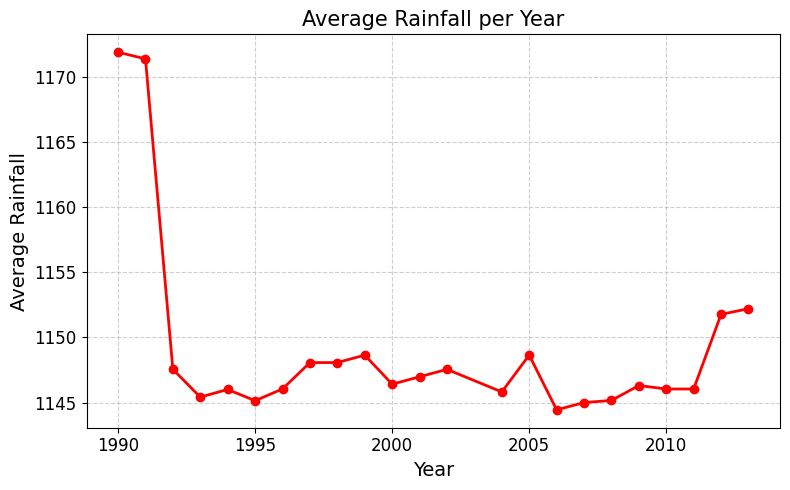

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
# Group data by 'Year' and calculate the mean of 'hg/ha_yield'
yearly_rainfall = df.groupby('Year')['average_rain_fall_mm_per_year'].mean()

# Create a line plot of average yield over time
plt.figure(figsize=(8, 5))
yearly_rainfall.plot(color='red', linewidth=2, marker='o')

# Set chart title and axis labels
plt.title('Average Rainfall per Year', fontsize=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rainfall', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add grid for better visual guidance
plt.grid(True, linestyle='--', alpha=0.6)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Average_rainfall.png')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Average_rainfall.png')

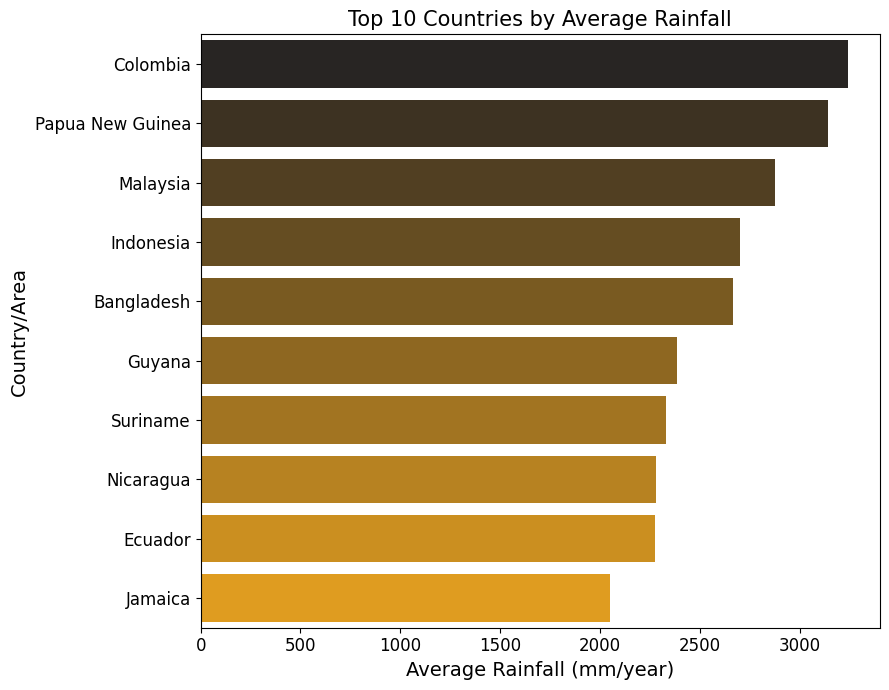

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# Group by Area and calculate average rainfall
avg_rainfall = df.groupby('Area')['average_rain_fall_mm_per_year'].mean()

# Sort in descending order and get the top 10
top10_avg_rainfall = avg_rainfall.sort_values(ascending=False).head(10)

# Convert to DataFrame for better handling
top10_df = top10_avg_rainfall.reset_index()
top10_df.columns = ['Area', 'Average_Rainfall']

# Plot
plt.figure(figsize=(9,7))
sns.barplot(data=top10_df, x='Average_Rainfall', y='Area', palette='dark:orange', hue='Area')

# Chart styling
plt.title('Top 10 Countries by Average Rainfall', fontsize=15)
plt.xlabel('Average Rainfall (mm/year)', fontsize=14)
plt.ylabel('Country/Area', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Top10_Average_rainfall.png')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Top10_Average_rainfall.png')

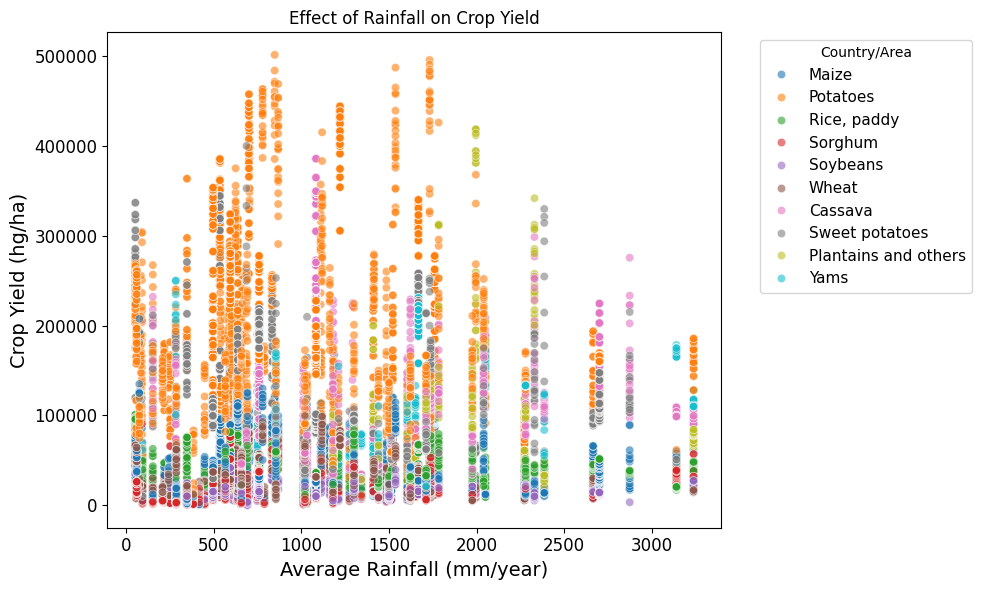

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='hg/ha_yield', hue='Crop', alpha=0.6)

plt.title('Effect of Rainfall on Crop Yield', fontsize=12)
plt.xlabel('Average Rainfall (mm/year)', fontsize=14)
plt.ylabel('Crop Yield (hg/ha)', fontsize=14)
plt.legend(title='Country/Area', bbox_to_anchor=(1.05, 1),fontsize=11)
# plt.legend(title='Country/Area', bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust tick label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Rainfall_effect.png')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Rainfall_effect.png')

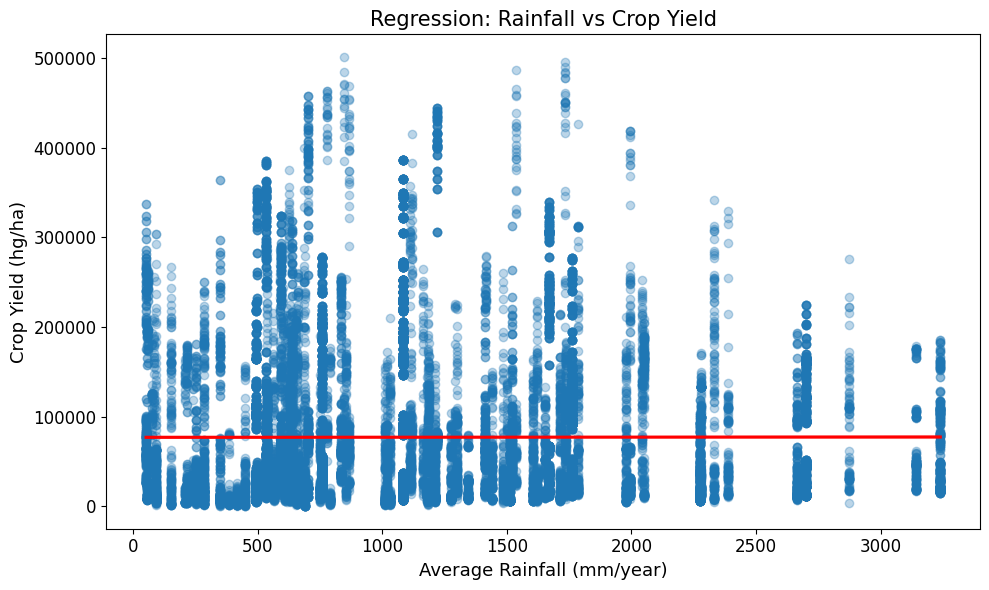

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='average_rain_fall_mm_per_year', y='hg/ha_yield', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Regression: Rainfall vs Crop Yield', fontsize=15)
plt.xlabel('Average Rainfall (mm/year)', fontsize=13)
plt.ylabel('Crop Yield (hg/ha)', fontsize=13)
# Adjust tick label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Rainfall_cropyield.png')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Rainfall_cropyield.png')

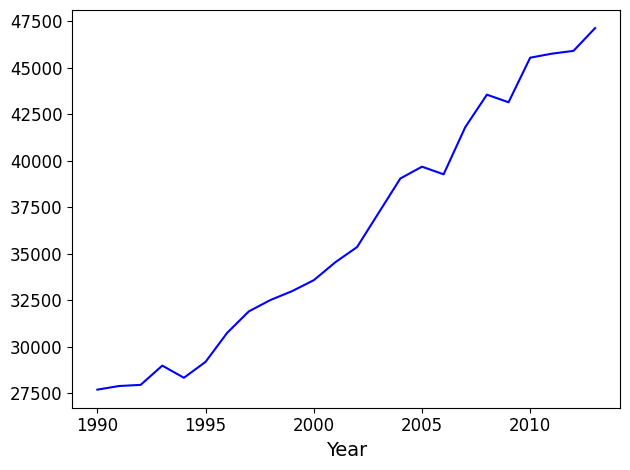

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
df2=df[df['Crop']=='Maize']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='blue')
plt.xlabel('Year',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('maize_yield.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('maize_yield.png')

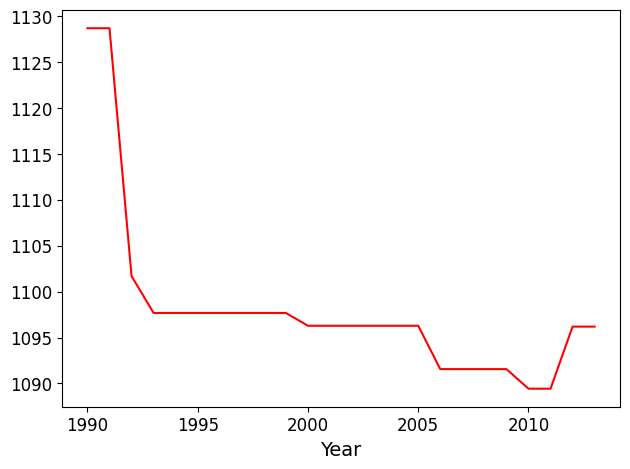

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
df2=df[df['Crop']=='Maize']
df2.groupby('Year')['average_rain_fall_mm_per_year'].mean().plot(color='red')
plt.xlabel('Year',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('maize_rainfall.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('maize_rainfall.png')

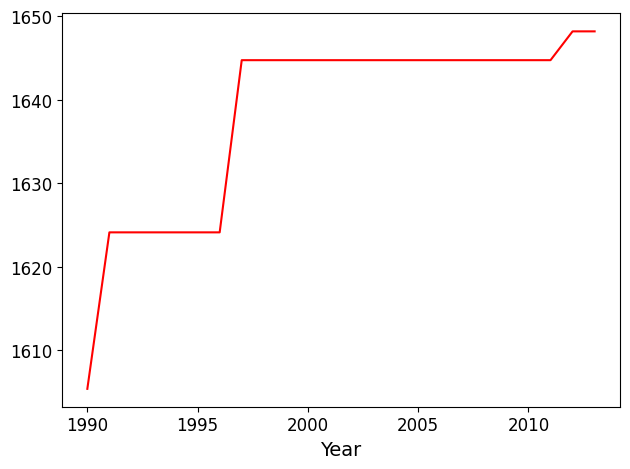

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
df2=df[df['Crop']=='Yams']
df2.groupby('Year')['average_rain_fall_mm_per_year'].mean().plot(color='red')
plt.xlabel('Year',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('yam_rainfall.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('yam_rainfall.png')

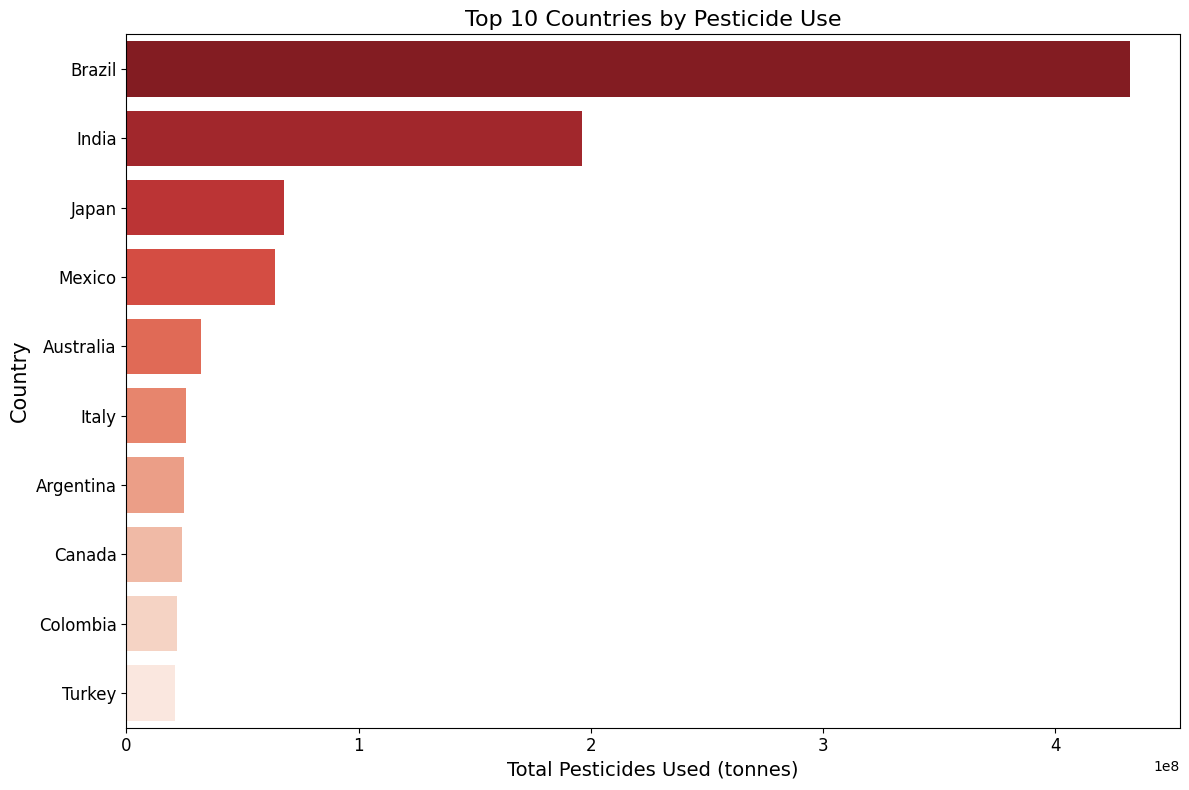

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
# Set style
plt.figure(figsize=(12, 8))
# 1. Country using the most pesticide
pesticide_by_country = df.groupby('Area')['pesticides_tonnes'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=pesticide_by_country.values, y=pesticide_by_country.index, palette="Reds_r")
plt.title('Top 10 Countries by Pesticide Use',fontsize=16)
plt.xlabel('Total Pesticides Used (tonnes)',fontsize=14)
plt.ylabel('Country',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Top10_pesticide.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Top10_pesticide.png')

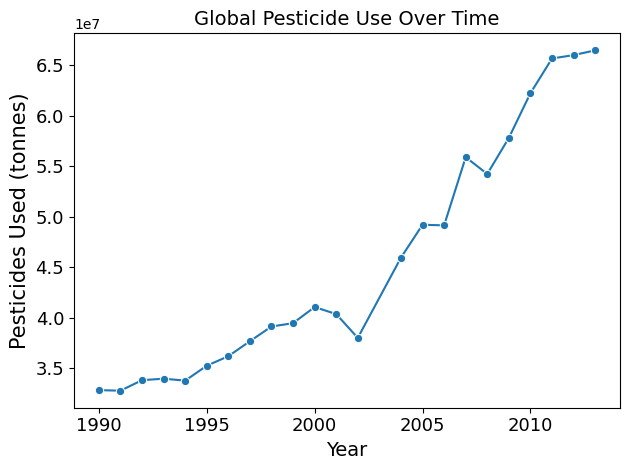

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
# 2. Line graph showing global pesticide usage over time
pesticide_by_year = df.groupby('Year')['pesticides_tonnes'].sum()
sns.lineplot(x=pesticide_by_year.index, y=pesticide_by_year.values, marker='o')
plt.title('Global Pesticide Use Over Time',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Pesticides Used (tonnes)',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Global_pesticide.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Global_pesticide.png')

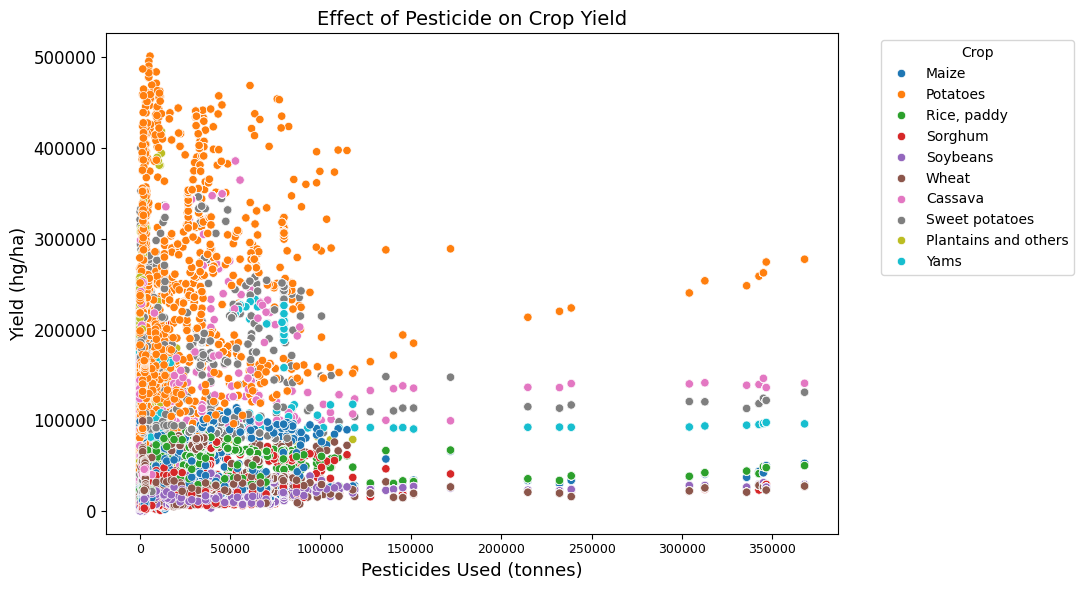

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(11,6))
# 3. Effect of pesticide on crop yield
sns.scatterplot(data=df, x='pesticides_tonnes', y='hg/ha_yield', hue='Crop')
plt.title('Effect of Pesticide on Crop Yield',fontsize=14)
plt.xlabel('Pesticides Used (tonnes)',fontsize=13)
plt.ylabel('Yield (hg/ha)',fontsize=13)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1))
plt.xticks(fontsize=9)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Effect_pesticide.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Effect_pesticide.png')

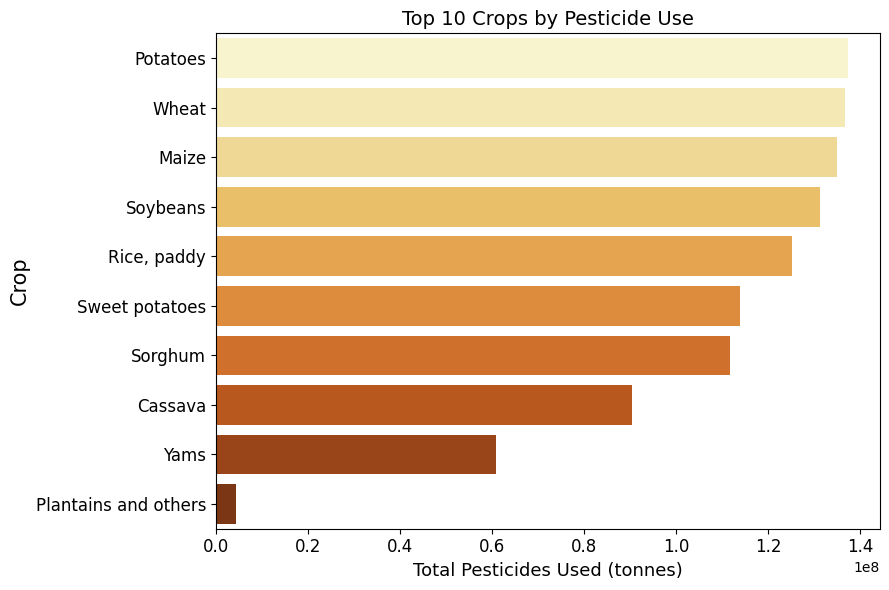

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(9,6))
# 4. Crops with most pesticide used
pesticide_by_crop = df.groupby('Crop')['pesticides_tonnes'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=pesticide_by_crop.values, y=pesticide_by_crop.index, palette="YlOrBr")
plt.title('Top 10 Crops by Pesticide Use',fontsize=14)
plt.xlabel('Total Pesticides Used (tonnes)',fontsize=13)
plt.ylabel('Crop',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Crop10_pesticide.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Crop10_pesticide.png')

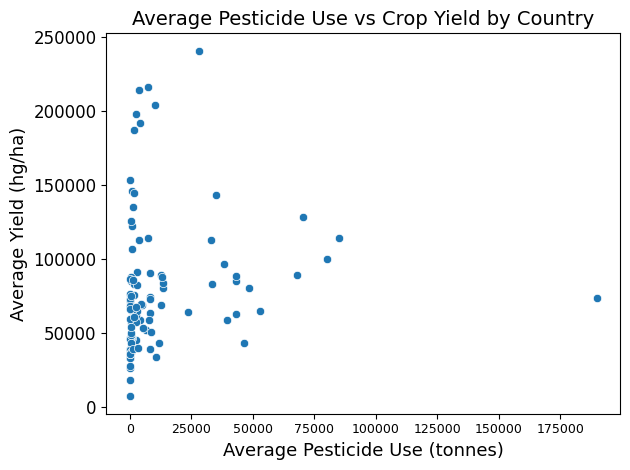

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
# 5. Scatterplot showing pesticide vs yield by country
avg_data_country = df.groupby('Area')[['pesticides_tonnes', 'hg/ha_yield']].mean().dropna()
sns.scatterplot(data=avg_data_country, x='pesticides_tonnes', y='hg/ha_yield')
plt.title('Average Pesticide Use vs Crop Yield by Country',fontsize=14)
plt.xlabel('Average Pesticide Use (tonnes)',fontsize=13)
plt.ylabel('Average Yield (hg/ha)',fontsize=13)
plt.xticks(fontsize=9)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Average_pesticide.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Average_pesticide.png')

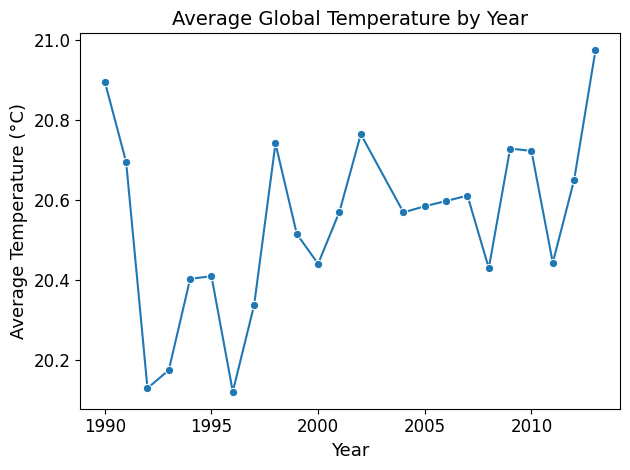

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
# 6. Average temperature by year
avg_temp_year = df.groupby('Year')['avg_temp'].mean()
sns.lineplot(x=avg_temp_year.index, y=avg_temp_year.values, marker='o')
plt.title('Average Global Temperature by Year',fontsize=14)
plt.xlabel('Year',fontsize=13)
plt.ylabel('Average Temperature (°C)',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Average_global.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Average_global.png')

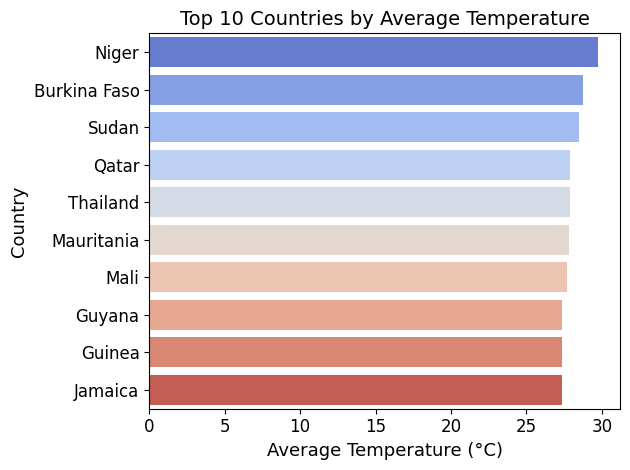

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
# plt.figure(figsize=(11,7))
# 7. Average temperature by country (Top 10 warmest)
avg_temp_country = df.groupby('Area')['avg_temp'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_temp_country.values, y=avg_temp_country.index, palette="coolwarm")
plt.title('Top 10 Countries by Average Temperature',fontsize=14)
plt.xlabel('Average Temperature (°C)',fontsize=13)
plt.ylabel('Country',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Top10_temp.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Top10_temp.png')

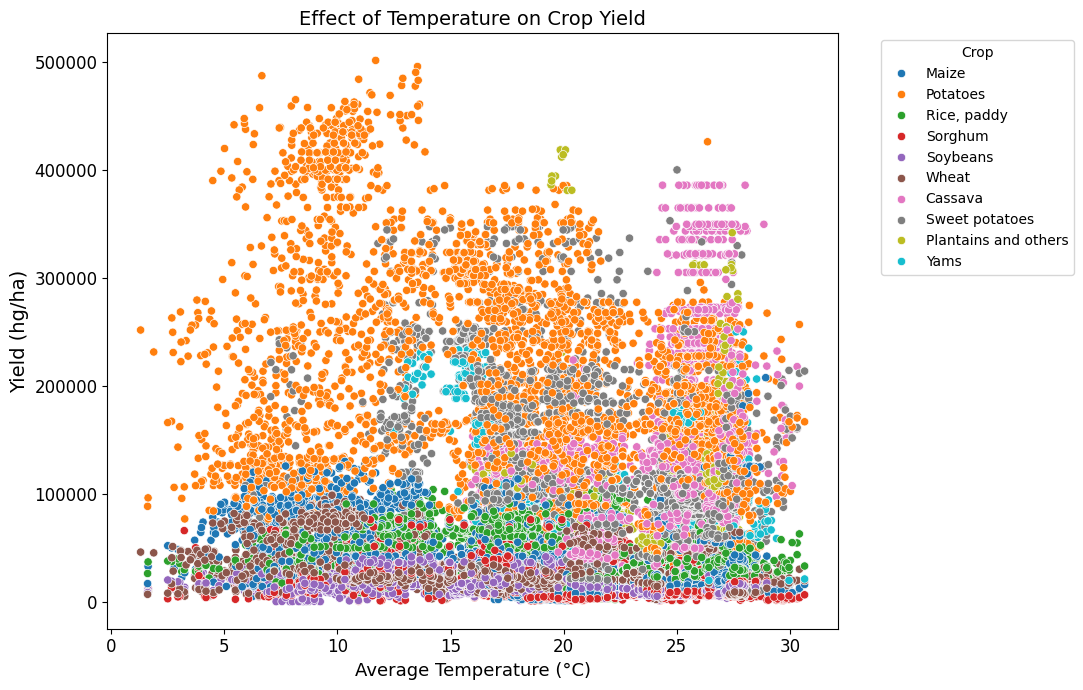

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(11,7))
# 8. Effect of temperature on crop yield
sns.scatterplot(data=df, x='avg_temp', y='hg/ha_yield', hue='Crop')
plt.title('Effect of Temperature on Crop Yield',fontsize=14)
plt.xlabel('Average Temperature (°C)',fontsize=13)
plt.ylabel('Yield (hg/ha)',fontsize=14)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Effect_temp.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Effect_temp.png')

In [82]:
# 9. Country with highest average temperature
hottest_country = avg_temp_country.idxmax()
max_temp = avg_temp_country.max()
print(f"The country with the highest average temperature is {hottest_country} with {max_temp:.2f}°C.")

The country with the highest average temperature is Niger with 29.72°C.


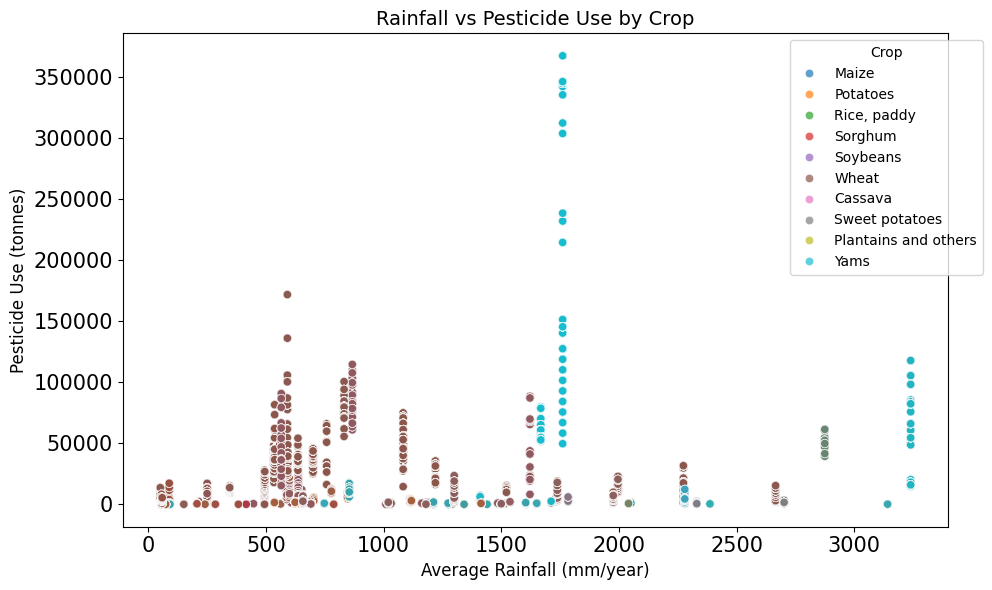

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
# # Set seaborn style
# sns.set(style='whitegrid', palette='Set2')
# 1. Scatterplot: Relationship between Rainfall and Pesticide Use
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='pesticides_tonnes', hue='Crop', alpha=0.7)
plt.title('Rainfall vs Pesticide Use by Crop',fontsize=14)
plt.xlabel('Average Rainfall (mm/year)',fontsize=12)
plt.ylabel('Pesticide Use (tonnes)',fontsize=12)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1))
# plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Rainfall_vs_pesticide.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Rainfall_vs_pesticide.png')

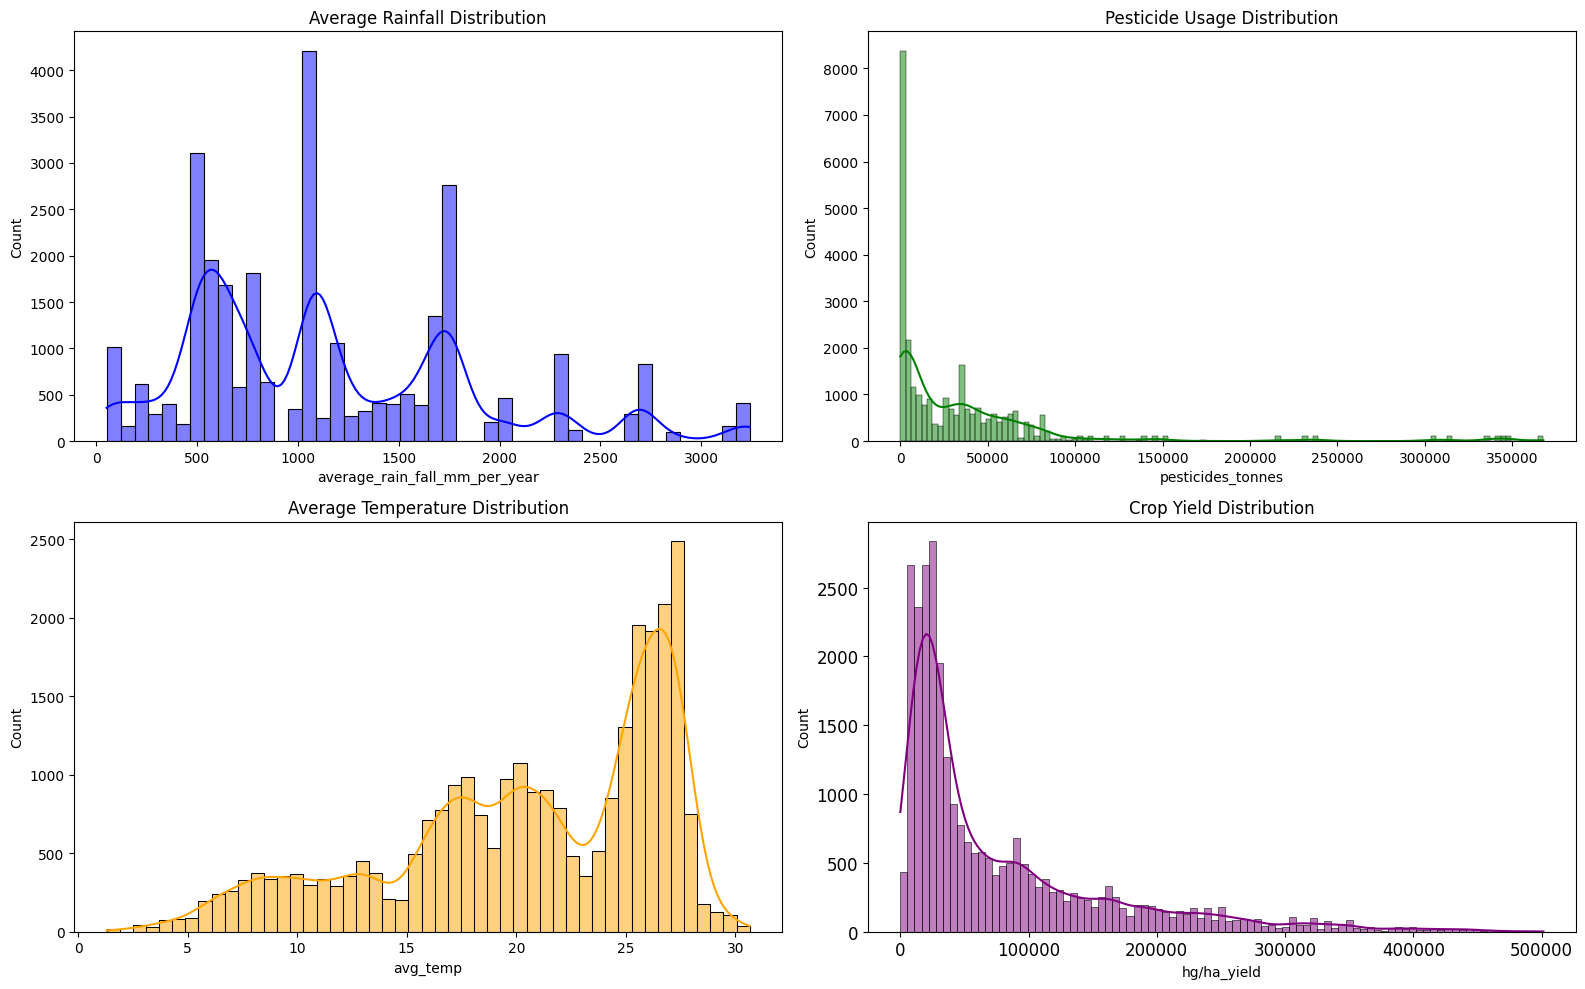

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
# 2. KDE + Barplot for Rainfall, Pesticides, Temperature, and Yield
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.histplot(df['average_rain_fall_mm_per_year'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Average Rainfall Distribution',fontsize=12)
sns.histplot(df['pesticides_tonnes'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Pesticide Usage Distribution',fontsize=12)
sns.histplot(df['avg_temp'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Average Temperature Distribution',fontsize=12)
sns.histplot(df['hg/ha_yield'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Crop Yield Distribution',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Distribution.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Distribution.png')

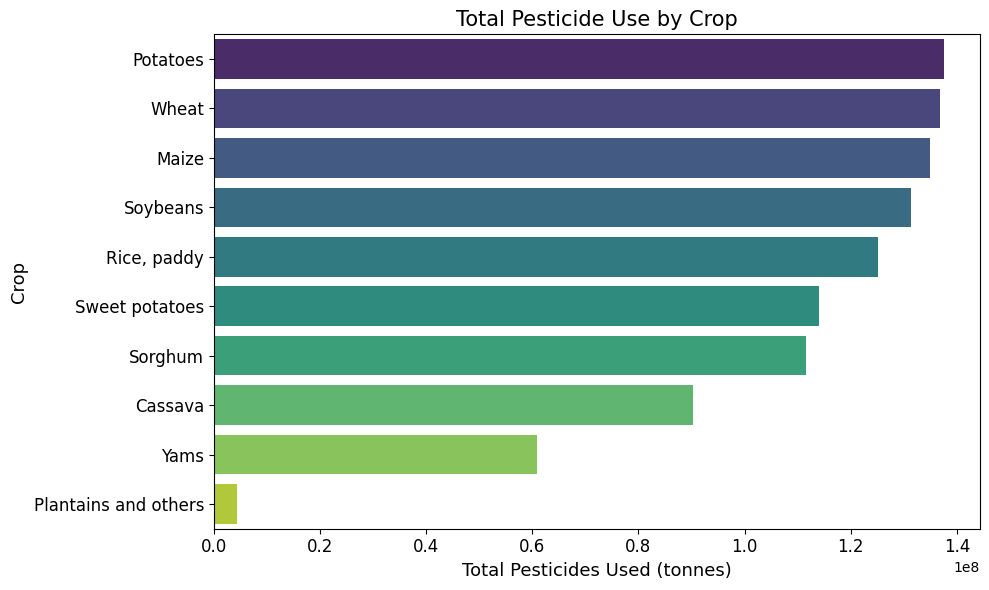

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
# 3. Bar Chart: Crops by Total Pesticide Used (Descending)
crop_pesticide = df.groupby('Crop')['pesticides_tonnes'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_pesticide.values, y=crop_pesticide.index, palette='viridis')
plt.title('Total Pesticide Use by Crop',fontsize=15)
plt.xlabel('Total Pesticides Used (tonnes)',fontsize=13)
plt.ylabel('Crop',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Total_pesticide.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Total_pesticide.png')

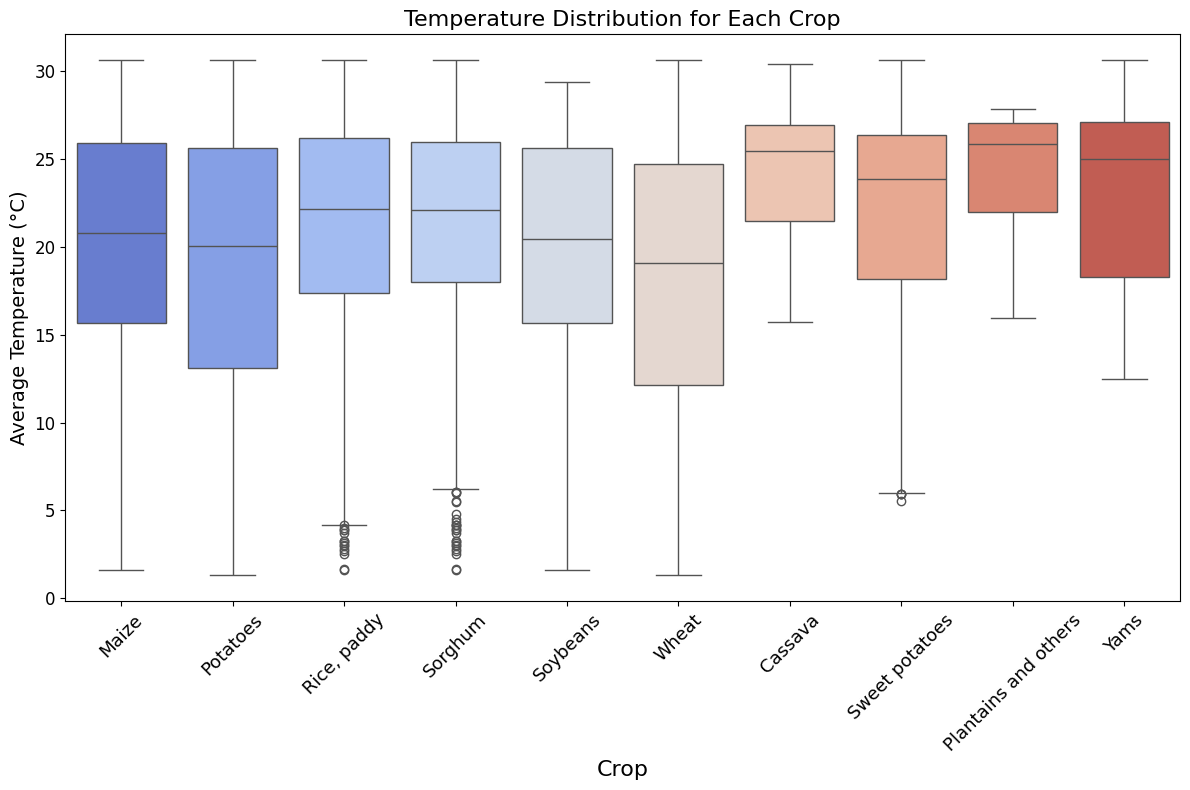

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
# 4. Boxplot: Temperature Needed by Various Crops
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Crop', y='avg_temp', palette='coolwarm')
plt.title('Temperature Distribution for Each Crop',fontsize=16)
plt.xlabel('Crop',fontsize=16)
plt.ylabel('Average Temperature (°C)',fontsize=14)
plt.xticks(rotation=45)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Temp_distribution.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Temp_distribution.png')

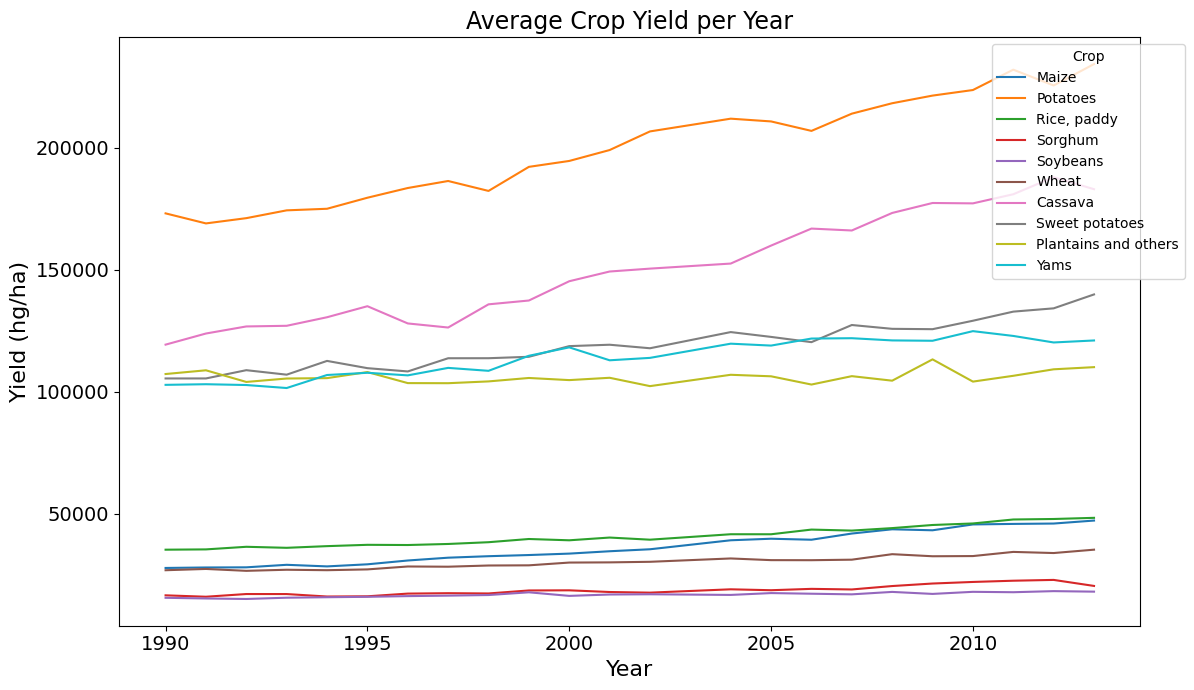

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
# 5. Line Plot: Average Yield per Year for Each Crop
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='Year', y='hg/ha_yield', hue='Crop', estimator='mean', errorbar=None)
plt.title('Average Crop Yield per Year',fontsize=17)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Yield (hg/ha)',fontsize=16)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Avg_crop_yield.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Avg_crop_yield.png')

In [88]:
# # Encode categorical variables temporarily for correlation analysis
# df_encoded = df.copy()
# from sklearn.preprocessing import LabelEncoder
# encoder= LabelEncoder()
# categorical_column=['Area','Crop']
# def encoding(df,column):
#     df_encoded[column]=encoder.fit_transform(df_encoded[column])
#     return df
# for column in categorical_column:
#     df_encoded=encoding(df_encoded,column)
# df_encoded.head()

In [89]:
# # Calculate correlation matrix
# correlation = df_encoded.corr()
# #plot the correlation matrix
# plt.figure(figsize=(8,8))
# #plot a heatmap
# sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Heatmap Of Correlation Matrix\n', fontsize=15)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()

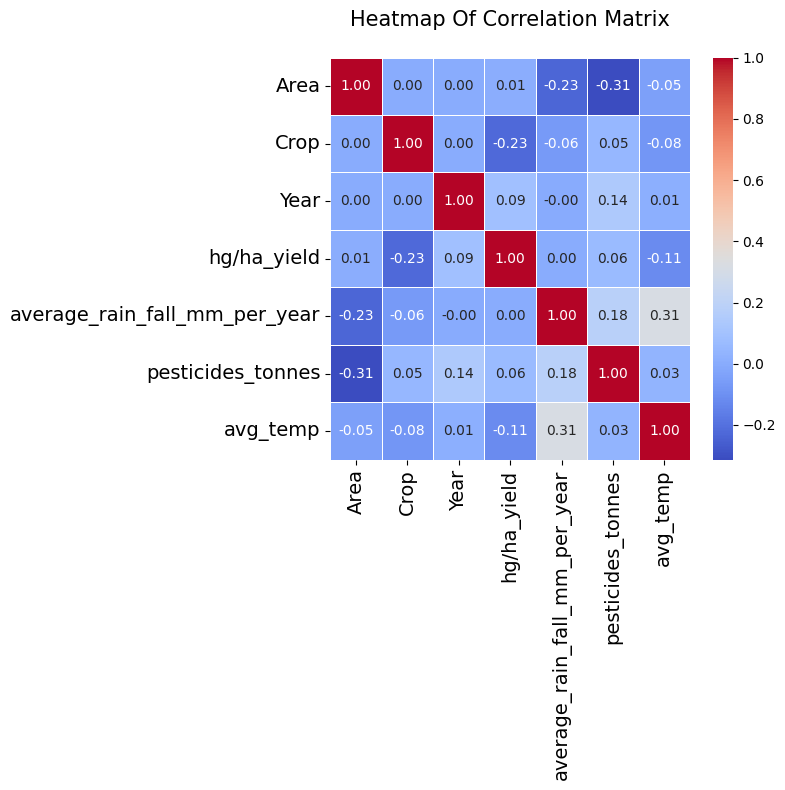

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
# Set random seed for reproducibility
np.random.seed(42)
# 1. Data Preparation
# Create a copy of the original dataframe
df_encoded = df.copy()
# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['Area', 'Crop']
for column in categorical_columns:
    df_encoded[column] = encoder.fit_transform(df_encoded[column])
# Calculate correlation matrix
correlation = df_encoded.corr()
#plot the correlation matrix
plt.figure(figsize=(8,8))
#plot a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Of Correlation Matrix\n', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Heatmap.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Heatmap.png')

In [91]:
# Split X and y
X = df_encoded.drop('hg/ha_yield', axis=1)
Y= df_encoded['hg/ha_yield']

In [92]:
# 2. Time-based Split
print("\nPerforming Time-based Split (train <= 2005, test > 2005)...")
# Create masks based on Year
train_mask = X['Year'] <= 2005
test_mask = X['Year'] > 2005
# Split data
X_train_time = X[train_mask]
y_train_time = Y[train_mask]
X_test_time = X[test_mask]
y_test_time = Y[test_mask]
# Verify split
print(f"Train set size: {len(X_train_time)}, years: {X_train_time['Year'].min()}-{X_train_time['Year'].max()}")
print(f"Test set size: {len(X_test_time)}, years: {X_test_time['Year'].min()}-{X_test_time['Year'].max()}")


Performing Time-based Split (train <= 2005, test > 2005)...
Train set size: 18262, years: 1990-2005
Test set size: 9980, years: 2006-2013


In [93]:
# 3. Create Different Splits
splits = {}
# 3.1 Seen Split (temporal, all countries/crops shared)
splits['seen'] = {
    'X_train': X_train_time.copy(),
    'y_train': y_train_time.copy(),
    'X_test': X_test_time.copy(),
    'y_test': y_test_time.copy()}

# 3.2 Unseen Countries
unique_countries = sorted(X['Area'].unique())
num_train_countries = int(len(unique_countries) * 0.8)
train_countries = unique_countries[:num_train_countries]
test_countries = unique_countries[num_train_countries:]
splits['unseen_countries'] = {
    'X_train': X_train_time[X_train_time['Area'].isin(train_countries)].copy(),
    'y_train': y_train_time[X_train_time['Area'].isin(train_countries)].copy(),
    'X_test': X_test_time[X_test_time['Area'].isin(test_countries)].copy(),
    'y_test': y_test_time[X_test_time['Area'].isin(test_countries)].copy()}

# 3.3 Unseen Crops
unique_crops = sorted(X['Crop'].unique())
num_train_crops = int(len(unique_crops) * 0.7)
train_crops = unique_crops[:num_train_crops]
test_crops = unique_crops[num_train_crops:]
splits['unseen_crops'] = {
    'X_train': X_train_time[X_train_time['Crop'].isin(train_crops)].copy(),
    'y_train': y_train_time[X_train_time['Crop'].isin(train_crops)].copy(),
    'X_test': X_test_time[X_test_time['Crop'].isin(test_crops)].copy(),
    'y_test': y_test_time[X_test_time['Crop'].isin(test_crops)].copy()}

# 3.4 Unseen Both (countries and crops)
splits['unseen_both'] = {
    'X_train': X_train_time[X_train_time['Area'].isin(train_countries) &
                           X_train_time['Crop'].isin(train_crops)].copy(),
    'y_train': y_train_time[X_train_time['Area'].isin(train_countries) &
                           X_train_time['Crop'].isin(train_crops)].copy(),
    'X_test': X_test_time[X_test_time['Area'].isin(test_countries) &
                         X_test_time['Crop'].isin(test_crops)].copy(),
    'y_test': y_test_time[X_test_time['Area'].isin(test_countries) &
                         X_test_time['Crop'].isin(test_crops)].copy()}

In [94]:
# 4. Scale Numerical Features and Create Sample Weights
numerical_columns = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Year']
scaler = MinMaxScaler()

for split_name, data in splits.items():
    print(f"\nProcessing {split_name} split...")

    # Scale numerical features
    X_train_scaled = data['X_train'].copy()
    X_train_scaled[numerical_columns] = scaler.fit_transform(X_train_scaled[numerical_columns])

    X_test_scaled = data['X_test'].copy()
    X_test_scaled[numerical_columns] = scaler.transform(X_test_scaled[numerical_columns])

    # Create sample weights
    X_train_temp = X_train_scaled.copy()
    X_train_temp['Country_Crop'] = X_train_temp['Area'].astype(str) + '_' + X_train_temp['Crop'].astype(str)
    group_freq = X_train_temp['Country_Crop'].value_counts()
    X_train_temp['SampleWeight'] = 1 / X_train_temp['Country_Crop'].map(group_freq)

    # Store processed data
    splits[split_name]['X_train'] = X_train_temp.drop(['Country_Crop', 'SampleWeight'], axis=1)
    splits[split_name]['X_test'] = X_test_scaled
    splits[split_name]['y_train'] = data['y_train']
    splits[split_name]['y_test'] = data['y_test']
    splits[split_name]['sample_weights'] = X_train_temp['SampleWeight'].values

    # Report sizes
    print(f"Train size: {len(splits[split_name]['X_train'])}")
    print(f"Test size: {len(splits[split_name]['X_test'])}")


Processing seen split...
Train size: 18262
Test size: 9980

Processing unseen_countries split...
Train size: 15510
Test size: 1548

Processing unseen_crops split...
Train size: 13339
Test size: 2671

Processing unseen_both split...
Train size: 11286
Test size: 388


In [95]:
# 5. Prepare for Modeling (Using your original variable names)
# For unseen countries split (maintaining your variable names)
X_train_final = splits['unseen_countries']['X_train']
y_train_final = splits['unseen_countries']['y_train']
X_test_unseen = splits['unseen_countries']['X_test']
y_test_unseen = splits['unseen_countries']['y_test']
sample_weights1 = splits['unseen_countries']['sample_weights']

X_train= X_train_final.copy()
y_train= y_train_final.copy()
X_test= X_test_unseen.copy()
y_test= y_test_unseen.copy()


# Verify the split you'll be using for modeling
print("\nFinal split for modeling (unseen countries):")
print(f"Train shape: {X_train_final.shape}")
print(f"Test shape: {X_test_unseen.shape}")
print(f"Sample weights shape: {sample_weights1.shape}")


Final split for modeling (unseen countries):
Train shape: (15510, 6)
Test shape: (1548, 6)
Sample weights shape: (15510,)


In [96]:
import random
def evaluate_model_with_gridsearch(model, X_train, X_test, y_train, y_test, param_grid, model_name='model'):
    """
    Evaluate a model using grid search and return metrics and best parameters.

    Args:
        model: The scikit-learn model to evaluate
        X_train, X_test, y_train, y_test: Train/test split data
        param_grid: Dictionary of parameters for GridSearchCV
        model_name: Name of the model for display purposes

    Returns:
        metrics_dict: Dictionary containing all evaluation metrics
        best_params: Dictionary of best parameters found by grid search
    """
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.model_selection import GridSearchCV
    # Initialize grid search
    gs = GridSearchCV(model, param_grid, scoring='r2', cv=10, error_score='raise', n_jobs=-1)
    gs.fit(X_train, y_train)

    # Get best model
    best_model = gs.best_estimator_
    best_params = gs.best_params_

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculate metrics for training set
    train_metrics = {
        'MAE_train': round(mean_absolute_error(y_train, y_train_pred), 2),
        'MAPE_train': round(mean_absolute_percentage_error(y_train, y_train_pred) * 100, 2),
        'R2_train': round(r2_score(y_train, y_train_pred), 4)}

    # Calculate metrics for test set
    test_metrics = {'MAE_test': round(mean_absolute_error(y_test, y_test_pred), 2),
                    'MAPE_test': round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2),
                    'R2_test': round(r2_score(y_test, y_test_pred), 4)}

    # Combine all metrics
    metrics_dict = {
        'model': model_name,
        'best_params': str(best_params),
        **train_metrics,
        **test_metrics}

    # Print results
    print(f"\n BEST PARAMETERS FOR {model_name.upper()}:")
    for param, value in best_params.items():
        print(f"  {param}: {value}")

    print("\n TRAINING PERFORMANCE:")
    print(f"  MAE:  {train_metrics['MAE_train']:.2f}")
    print(f"  MAPE: {train_metrics['MAPE_train']:.2%}")
    print(f"  R²:   {train_metrics['R2_train']:.3f}")

    print("\n TEST PERFORMANCE:")
    print(f"  MAE:  {test_metrics['MAE_test']:.2f}")
    print(f"  MAPE: {test_metrics['MAPE_test']:.2%}")
    print(f"  R²:   {test_metrics['R2_test']:.3f}")

    return metrics_dict, best_params, best_model

In [97]:
def plot_model_performance(y_true, y_pred, model_name='Model'):
    """
    Create three plots for model performance evaluation:
    1. Actual vs Predicted values
    2. Residuals distribution
    3. Prediction error distribution (KDE)

    Args:
        y_true: Actual target values
        y_pred: Predicted target values
        model_name: Name of the model for plot titles
    """
    # plt.figure(figsize=(9, 9))

    # Calculate residuals
    residuals = y_true - y_pred
    # 1. Actual vs Predicted plot
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual Values',fontsize=13)
    plt.ylabel('Predicted Values',fontsize=13)
    plt.title(f'{model_name} - Actual vs Predicted Values',fontsize=14)
    # Tidy up layout
    plt.tight_layout()
    # Save with higher resolution
    plt.savefig('Actual vs Predicted Values.png',dpi=300, bbox_inches='tight')
    # Display the plot
    plt.show()
    # Download the file in Google Colab
    files.download('Actual vs Predicted Values.png')

    # 2. Residuals plot
    sns.histplot(residuals, bins=30, kde=True, color='orange')
    plt.xlabel('Residuals (Actual - Predicted)',fontsize=13)
    plt.title(f'{model_name} - Distribution of Residuals',fontsize=14)
    # Tidy up layout
    plt.tight_layout()
    # Save with higher resolution
    plt.savefig('Residuals.png',dpi=300, bbox_inches='tight')
    # Display the plot
    plt.show()
    # Download the file in Google Colab
    files.download('Residuals.png')

    # 3. Prediction error distribution (KDE)
    sns.kdeplot(y_pred, label='Predicted', fill=True)
    sns.kdeplot(y_true, label='Actual', fill=True)
    plt.title(f'{model_name} - Prediction vs Actual Distribution',fontsize=14)
    plt.xlabel('Yield',fontsize=13)
    plt.legend()
    # Tidy up layout
    plt.tight_layout()
    # Save with higher resolution
    plt.savefig('Prediction vs Actual Distribution.png',dpi=300, bbox_inches='tight')
    # Display the plot
    plt.show()
    # Download the file in Google Colab
    files.download('Prediction vs Actual Distribution.png')


 BEST PARAMETERS FOR LINEAR REGRESSION:
  fit_intercept: True

 TRAINING PERFORMANCE:
  MAE:  57621.08
  MAPE: 22215.00%
  R²:   0.071

 TEST PERFORMANCE:
  MAE:  74060.66
  MAPE: 29029.00%
  R²:   0.099


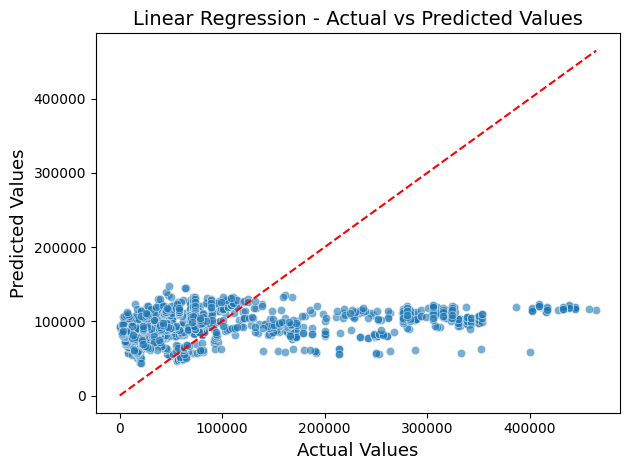

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

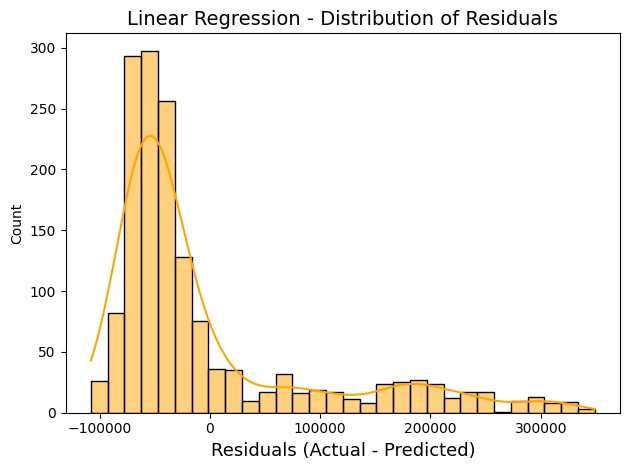

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

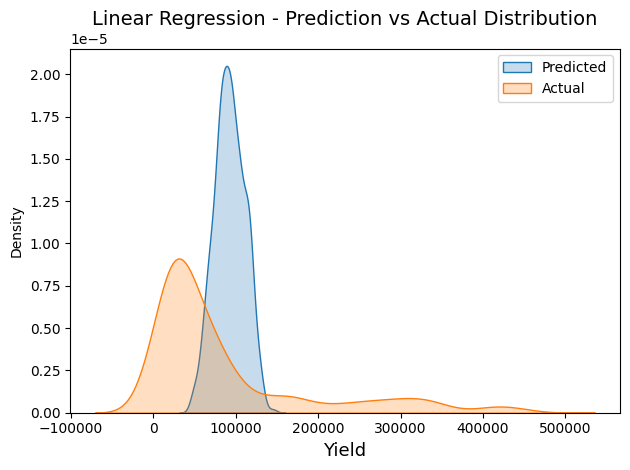

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define parameter grids
lin_reg_param_grid = {'fit_intercept': [True, False]}
# Initialize models
linear_regression= LinearRegression()
# Create a dictionary to store all metrics
all_metrics = {}
# Evaluate linear Regression
lin_metrics, lin_best_params, lin_model = evaluate_model_with_gridsearch(linear_regression, X_train_final, X_test_unseen,
                                        y_train_final, y_test_unseen, lin_reg_param_grid,'Linear Regression')

all_metrics['Linear Regression'] = lin_metrics
# Plot performance for a model
Y_test_pred = lin_model.predict(X_test_unseen)
plot_model_performance(y_test_unseen, Y_test_pred, 'Linear Regression')


 BEST PARAMETERS FOR DECISION TREE:
  max_depth: 5
  min_samples_leaf: 1
  min_samples_split: 2

 TRAINING PERFORMANCE:
  MAE:  20071.16
  MAPE: 4712.00%
  R²:   0.794

 TEST PERFORMANCE:
  MAE:  39450.47
  MAPE: 6805.00%
  R²:   0.616


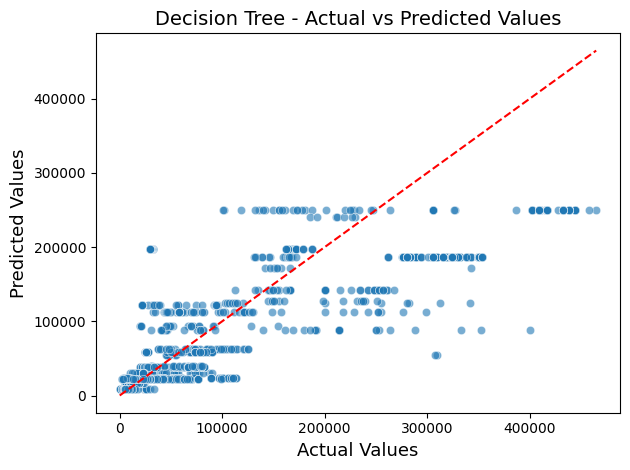

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

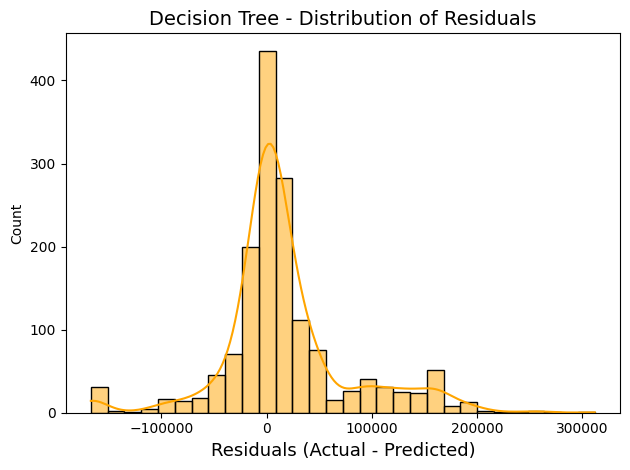

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

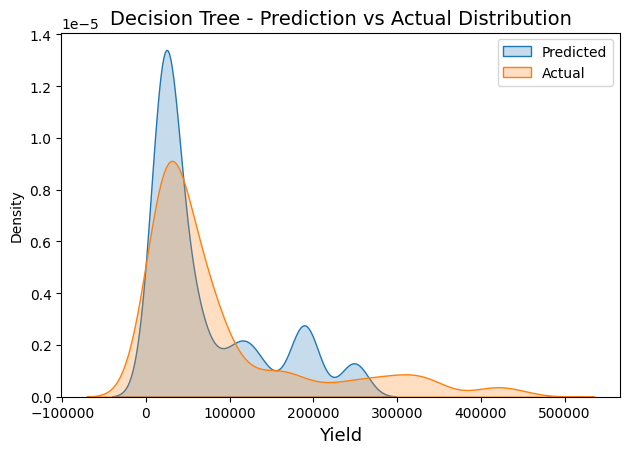

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
# Evaluate Decision Tree
decision_tree= DecisionTreeRegressor(random_state=42)
dt_param_grid= {'max_depth': [None, 5], 'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

dt_metrics, dt_best_params, dt_model = evaluate_model_with_gridsearch(decision_tree, X_train_final, X_test_unseen,
                                        y_train_final, y_test_unseen,dt_param_grid, 'Decision Tree')

all_metrics['Decision Tree'] = dt_metrics

# Plot performance for a model
Y_test_pred = dt_model.predict(X_test_unseen)
plot_model_performance(y_test_unseen, Y_test_pred, 'Decision Tree')


 BEST PARAMETERS FOR RANDOM FOREST:
  max_depth: 10
  min_samples_split: 2
  n_estimators: 50

 TRAINING PERFORMANCE:
  MAE:  4734.48
  MAPE: 1457.00%
  R²:   0.987

 TEST PERFORMANCE:
  MAE:  47455.78
  MAPE: 10740.00%
  R²:   0.482


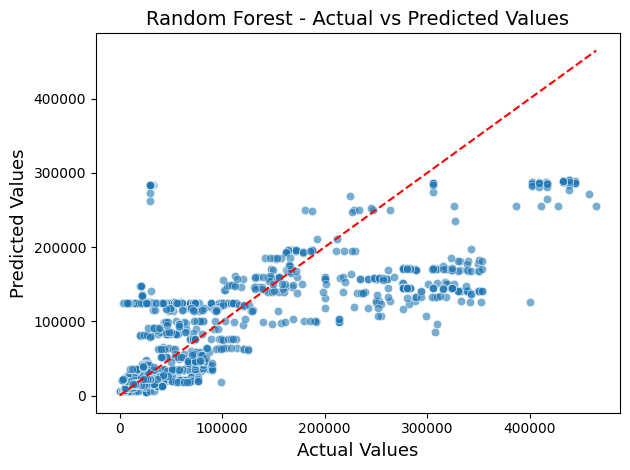

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

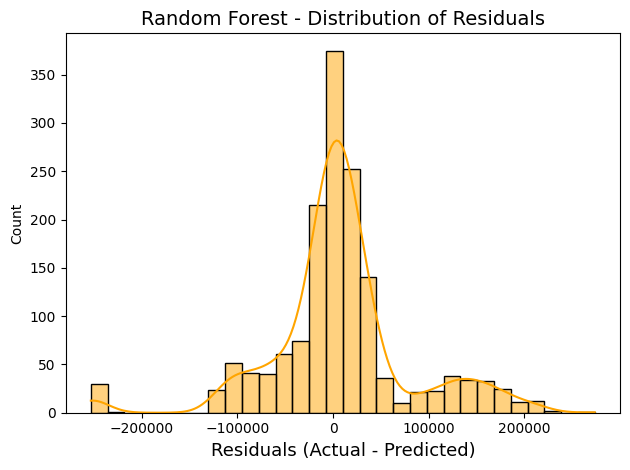

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

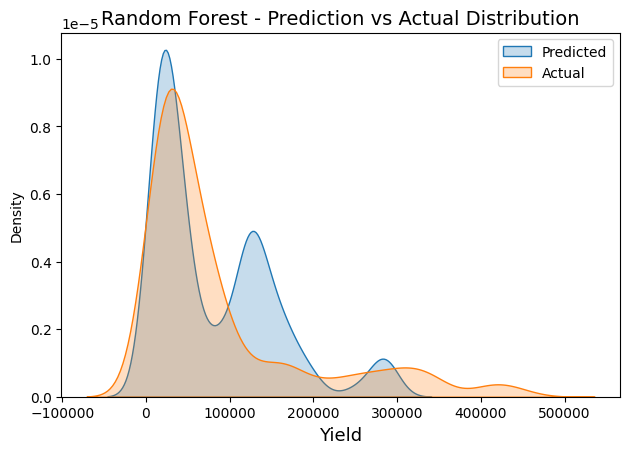

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
# Evaluate Random Forest
random_forest= RandomForestRegressor(random_state=42)
rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

rf_metrics, rf_best_params, rf_model = evaluate_model_with_gridsearch(random_forest, X_train_final, X_test_unseen,
                                        y_train_final, y_test_unseen,rf_param_grid,'Random Forest')

all_metrics['Random Forest'] = rf_metrics

# Plot performance for a model
Y_test_pred = rf_model.predict(X_test_unseen)
plot_model_performance(y_test_unseen, Y_test_pred, 'Random Forest')


 BEST PARAMETERS FOR XGBOOST:
  learning_rate: 0.5
  max_depth: 6
  n_estimators: 50

 TRAINING PERFORMANCE:
  MAE:  5016.21
  MAPE: 1525.00%
  R²:   0.988

 TEST PERFORMANCE:
  MAE:  40932.58
  MAPE: 9975.00%
  R²:   0.633


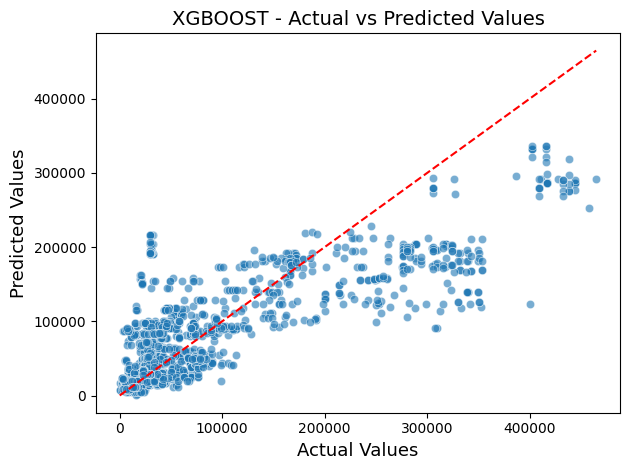

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

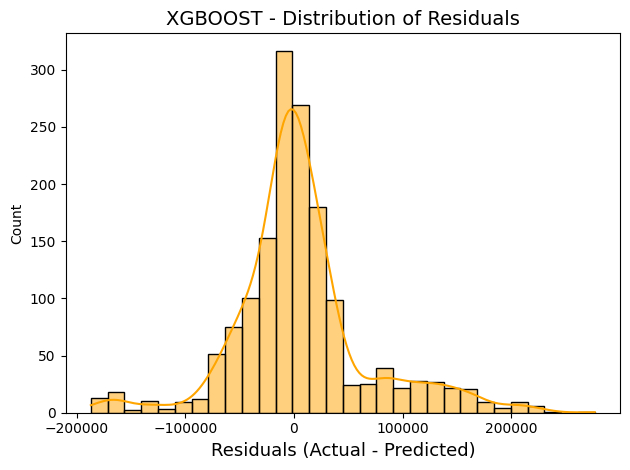

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

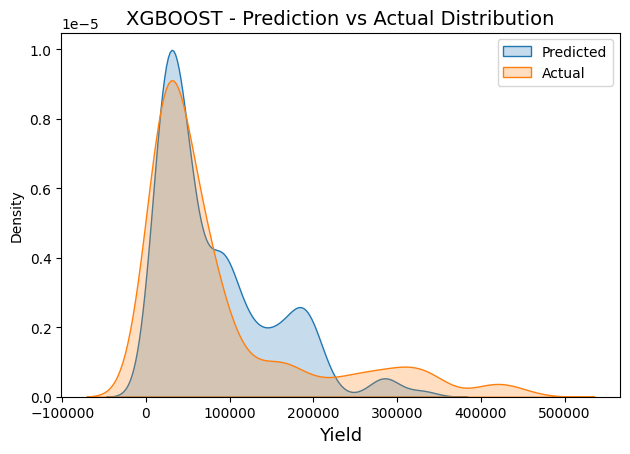

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
# Evaluate xgboost
xgboost= XGBRegressor(random_state=42)
xgboost_param_grid= {'n_estimators': [50, 100], 'max_depth': [3, 6, 9],
                     'learning_rate': [0.01, 0.5]}

xgb_metrics, xgb_best_params, xgb_model = evaluate_model_with_gridsearch(xgboost,  X_train_final, X_test_unseen,
                                        y_train_final, y_test_unseen,xgboost_param_grid,'XGBOOST')

all_metrics['XGBOOST'] = xgb_metrics

# Plot performance for a model
Y_test_pred = xgb_model.predict(X_test_unseen)
plot_model_performance(y_test_unseen, Y_test_pred, 'XGBOOST')

In [102]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define function to create DNN model
def create_model(learning_rate=0.01, hidden_layers=1, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(32, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

# Create KerasRegressor wrapper with all parameters
dnn_model = KerasRegressor(
    build_fn=create_model,
    learning_rate=0.01,
    hidden_layers=1,
    random_state= 42,
    dropout_rate=0.0,
    batch_size=32,
    epochs=100,
    verbose=0)


# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.001],
    'dropout_rate': [0.0, 0.1]}

# Perform Grid Search
grid = GridSearchCV(estimator=dnn_model, param_grid=param_grid,
                    scoring='neg_mean_absolute_error', cv=3, verbose=1)
grid_result = grid.fit(X_train, y_train)

# Get best parameters and model
best_dnn_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Generate predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics
dnn_metrics = {
    'model': 'DNN',
    'best_params': str(best_dnn_params),
    'MAE_train': round(mean_absolute_error(y_train, y_train_pred), 2),
    'MAPE_train': round(mean_absolute_percentage_error(y_train, y_train_pred) * 100, 2),
    'R2_train': round(r2_score(y_train, y_train_pred), 4),
    'MAE_test': round(mean_absolute_error(y_test, y_test_pred), 2),
    'MAPE_test': round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2),
    'R2_test': round(r2_score(y_test, y_test_pred), 4)}

# Add to metrics dictionary (if exists)
all_metrics['DNN'] = dnn_metrics

# Print results
print(f"\nBEST PARAMETERS FOR DNN:")
for param, value in best_dnn_params.items():
    print(f"  {param}: {value}")

print("\nTRAINING PERFORMANCE:")
print(f"  MAE:  {dnn_metrics['MAE_train']:.2f}")
print(f"  MAPE: {dnn_metrics['MAPE_train']:.2f}%")
print(f"  R²:   {dnn_metrics['R2_train']:.4f}")

print("\nTEST PERFORMANCE:")
print(f"  MAE:  {dnn_metrics['MAE_test']:.2f}")
print(f"  MAPE: {dnn_metrics['MAPE_test']:.2f}%")
print(f"  R²:   {dnn_metrics['R2_test']:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits

BEST PARAMETERS FOR DNN:
  dropout_rate: 0.0
  learning_rate: 0.01

TRAINING PERFORMANCE:
  MAE:  57491.25
  MAPE: 225.89%
  R²:   0.0415

TEST PERFORMANCE:
  MAE:  81155.08
  MAPE: 334.93%
  R²:   0.0387


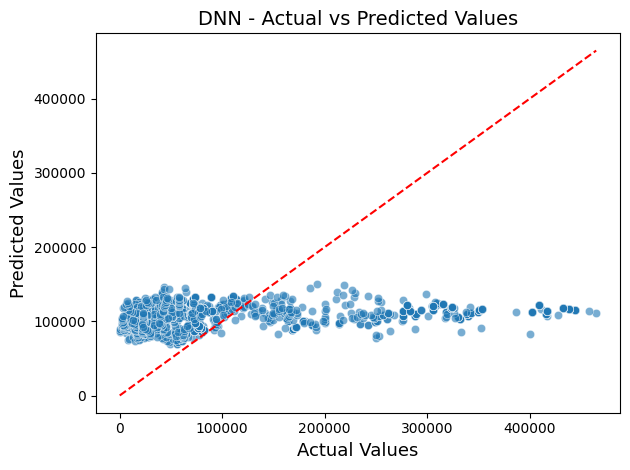

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

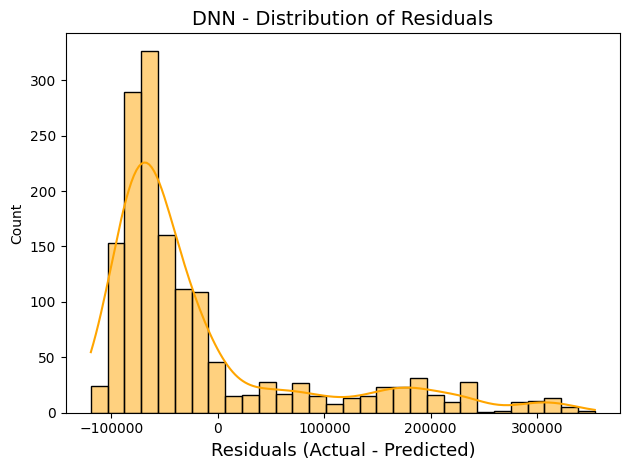

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

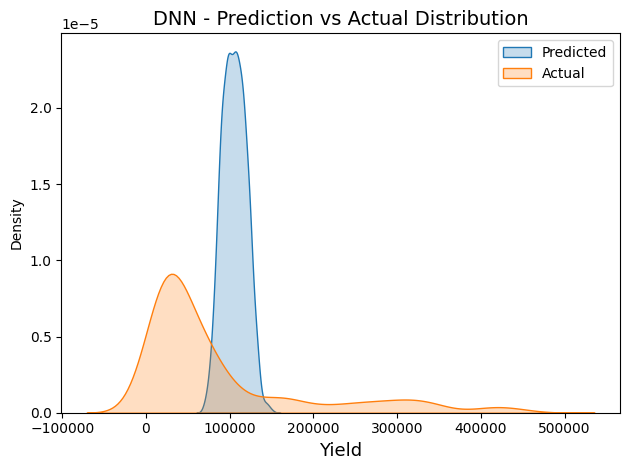

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
# Plot performance
plot_model_performance(y_test, y_test_pred, 'DNN')

In [104]:
# Convert to DataFrame
metrics_df = pd.DataFrame.from_dict(all_metrics, orient='index')
metrics_df

model  \
Linear Regression  Linear Regression   
Decision Tree          Decision Tree   
Random Forest          Random Forest   
XGBOOST                      XGBOOST   
DNN                              DNN   

                                                         best_params  \
Linear Regression                            {'fit_intercept': True}   
Decision Tree      {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...   
Random Forest      {'max_depth': 10, 'min_samples_split': 2, 'n_e...   
XGBOOST            {'learning_rate': 0.5, 'max_depth': 6, 'n_esti...   
DNN                     {'dropout_rate': 0.0, 'learning_rate': 0.01}   

                   MAE_train  MAPE_train  R2_train  MAE_test  MAPE_test  \
Linear Regression   57621.08      222.15    0.0709  74060.66     290.29   
Decision Tree       20071.16       47.12    0.7938  39450.47      68.05   
Random Forest        4734.48       14.57    0.9870  47455.78     107.40   
XGBOOST              5016.21       15.25    0.9883  40932.58      99.75   
DNN                 57491.25      225.89    0.0415  81155.08     334.93   

                   R2_test  
Linear Regression   0.0992  
Decision Tree       0.6162  
Random Forest       0.4819  
XGBOOST             0.6328  
DNN                 0.0387

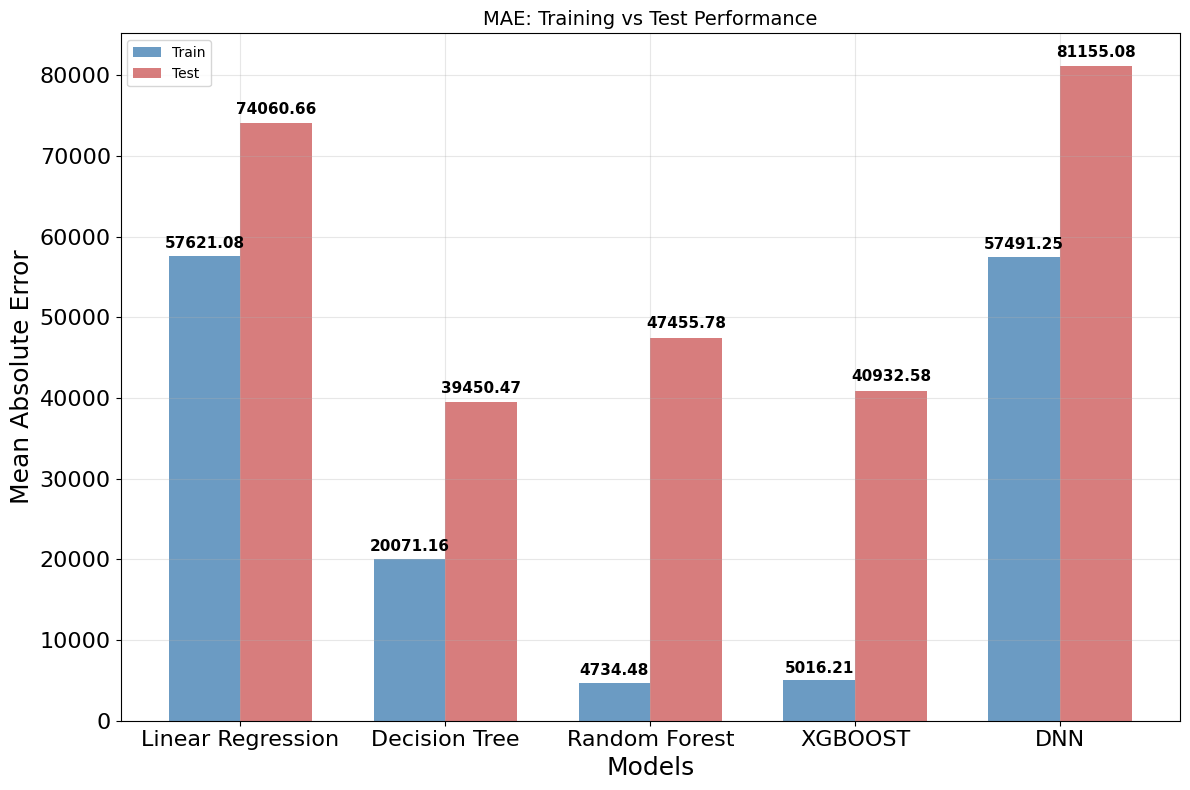

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming metrics_df is your DataFrame
models = metrics_df.index

# Set a consistent style
plt.style.use('default')


# Function to create individual metric charts
def create_metric_chart(models, metric_name, train_col, test_col, ylabel, title_suffix):
    plt.figure(figsize=(12, 8))

    # Set width of bars and positions
    bar_width = 0.35
    x_pos = np.arange(len(models))

    # Create bars
    plt.bar(x_pos - bar_width/2, metrics_df[train_col], bar_width,
            label='Train', alpha=0.8, color='steelblue')
    plt.bar(x_pos + bar_width/2, metrics_df[test_col], bar_width,
            label='Test', alpha=0.8, color='indianred')

    # Customize chart
    plt.xlabel('Models', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(f'{metric_name}: {title_suffix}', fontsize=14)
    plt.xticks(x_pos, models,fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add value labels on top of bars
    for i, v in enumerate(metrics_df[train_col]):
        plt.text(i - bar_width/2, v + max(metrics_df[train_col])*0.01,
                 f'{v:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    for i, v in enumerate(metrics_df[test_col]):
        plt.text(i + bar_width/2, v + max(metrics_df[test_col])*0.01,
                 f'{v:.2f}', ha='center', va='bottom', fontsize=11,fontweight='bold')

    # Adjust layout
    plt.tight_layout()

    # Save and show
    filename = f'model_comparison_{metric_name.lower()}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    return filename

# Create and save each chart separately
mae_file = create_metric_chart(models,'MAE', 'MAE_train', 'MAE_test', 'Mean Absolute Error', 'Training vs Test Performance')

# Download all files
files.download(mae_file)

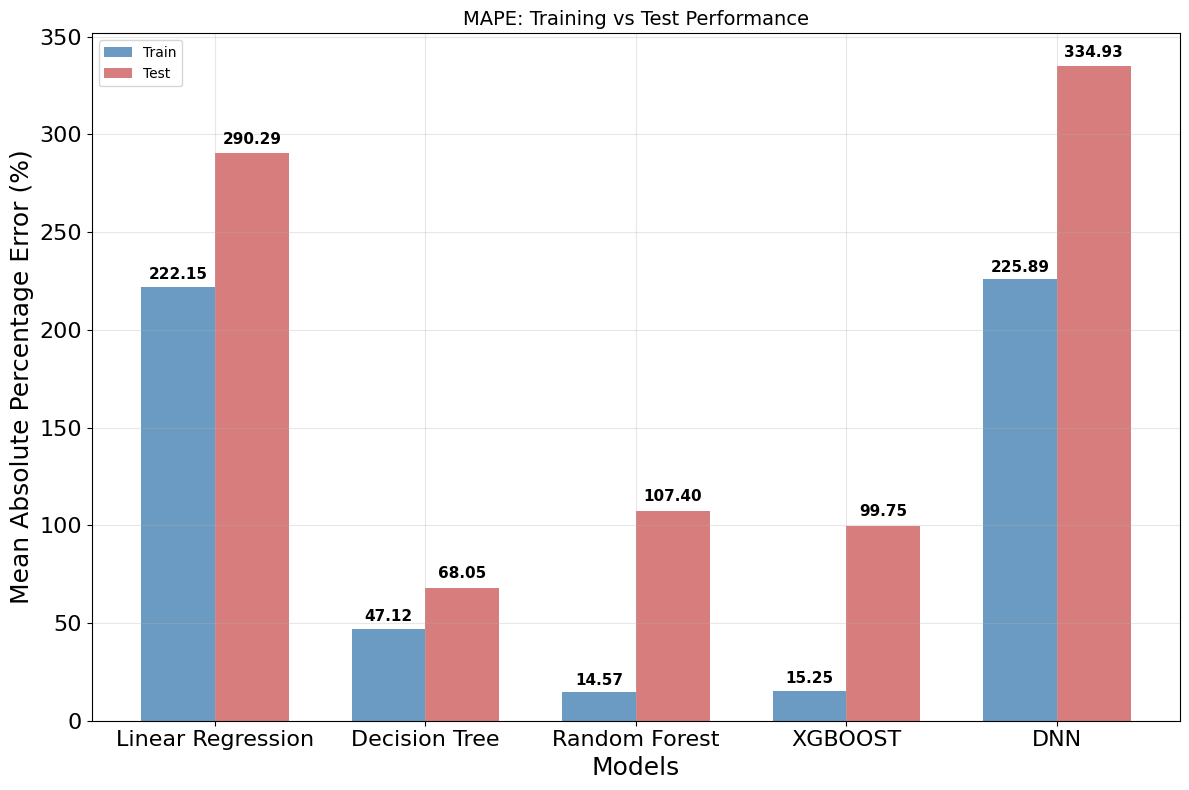

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
mape_file = create_metric_chart(models,'MAPE', 'MAPE_train', 'MAPE_test', 'Mean Absolute Percentage Error (%)', 'Training vs Test Performance')
files.download(mape_file)

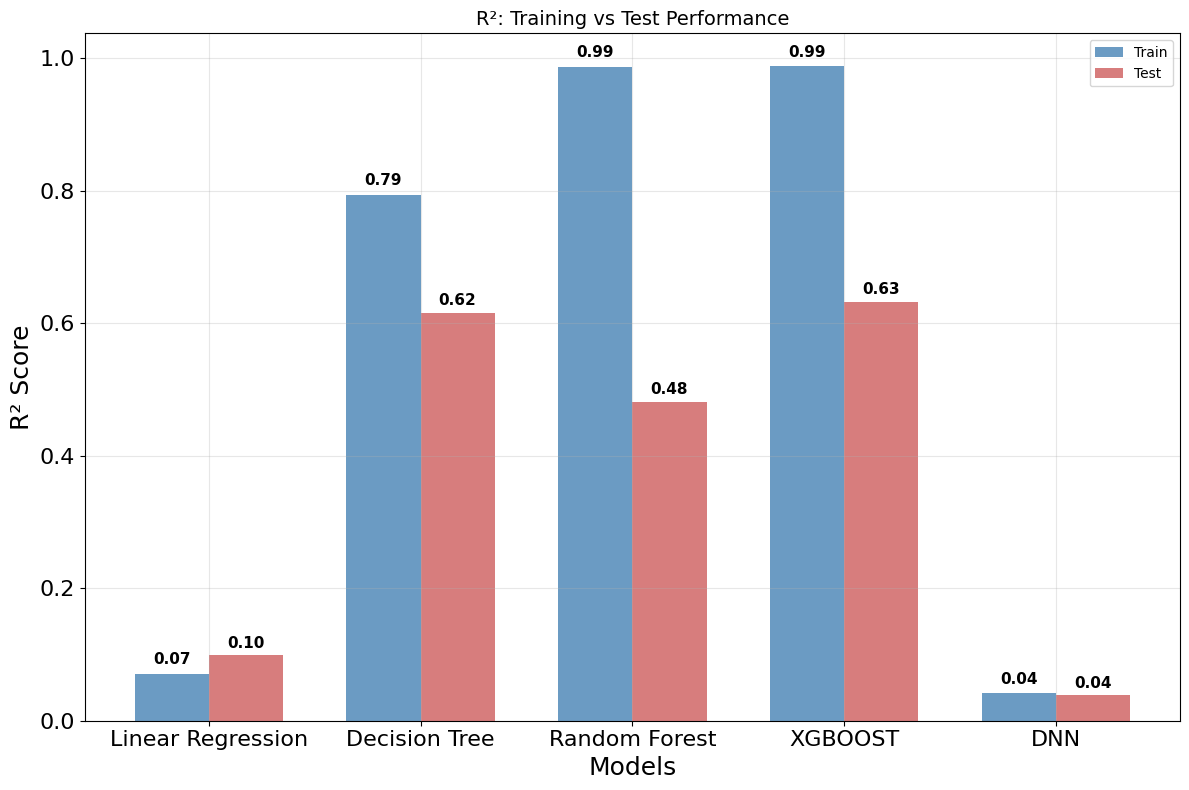

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
r2_file = create_metric_chart(models,'R²', 'R2_train', 'R2_test', 'R² Score', 'Training vs Test Performance')
files.download(r2_file)

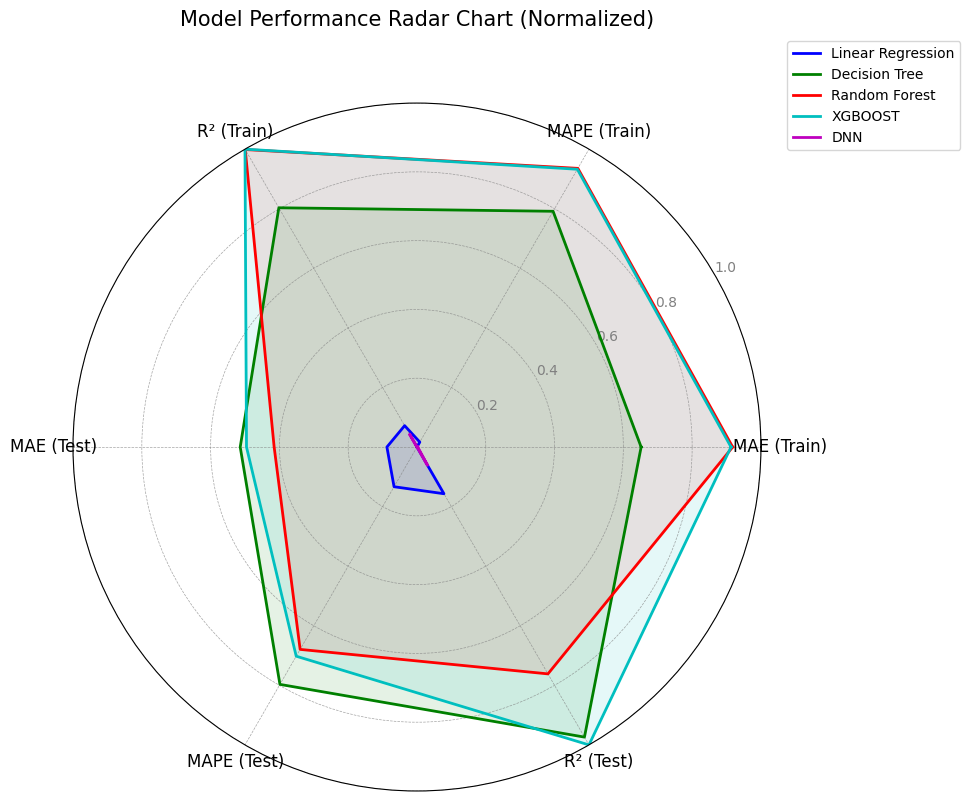

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
models = metrics_df.index
metrics = ['MAE', 'MAPE', 'R2']
# Radar chart for model comparison
fig = plt.figure(figsize=(10, 10))
categories = ['MAE_train', 'MAPE_train', 'R2_train', 'MAE_test', 'MAPE_test', 'R2_test']
N = len(categories)

# Normalize the data for radar chart (since metrics have different scales)
normalized_df = metrics_df.copy()
for col in ['MAE_train', 'MAE_test']:
    normalized_df[col] = 1 - (normalized_df[col] / normalized_df[col].max())
for col in ['MAPE_train', 'MAPE_test']:
    normalized_df[col] = 1 - (normalized_df[col] / normalized_df[col].max())
for col in ['R2_train', 'R2_test']:
    normalized_df[col] = normalized_df[col] / normalized_df[col].max()

# Calculate angles for radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the circle

# Create subplot
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.ylim(0, 1)

# Improve category labels with better formatting
category_labels = ['MAE (Train)', 'MAPE (Train)', 'R² (Train)',
                   'MAE (Test)', 'MAPE (Test)', 'R² (Test)']

plt.xticks(angles[:-1], category_labels, color='black', size=12, ha='center', va='center')
ax.set_rlabel_position(30)  # Move radial labels to a better position
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"],
           color="grey", size=10)
plt.ylim(0, 1)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot each model
colors = ['b', 'g', 'r', 'c', 'm']
for i, model in enumerate(models):
    values = normalized_df.loc[model, categories].values.flatten().tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

plt.title('Model Performance Radar Chart (Normalized)', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
# Save the radar chart
plt.savefig('model_radar_chart.jpg', dpi=300, bbox_inches='tight')
plt.show()

files.download('model_radar_chart.jpg')

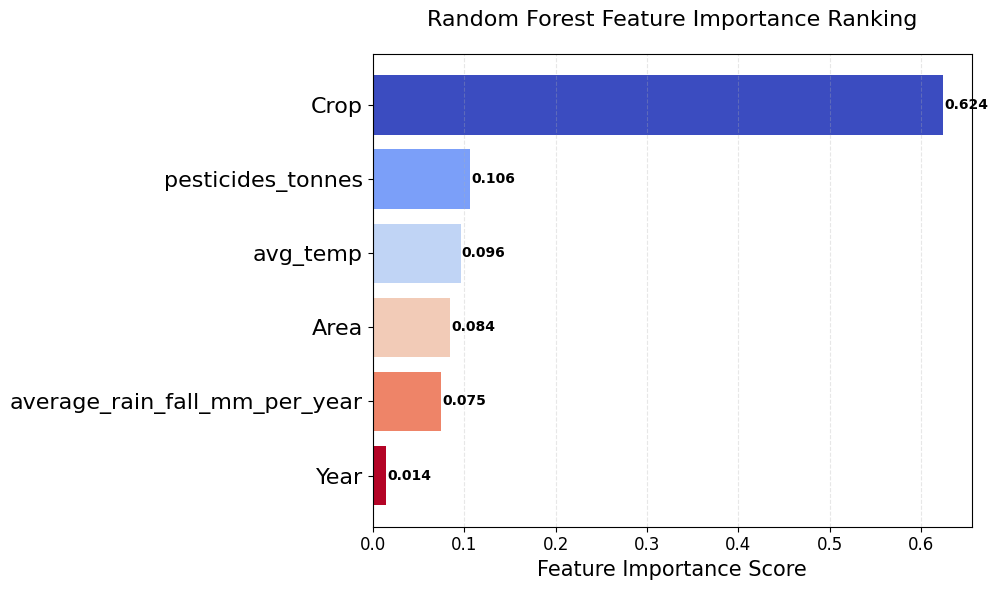

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
# Plot feature importance for Random Forest with enhanced formatting
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train model and get feature importances
model = RandomForestRegressor(**rf_best_params).fit(X_train_final, y_train_final)
importances = model.feature_importances_
feature_names = X_train_time.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = feature_names[indices]

# Create plot with better layout
plt.figure(figsize=(10,6))

# Create horizontal bar plot with color gradient
colors = plt.cm.coolwarm(np.linspace(0, 1, len(sorted_importances)))
bars = plt.barh(range(len(sorted_importances)), sorted_importances, color=colors)

# Customize appearance
plt.yticks(range(len(sorted_importances)), sorted_features, fontsize=16)
plt.xticks(fontsize=12)
plt.xlabel('Feature Importance Score', fontsize=15)
plt.title('Random Forest Feature Importance Ranking', fontsize=16, pad=20)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, v in enumerate(sorted_importances):
    if v > 0.01:  # Only label significant values
        plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=10,
                 fontweight='bold')

# Invert y-axis so highest importance is at top
plt.gca().invert_yaxis()

# Adjust layout
plt.tight_layout()

# Save with higher resolution
plt.savefig('Enhanced_Feature_Importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Download the file in Google Colab
files.download('Enhanced_Feature_Importance.png')

## **Sample Weights**

In [110]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name='model', sample_weights=None, is_dnn=False, dnn_params=None):
    """
    Evaluate a model and return metrics and best parameters.

    Args:
        model: The scikit-learn or Keras model to evaluate
        X_train, X_test, y_train, y_test: Train/test split data
        model_name: Name of the model for display purposes
        sample_weights: Optional sample weights for training
        is_dnn: Boolean indicating if the model is a DNN (Keras model)
        dnn_params: Dictionary of parameters for DNN training (epochs, batch_size, etc.)

    Returns:
        metrics_dict: Dictionary containing all evaluation metrics
        trained_model: The fitted model
    """
    # Set environment variables and seeds for full reproducibility
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)

    # Handle sample weights and DNN-specific parameters
    fit_params = {}

    if sample_weights is not None:
        fit_params['sample_weight'] = sample_weights
        weight_note = " (with sample weights)"
    else:
        weight_note = " (no sample weights)"

    dnn_note = ""
    # Add DNN-specific parameters if it's a DNN model
    if is_dnn and dnn_params is not None:
        fit_params['epochs'] = dnn_params.get('epochs', 100)
        fit_params['batch_size'] = dnn_params.get('batch_size', 32)
        fit_params['verbose'] = 0
        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        fit_params['callbacks'] = [early_stop]
        dnn_note = " (DNN model)"

    print(f"\n Evaluating {model_name}{weight_note}{dnn_note}")

    # Train model with appropriate parameters
    try:
        if is_dnn:
            # For Keras models, we need to handle fit parameters differently
            model.fit(X_train, y_train, **fit_params, validation_split=0.2)
        else:
            # For scikit-learn models, sample_weight goes in fit method
            if 'sample_weight' in fit_params:
                model.fit(X_train, y_train, sample_weight=fit_params['sample_weight'])
            else:
                model.fit(X_train, y_train)
    except TypeError as e:
        # Handle models that don't support sample_weight
        if "sample_weight" in str(e):
            print(f"Model doesn't support sample_weight. Training without weights.")
            model.fit(X_train, y_train)
        else:
            raise e

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Flatten predictions if they're 2D (common with neural networks)
    if hasattr(y_train_pred, 'flatten'):
        y_train_pred = y_train_pred.flatten()
    if hasattr(y_test_pred, 'flatten'):
        y_test_pred = y_test_pred.flatten()

    # Calculate metrics for training set
    train_metrics = {
        'MAE_train': round(mean_absolute_error(y_train, y_train_pred), 2),
        'MAPE_train': round(mean_absolute_percentage_error(y_train, y_train_pred) * 100, 2),
        'R2_train': round(r2_score(y_train, y_train_pred), 4)}

    # Calculate metrics for test set
    test_metrics = {
        'MAE_test': round(mean_absolute_error(y_test, y_test_pred), 2),
        'MAPE_test': round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2),
        'R2_test': round(r2_score(y_test, y_test_pred), 4)}

    # Combine all metrics
    metrics_dict = {
        'model': model_name,
        **train_metrics,
        **test_metrics}

    print("\n TRAINING PERFORMANCE:")
    print(f"  MAE:  {train_metrics['MAE_train']:.2f}")
    print(f"  MAPE: {train_metrics['MAPE_train']:.2f}%")
    print(f"  R²:   {train_metrics['R2_train']:.4f}")

    print("\n TEST PERFORMANCE:")
    print(f"  MAE:  {test_metrics['MAE_test']:.2f}")
    print(f"  MAPE: {test_metrics['MAPE_test']:.2f}%")
    print(f"  R²:   {test_metrics['R2_test']:.4f}")

    return metrics_dict, model


 Evaluating Linear Regression (with sample weights)

 TRAINING PERFORMANCE:
  MAE:  57363.80
  MAPE: 216.09%
  R²:   0.0652

 TEST PERFORMANCE:
  MAE:  74235.12
  MAPE: 288.10%
  R²:   0.0874


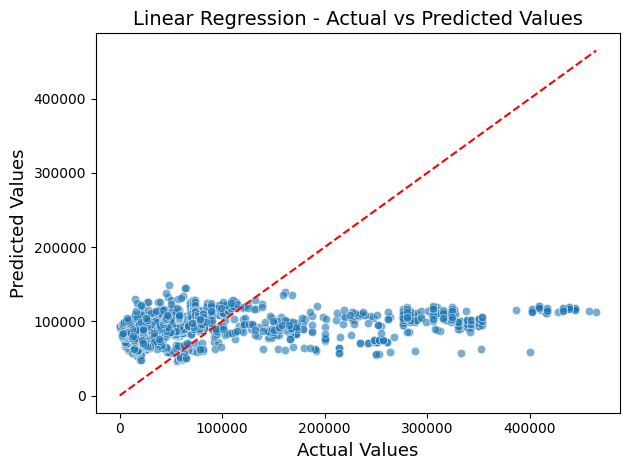

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

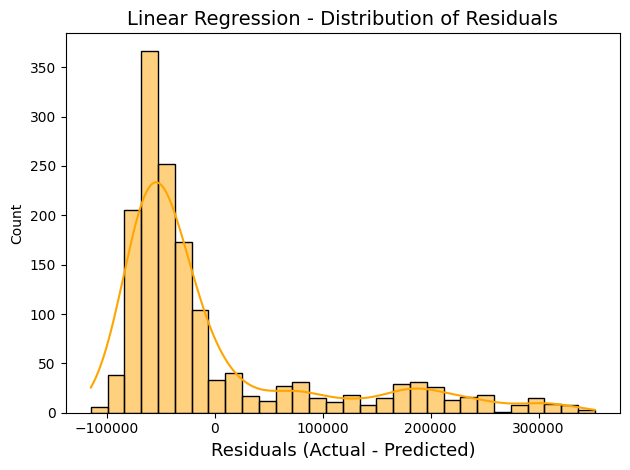

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

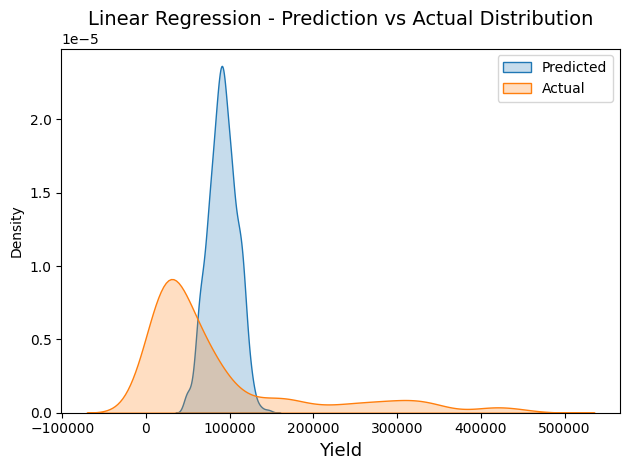

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initialize models
linear_regression= LinearRegression(**lin_best_params)

# Create a dictionary to store all metrics
all_metrics = {}

# Evaluate linear Regression
lin_metrics, lin_model = evaluate_model(linear_regression, X_train_final, X_test_unseen,
                                        y_train_final, y_test_unseen,'Linear Regression',sample_weights1)

all_metrics['Linear Regression'] = lin_metrics

# Plot performance for a model
Y_test_pred = lin_model.predict(X_test_unseen)
plot_model_performance(y_test_unseen, Y_test_pred, 'Linear Regression')


 Evaluating Decision Tree (with sample weights)

 TRAINING PERFORMANCE:
  MAE:  21729.49
  MAPE: 53.69%
  R²:   0.7954

 TEST PERFORMANCE:
  MAE:  38011.82
  MAPE: 66.94%
  R²:   0.6541


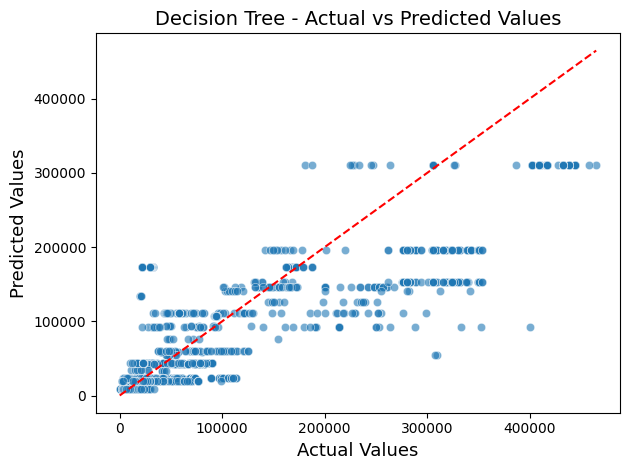

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

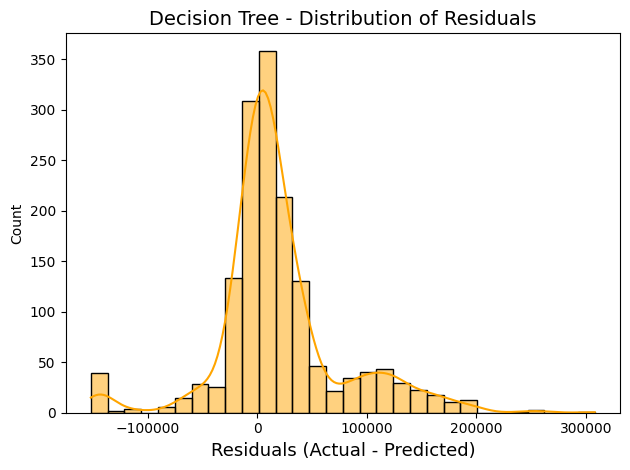

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

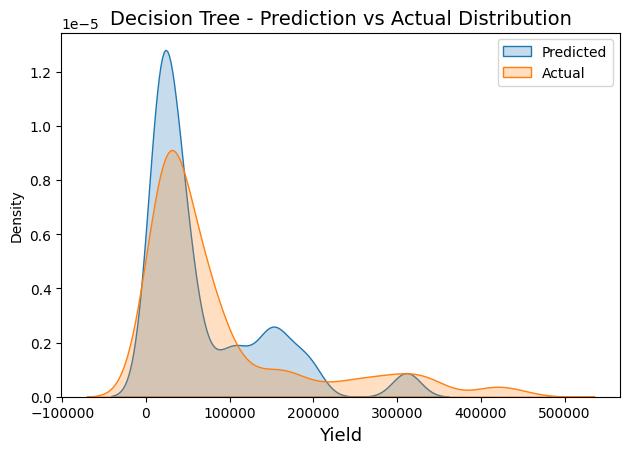

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
# Evaluate Decision Tree
decision_tree= DecisionTreeRegressor(random_state=42, **dt_best_params)


dt_metrics, dt_model = evaluate_model(decision_tree, X_train_final, X_test_unseen,
                                        y_train_final, y_test_unseen, 'Decision Tree',sample_weights1)

all_metrics['Decision Tree'] = dt_metrics

# Plot performance for a model
Y_test_pred = dt_model.predict(X_test_unseen)
plot_model_performance(y_test_unseen, Y_test_pred, 'Decision Tree')


 Evaluating Random Forest (with sample weights)

 TRAINING PERFORMANCE:
  MAE:  4973.07
  MAPE: 14.80%
  R²:   0.9883

 TEST PERFORMANCE:
  MAE:  44592.91
  MAPE: 118.17%
  R²:   0.5831


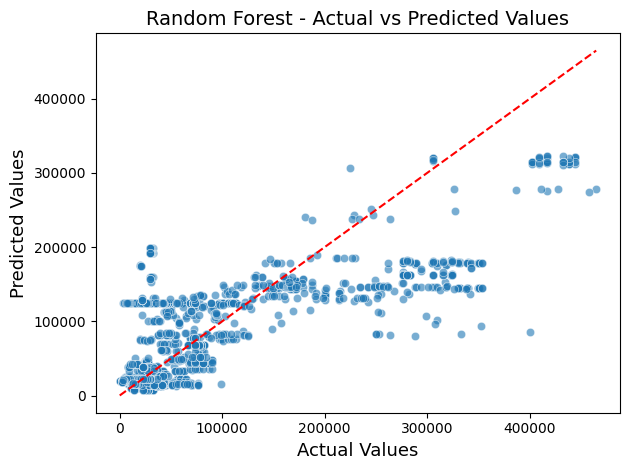

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

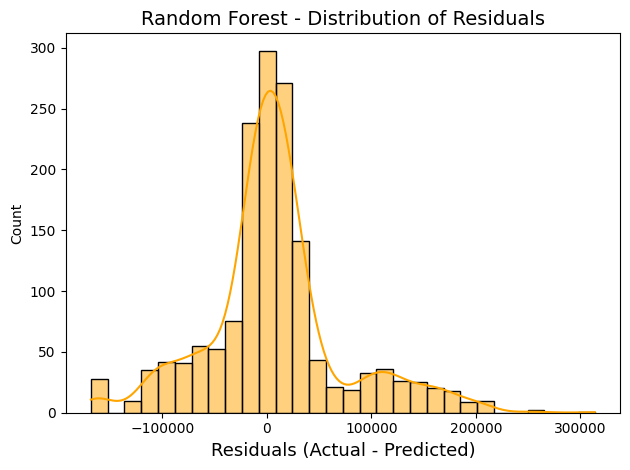

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

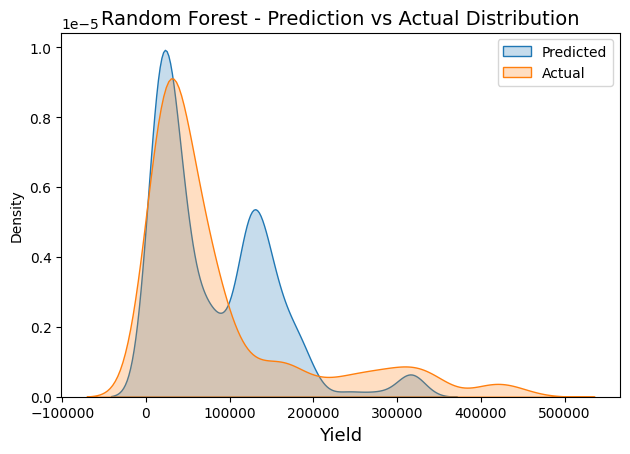

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
# Evaluate Random Forest
random_forest= RandomForestRegressor(random_state=42, **rf_best_params)

rf_metrics, rf_model = evaluate_model(random_forest, X_train_final, X_test_unseen,
                                        y_train_final, y_test_unseen, 'Random Forest',sample_weights1)

all_metrics['Random Forest'] = rf_metrics

# Plot performance for a model
Y_test_pred = rf_model.predict(X_test_unseen)
plot_model_performance(y_test_unseen, Y_test_pred, 'Random Forest')


 Evaluating XGBOOST (with sample weights)

 TRAINING PERFORMANCE:
  MAE:  8368.15
  MAPE: 22.70%
  R²:   0.9701

 TEST PERFORMANCE:
  MAE:  40380.07
  MAPE: 111.86%
  R²:   0.6398


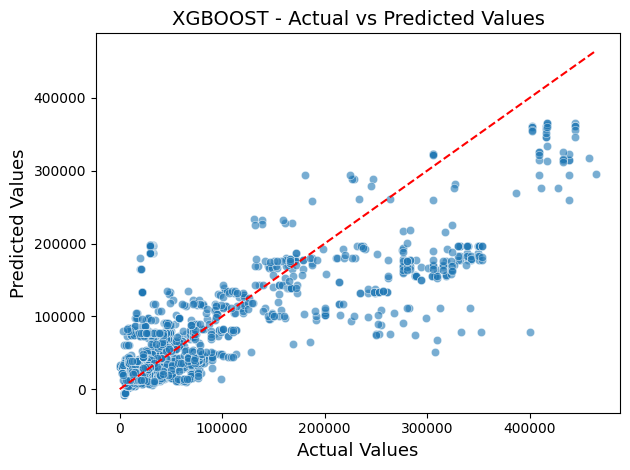

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

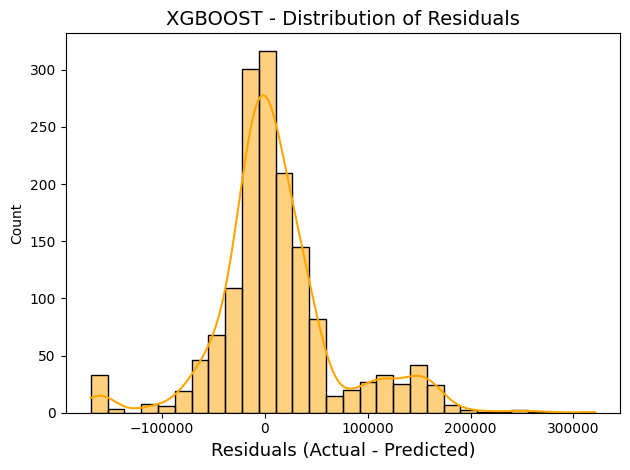

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

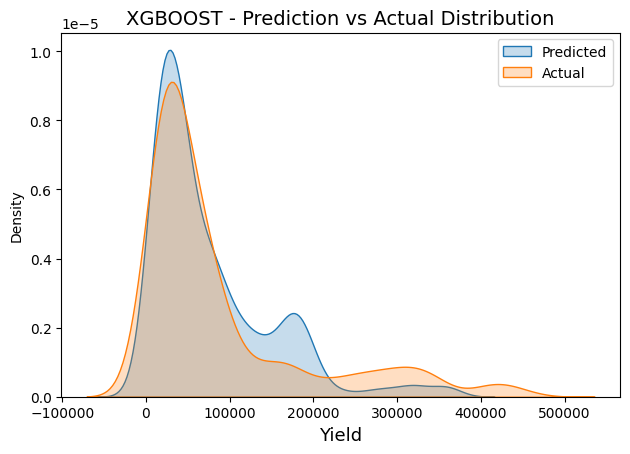

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
 # Evaluate xgboost
xgboost= XGBRegressor(random_state=42, **xgb_best_params)

xgb_metrics, xgb_model = evaluate_model(xgboost,  X_train_final, X_test_unseen,
                                        y_train_final, y_test_unseen,'XGBOOST',sample_weights1)

all_metrics['XGBOOST'] = xgb_metrics

# Plot performance for a model
Y_test_pred = xgb_model.predict(X_test_unseen)
plot_model_performance(y_test_unseen, Y_test_pred, 'XGBOOST')

In [115]:
# Create model with best parameters
weighted_model = create_model(
    learning_rate=best_dnn_params['learning_rate'],
    hidden_layers=1,
    dropout_rate=best_dnn_params['dropout_rate'])

# Train model with sample weighting
history = weighted_model.fit(
    X_train, y_train,
    sample_weight=sample_weights1,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    verbose=1)

# Generate predictions
y_train_pred = weighted_model.predict(X_train)
y_test_pred = weighted_model.predict(X_test)

# Flatten predictions if they're 2D (common with neural networks)
if hasattr(y_train_pred, 'flatten'):
    y_train_pred = y_train_pred.flatten()
if hasattr(y_test_pred, 'flatten'):
    y_test_pred = y_test_pred.flatten()

# Calculate metrics
dnn_weighted_metrics = {
    'model': 'DNN with Weighting',
    'MAE_train': round(mean_absolute_error(y_train, y_train_pred), 2),
    'MAPE_train': round(mean_absolute_percentage_error(y_train, y_train_pred) * 100, 2),
    'R2_train': round(r2_score(y_train, y_train_pred), 4),
    'MAE_test': round(mean_absolute_error(y_test, y_test_pred), 2),
    'MAPE_test': round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2),
    'R2_test': round(r2_score(y_test, y_test_pred), 4)}

# Add to metrics dictionary
all_metrics['DNN'] = dnn_weighted_metrics

# Print results
print(f"\nBEST PARAMETERS FOR WEIGHTED DNN:")
for param, value in best_dnn_params.items():
    print(f"  {param}: {value}")

print("\nTRAINING PERFORMANCE:")
print(f"  MAE:  {dnn_weighted_metrics['MAE_train']:.2f}")
print(f"  MAPE: {dnn_weighted_metrics['MAPE_train']:.2f}%")
print(f"  R²:   {dnn_weighted_metrics['R2_train']:.4f}")

print("\nTEST PERFORMANCE:")
print(f"  MAE:  {dnn_weighted_metrics['MAE_test']:.2f}")
print(f"  MAPE: {dnn_weighted_metrics['MAPE_test']:.2f}%")
print(f"  R²:   {dnn_weighted_metrics['R2_test']:.4f}")

Epoch 1/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 270059776.0000 - mae: 72000.4688 - val_loss: 279103296.0000 - val_mae: 54189.4531
Epoch 2/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 225761904.0000 - mae: 61513.5312 - val_loss: 196683904.0000 - val_mae: 56785.7734
Epoch 3/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 183914496.0000 - mae: 57250.5312 - val_loss: 213897696.0000 - val_mae: 66908.7891
Epoch 4/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 174407888.0000 - mae: 58167.7695 - val_loss: 230705136.0000 - val_mae: 71029.1094
Epoch 5/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 173510368.0000 - mae: 58662.2148 - val_loss: 233954016.0000 - val_mae: 71794.0781
Epoch 6/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 173131088.0000 - mae: 58743.1836 - val_loss: 233835408.0000 - val_mae: 71767.0391
Epoch 7/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 172757744.0000 - mae: 58736.2227 - val_loss: 233107904.0000 - val_mae: 71598.8047

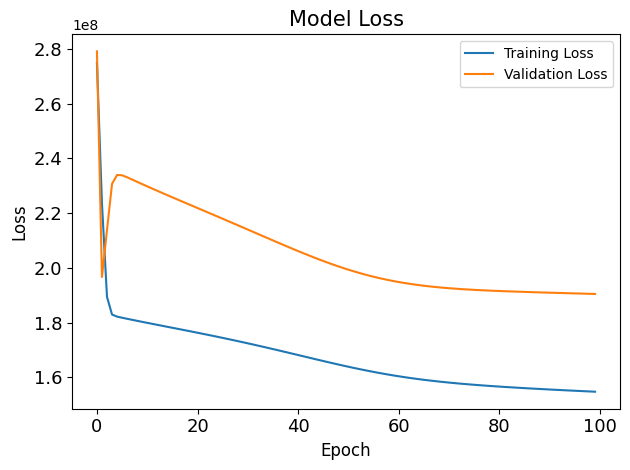

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

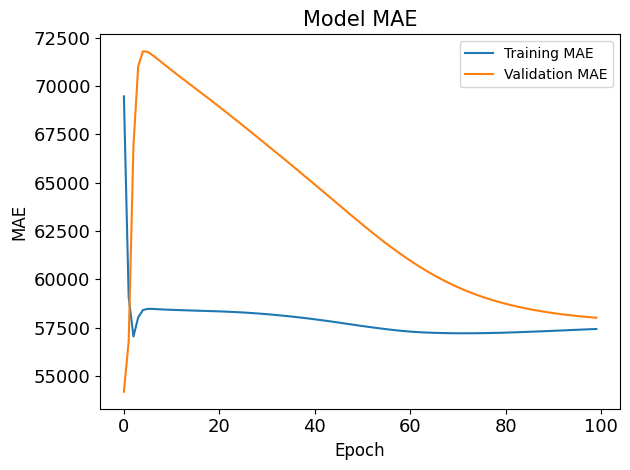

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss',fontsize=15)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Model_Loss.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Model_Loss.png')

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE',fontsize=15)
plt.ylabel('MAE',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Model_MAE.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Model_MAE.png')

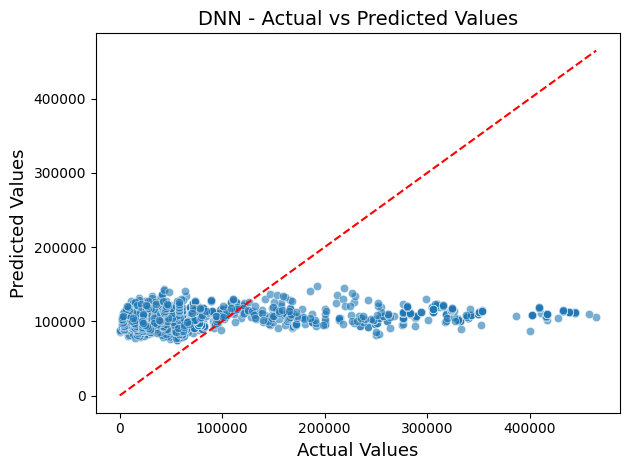

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

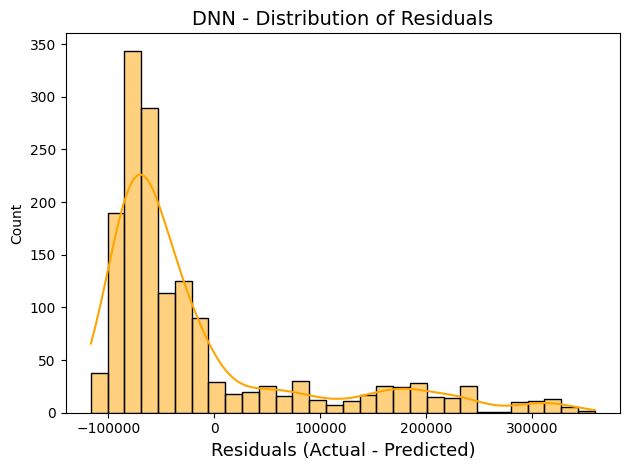

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

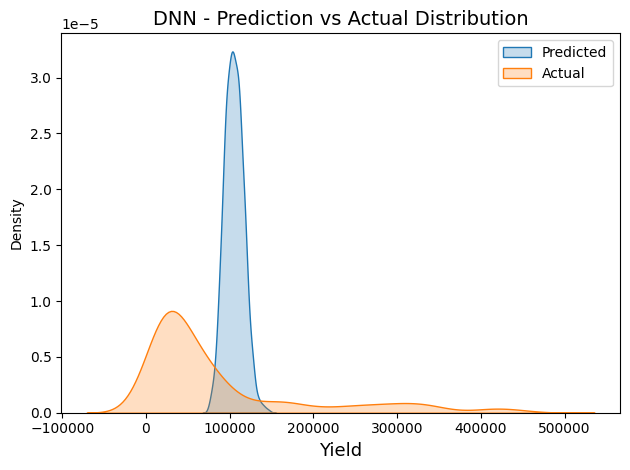

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
# Plot performance
plot_model_performance(y_test, y_test_pred, 'DNN')

In [118]:
# Convert to DataFrame
metrics_df_with_weights = pd.DataFrame.from_dict(all_metrics, orient='index')
metrics_df_with_weights

model  MAE_train  MAPE_train  R2_train  \
Linear Regression   Linear Regression   57363.80      216.09    0.0652   
Decision Tree           Decision Tree   21729.49       53.69    0.7954   
Random Forest           Random Forest    4973.07       14.80    0.9883   
XGBOOST                       XGBOOST    8368.15       22.70    0.9701   
DNN                DNN with Weighting   57588.21      224.20    0.0279   

                   MAE_test  MAPE_test  R2_test  
Linear Regression  74235.12     288.10   0.0874  
Decision Tree      38011.82      66.94   0.6541  
Random Forest      44592.91     118.17   0.5831  
XGBOOST            40380.07     111.86   0.6398  
DNN                81901.45     337.53   0.0192

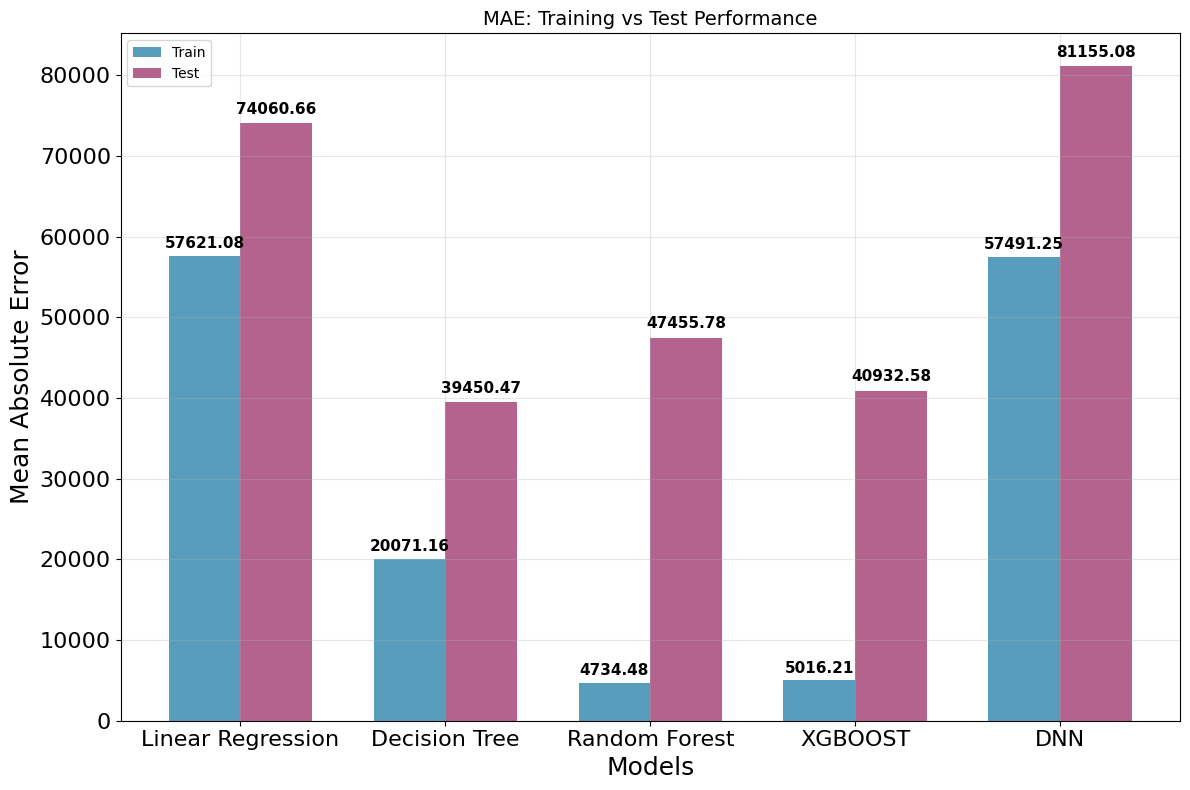

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
# Assuming metrics_df is your DataFrame
models = metrics_df_with_weights.index

# Function to create individual metric charts
def create_metric_chart(models, metric_name, train_col, test_col, ylabel, title_suffix):
    plt.figure(figsize=(12, 8))

    # Set width of bars and positions
    bar_width = 0.35
    x_pos = np.arange(len(models))

    # Create bars
    plt.bar(x_pos - bar_width/2, metrics_df[train_col], bar_width,
            label='Train', alpha=0.8, color='#2E86AB')
    plt.bar(x_pos + bar_width/2, metrics_df[test_col], bar_width,
            label='Test', alpha=0.8, color='#A23B72')

    # Customize chart
    plt.xlabel('Models', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(f'{metric_name}: {title_suffix}', fontsize=14)
    plt.xticks(x_pos, models,fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add value labels on top of bars
    for i, v in enumerate(metrics_df[train_col]):
        plt.text(i - bar_width/2, v + max(metrics_df[train_col])*0.01,
                 f'{v:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    for i, v in enumerate(metrics_df[test_col]):
        plt.text(i + bar_width/2, v + max(metrics_df[test_col])*0.01,
                 f'{v:.2f}', ha='center', va='bottom', fontsize=11,fontweight='bold')

    # Adjust layout
    plt.tight_layout()

    # Save and show
    filename = f'model_comparison_{metric_name.lower()}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    return filename

# Create and save each chart separately
mae_file = create_metric_chart(models,'MAE', 'MAE_train', 'MAE_test', 'Mean Absolute Error', 'Training vs Test Performance')

# Download all files
files.download(mae_file1)

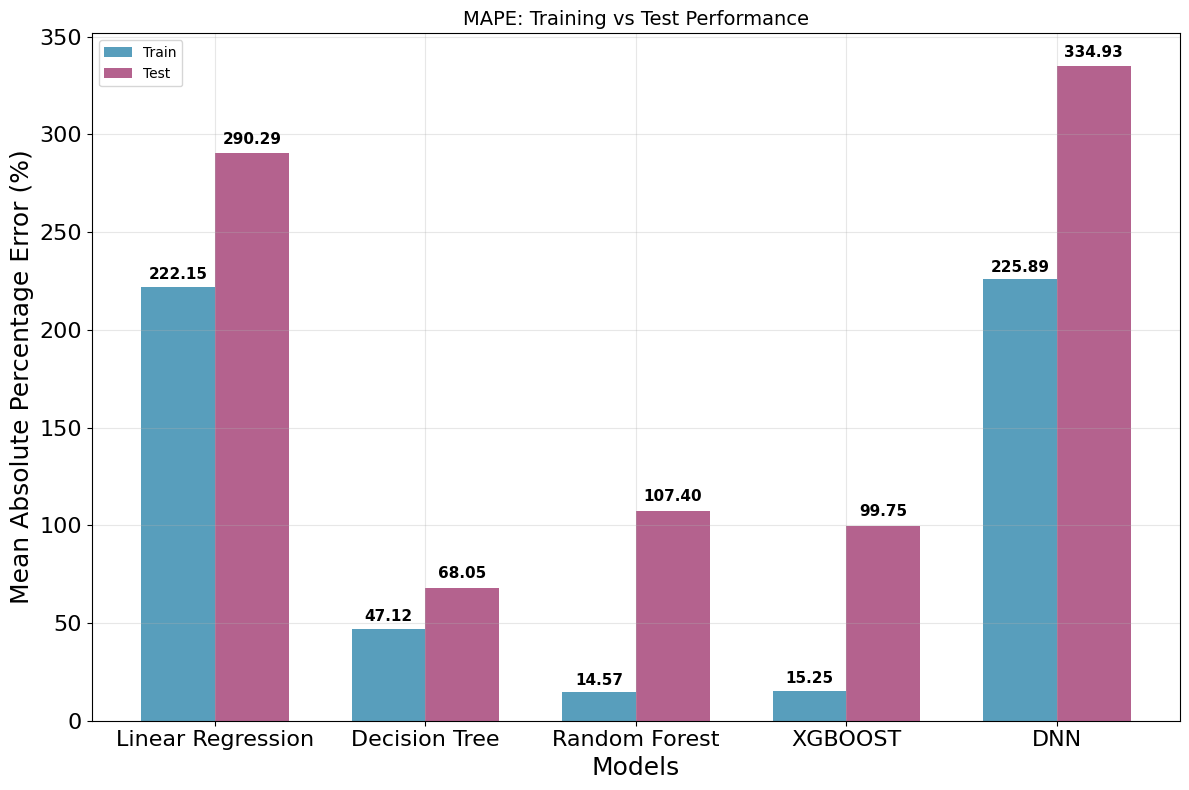

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [121]:
mape_file1 = create_metric_chart(models, 'MAPE', 'MAPE_train', 'MAPE_test', 'Mean Absolute Percentage Error (%)', 'Training vs Test Performance')
files.download(mape_file1)

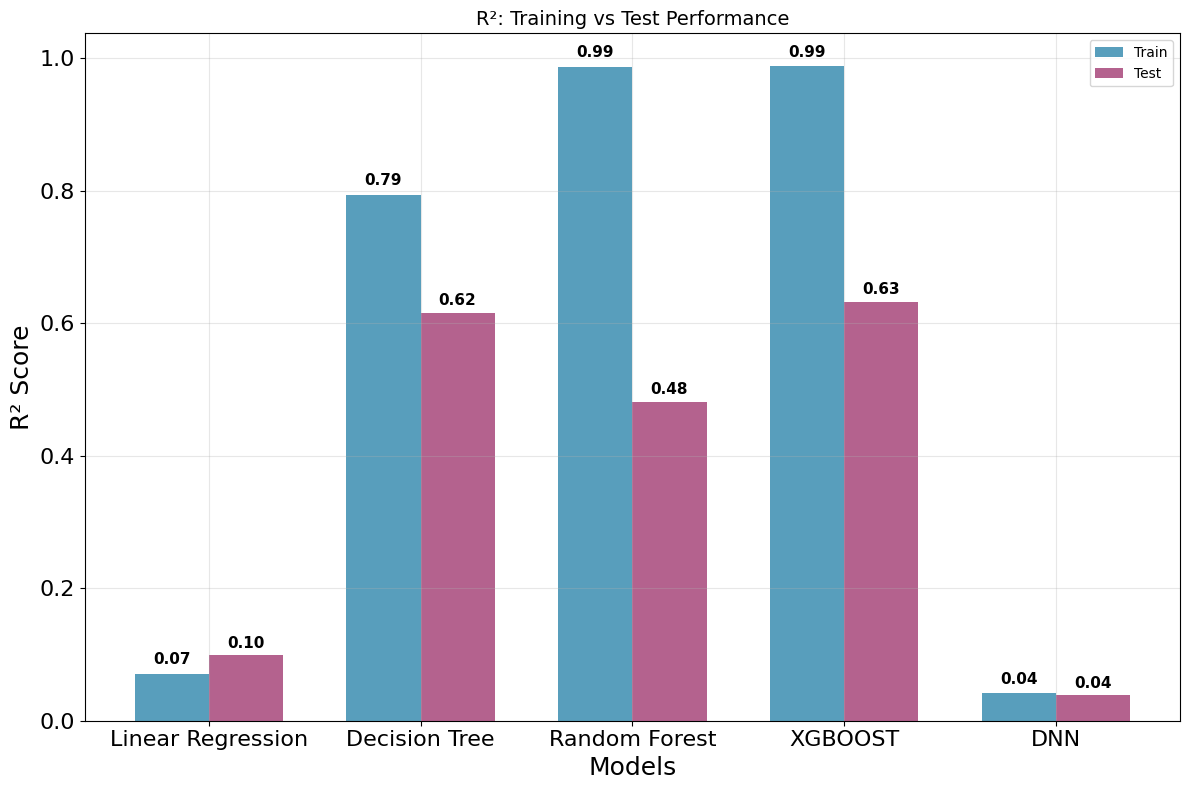

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
r2_file1 = create_metric_chart(models, 'R²', 'R2_train', 'R2_test', 'R² Score', 'Training vs Test Performance')
files.download(r2_file1)

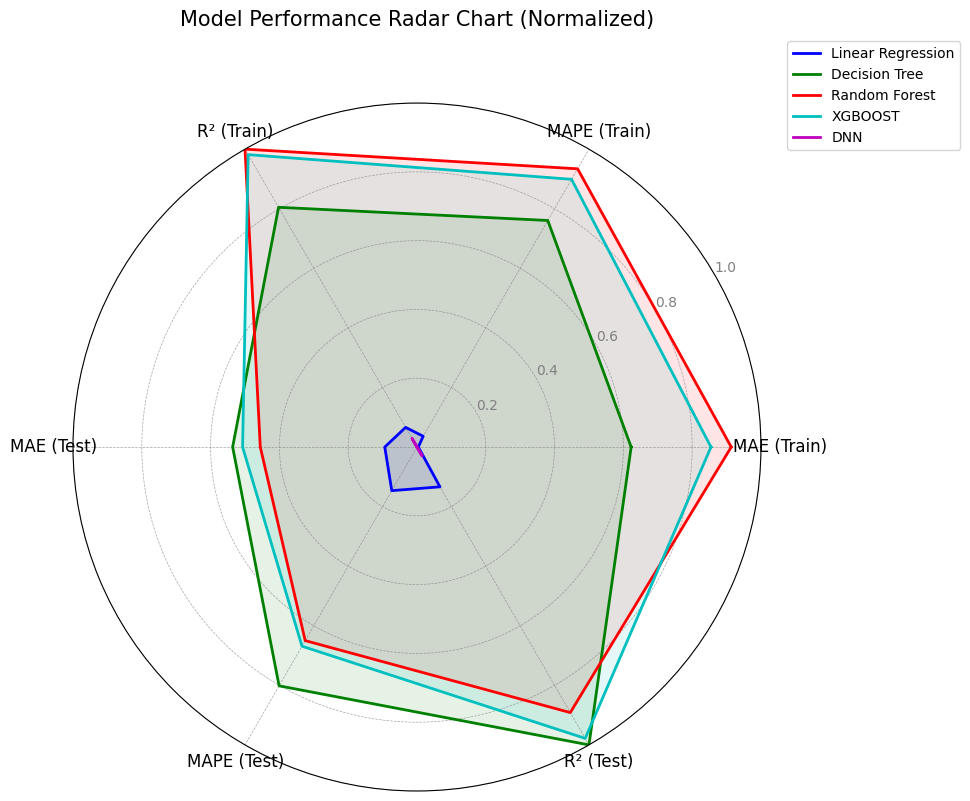

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
models = metrics_df_with_weights.index
metrics = ['MAE', 'MAPE', 'R2']
# Radar chart for model comparison
fig = plt.figure(figsize=(10, 10))
categories = ['MAE_train', 'MAPE_train', 'R2_train', 'MAE_test', 'MAPE_test', 'R2_test']
N = len(categories)

# Normalize the data for radar chart (since metrics have different scales)
normalized_df = metrics_df_with_weights.copy()
for col in ['MAE_train', 'MAE_test']:
    normalized_df[col] = 1 - (normalized_df[col] / normalized_df[col].max())
for col in ['MAPE_train', 'MAPE_test']:
    normalized_df[col] = 1 - (normalized_df[col] / normalized_df[col].max())
for col in ['R2_train', 'R2_test']:
    normalized_df[col] = normalized_df[col] / normalized_df[col].max()

# Calculate angles for radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the circle

# Create subplot
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.ylim(0, 1)

# Improve category labels with better formatting
category_labels = ['MAE (Train)', 'MAPE (Train)', 'R² (Train)',
                   'MAE (Test)', 'MAPE (Test)', 'R² (Test)']

plt.xticks(angles[:-1], category_labels, color='black', size=12, ha='center', va='center')
ax.set_rlabel_position(30)  # Move radial labels to a better position
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"],
           color="grey", size=10)
plt.ylim(0, 1)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot each model
colors = ['b', 'g', 'r', 'c', 'm']
for i, model in enumerate(models):
    values = normalized_df.loc[model, categories].values.flatten().tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

plt.title('Model Performance Radar Chart (Normalized)', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
# Save the radar chart
plt.savefig('model_radar_chart1.jpg', dpi=300, bbox_inches='tight')
plt.show()

files.download('model_radar_chart1.jpg')

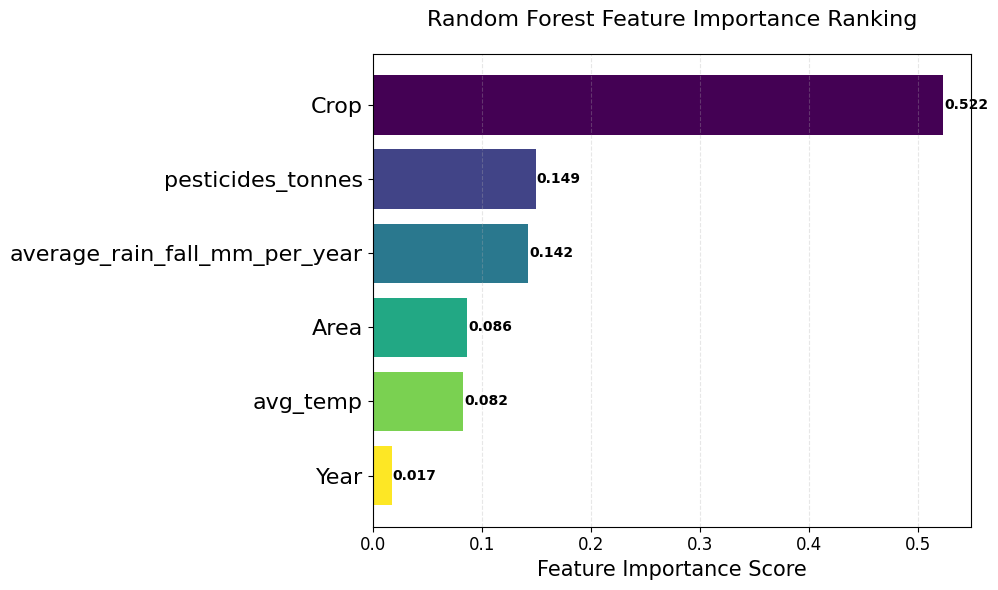

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
# Plot feature importance for Random Forest with enhanced formatting
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train model and get feature importances
model = RandomForestRegressor(**rf_best_params).fit(X_train_final, y_train_final, sample_weights1)
importances = model.feature_importances_
feature_names = X_train_time.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = feature_names[indices]

# Create plot with better layout
plt.figure(figsize=(10,6))

# Create horizontal bar plot with color gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_importances)))
bars = plt.barh(range(len(sorted_importances)), sorted_importances, color=colors)

# Customize appearance
plt.yticks(range(len(sorted_importances)), sorted_features, fontsize=16)
plt.xticks(fontsize=12)
plt.xlabel('Feature Importance Score', fontsize=15)
plt.title('Random Forest Feature Importance Ranking', fontsize=16, pad=20)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, v in enumerate(sorted_importances):
    if v > 0.01:  # Only label significant values
        plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=10,
                 fontweight='bold')

# Invert y-axis so highest importance is at top
plt.gca().invert_yaxis()

# Adjust layout
plt.tight_layout()

# Save with higher resolution
plt.savefig('Enhanced_Feature_Importance1.png', dpi=300, bbox_inches='tight')
plt.show()

# Download the file in Google Colab
files.download('Enhanced_Feature_Importance1.png')

In [125]:
# Create comparison DataFrame with percentage improvements
comparison_df = pd.DataFrame()
# Extract metrics for each model
for model_name in metrics_df.index:
    # Get metrics for both versions
    without_weights = metrics_df.loc[model_name]
    with_weights = metrics_df_with_weights.loc[model_name]
    # Calculate percentage improvements
    r2_abs_improvement = with_weights['R2_test'] - without_weights['R2_test']
    r2_pct_improvement = (r2_abs_improvement / abs(without_weights['R2_test'])) * 100 if without_weights['R2_test'] != 0 else 0

    mae_abs_improvement = without_weights['MAE_test'] - with_weights['MAE_test']  # positive = improvement
    mae_pct_improvement = (mae_abs_improvement / without_weights['MAE_test']) * 100 if without_weights['MAE_test'] != 0 else 0

    mape_abs_improvement = without_weights['MAPE_test'] - with_weights['MAPE_test']  # positive = improvement
    mape_pct_improvement = (mape_abs_improvement / without_weights['MAPE_test']) * 100 if without_weights['MAPE_test'] != 0 else 0

    # Create comparison row
    comparison_row = {
        'Model': model_name,
        # Baseline metrics
        'R² (no weights)': without_weights['R2_test'],
        'R² (weights)': with_weights['R2_test'],
        'R² Improvement': r2_abs_improvement,
        'R² Improvement (%)': r2_pct_improvement,
        # MAE metrics
        'MAE (no weights)': without_weights['MAE_test'],
        'MAE (weights)': with_weights['MAE_test'],
        'MAE Improvement': mae_abs_improvement,
        'MAE Reduction (%)': mae_pct_improvement,
        # MAPE metrics
        'MAPE (no weights)': without_weights['MAPE_test'],
        'MAPE (weights)': with_weights['MAPE_test'],
        'MAPE Improvement': mape_abs_improvement,
        'MAPE Reduction (%)': mape_pct_improvement}
    comparison_df = pd.concat([comparison_df, pd.DataFrame([comparison_row])], ignore_index=True)
# Set Model as index
comparison_df.set_index('Model', inplace=True)
comparison_df

R² (no weights)  R² (weights)  R² Improvement  \
Model                                                              
Linear Regression           0.0992        0.0874         -0.0118   
Decision Tree               0.6162        0.6541          0.0379   
Random Forest               0.4819        0.5831          0.1012   
XGBOOST                     0.6328        0.6398          0.0070   
DNN                         0.0387        0.0192         -0.0195   

                   R² Improvement (%)  MAE (no weights)  MAE (weights)  \
Model                                                                    
Linear Regression          -11.895161          74060.66       74235.12   
Decision Tree                6.150600          39450.47       38011.82   
Random Forest               21.000208          47455.78       44592.91   
XGBOOST                      1.106195          40932.58       40380.07   
DNN                        -50.387597          81155.08       81901.45   

                   MAE Improvement  MAE Reduction (%)  MAPE (no weights)  \
Model                                                                      
Linear Regression          -174.46          -0.235564             290.29   
Decision Tree              1438.65           3.646725              68.05   
Random Forest              2862.87           6.032711             107.40   
XGBOOST                     552.51           1.349805              99.75   
DNN                        -746.37          -0.919684             334.93   

                   MAPE (weights)  MAPE Improvement  MAPE Reduction (%)  
Model                                                                    
Linear Regression          288.10              2.19            0.754418  
Decision Tree               66.94              1.11            1.631154  
Random Forest              118.17            -10.77          -10.027933  
XGBOOST                    111.86            -12.11          -12.140351  
DNN                        337.53             -2.60           -0.776282

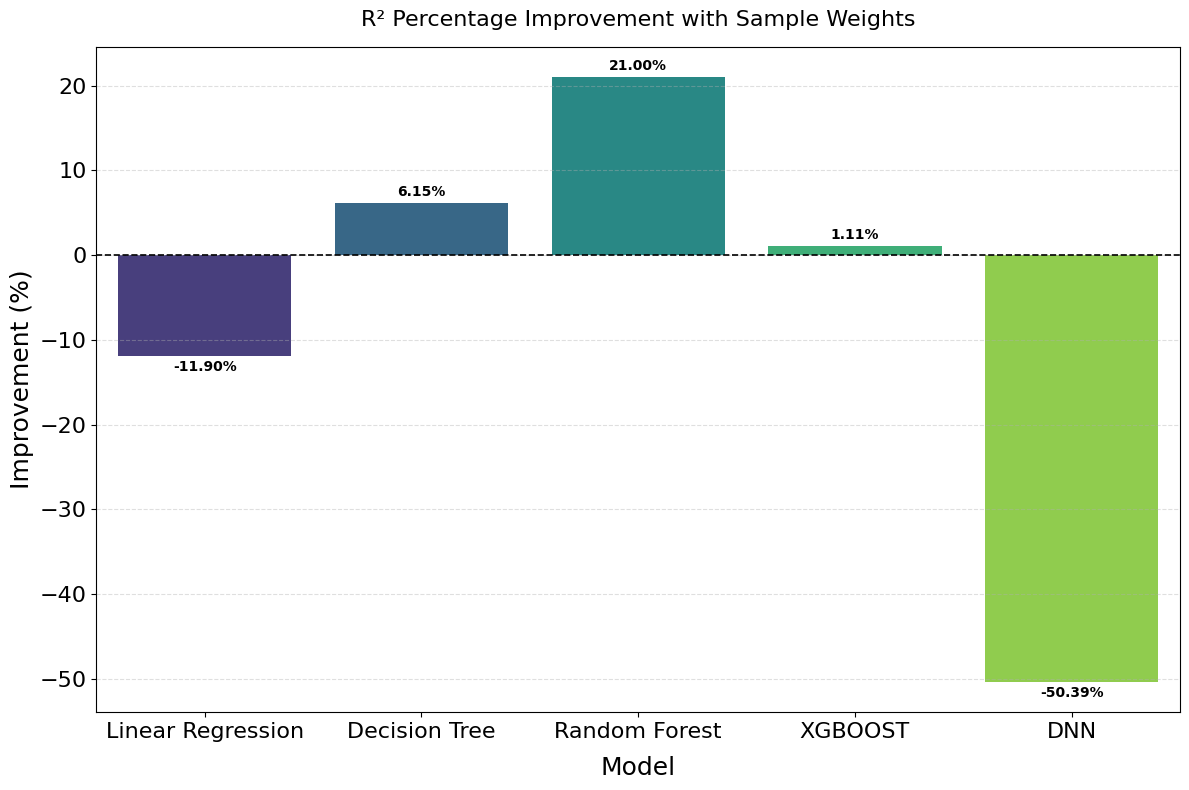

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
# 1. R² Percentage Improvement Plot
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='Model', y='R² Improvement (%)',
                 data=comparison_df.reset_index(),
                 palette='viridis',
                 saturation=0.85)
def add_bar_labels(ax, fmt="{:.2f}"):
    for container in ax.containers:
        ax.bar_label(container, fmt=fmt, label_type='edge',
                     fontsize=10, padding=3,fontweight='bold')
# Add value labels
add_bar_labels(ax1, fmt="{:.2f}%")
# Add zero reference line
ax1.axhline(0, color='black', linestyle='--', linewidth=1.2)
# Add horizontal grid lines
ax1.yaxis.grid(True, linestyle='--', alpha=0.4)
# Set titles and labels
plt.title('R² Percentage Improvement with Sample Weights', fontsize=16, pad=15)
plt.ylabel('Improvement (%)', fontsize=18)
plt.xlabel('Model', fontsize=18, labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('R²_Percentage_Improvement.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('R²_Percentage_Improvement.png')

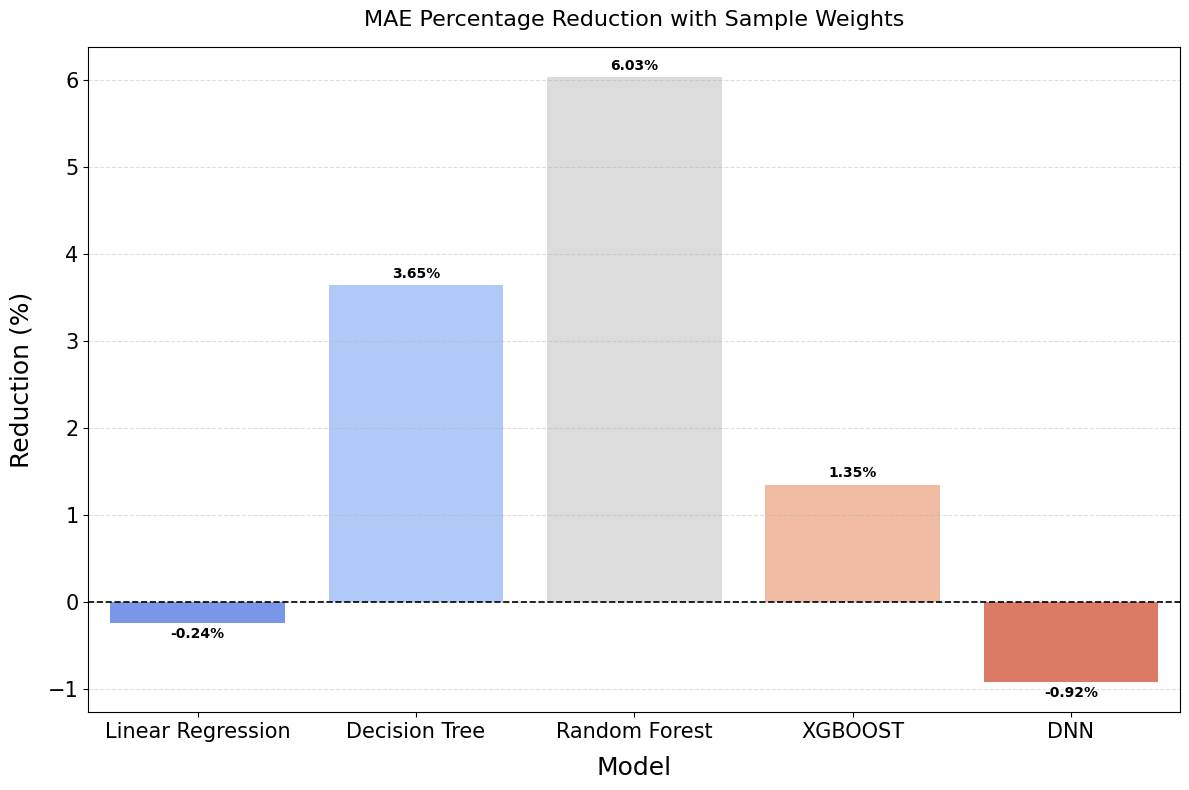

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
# 2. MAE Percentage Reduction Plot
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='Model', y='MAE Reduction (%)',
                 data=comparison_df.reset_index(),
                 palette='coolwarm',
                 saturation=0.85)

# Add value labels
add_bar_labels(ax2, fmt="{:.2f}%")
# Add zero reference line
ax2.axhline(0, color='black', linestyle='--', linewidth=1.2)
# Add horizontal grid lines
ax2.yaxis.grid(True, linestyle='--', alpha=0.4)
# Set titles and labels
plt.title('MAE Percentage Reduction with Sample Weights', fontsize=16, pad=15)
plt.ylabel('Reduction (%)', fontsize=18, labelpad=10)
plt.xlabel('Model', fontsize=18, labelpad=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('MAE_Percentage_Reduction.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('MAE_Percentage_Reduction.png')

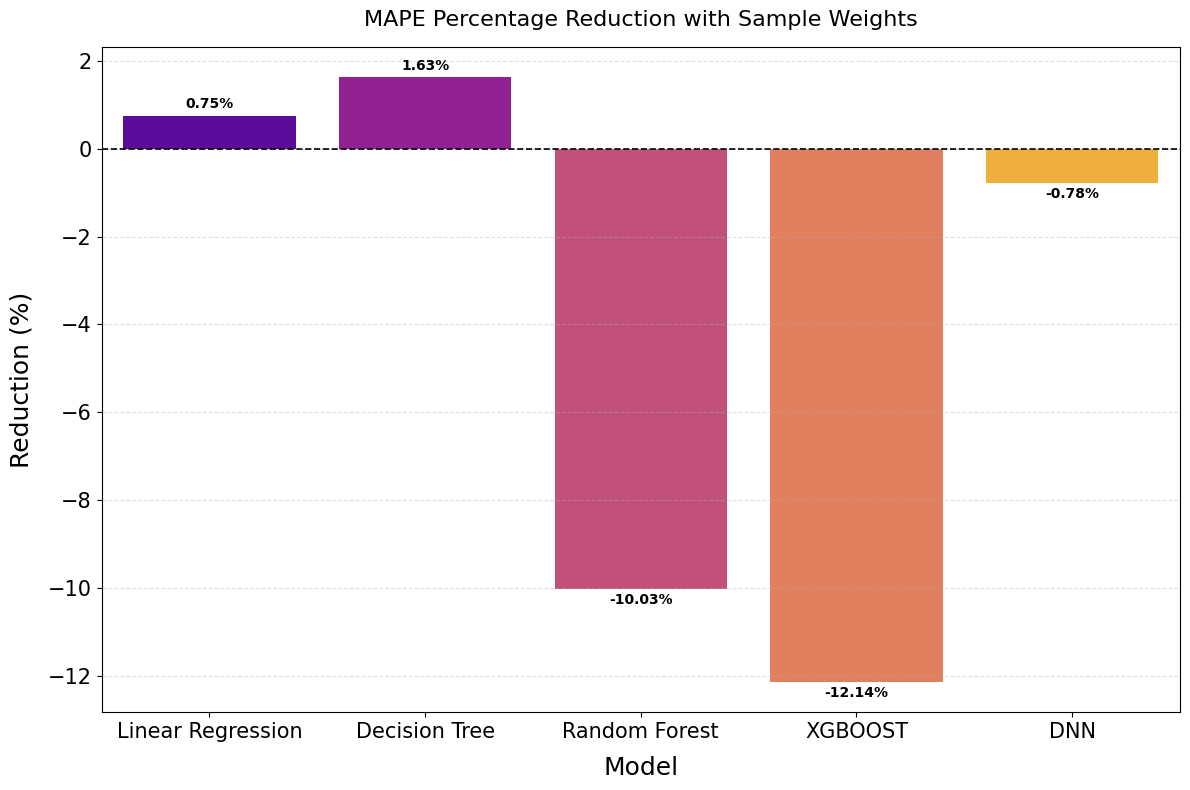

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
# 3. MAPE Percentage Reduction Plot
plt.figure(figsize=(12, 8))
ax3 = sns.barplot(x='Model', y='MAPE Reduction (%)',
                 data=comparison_df.reset_index(),
                 palette='plasma',
                 saturation=0.85)

# Add value labels
add_bar_labels(ax3, fmt="{:.2f}%")

# Add zero reference line
ax3.axhline(0, color='black', linestyle='--', linewidth=1.2)

# Add horizontal grid lines
ax3.yaxis.grid(True, linestyle='--', alpha=0.4)

# Set titles and labels
plt.title('MAPE Percentage Reduction with Sample Weights', fontsize=16, pad=15)
plt.ylabel('Reduction (%)', fontsize=18, labelpad=10)
plt.xlabel('Model', fontsize=18, labelpad=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('MAPE_Percentage_Reduction.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('MAPE_Percentage_Reduction.png')

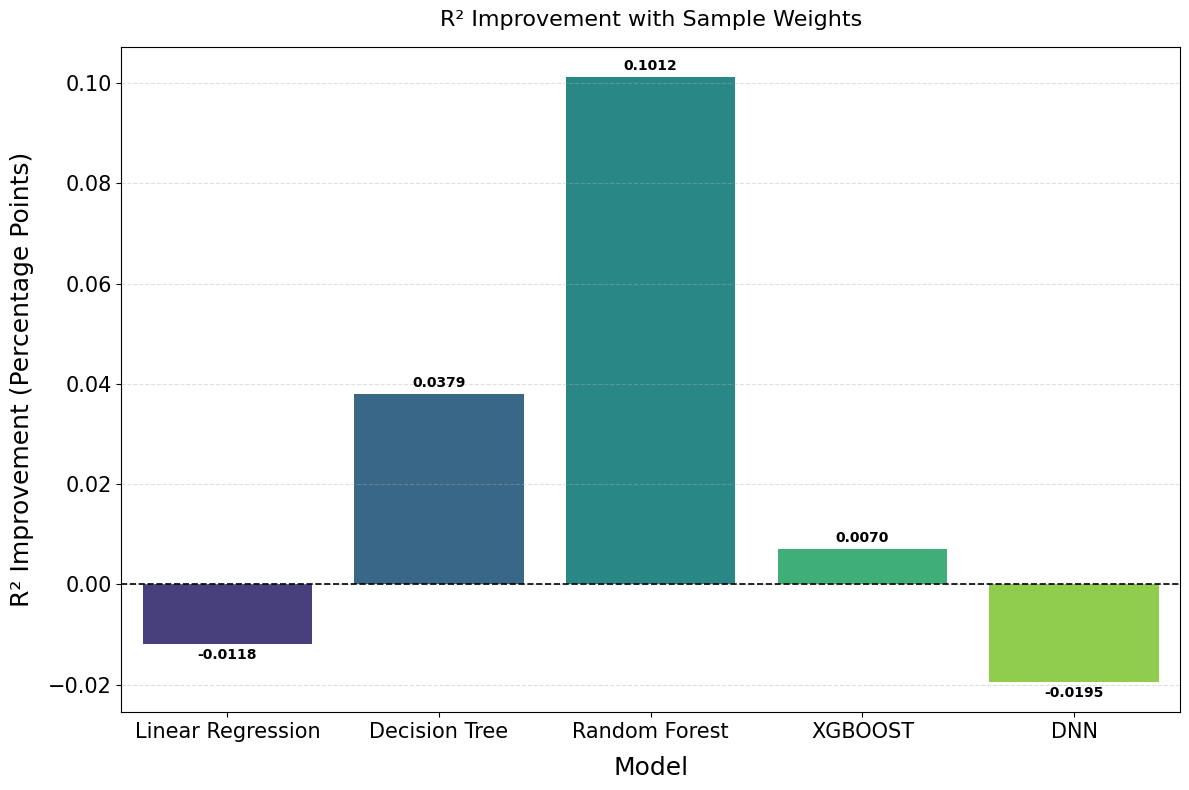

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [129]:
# 1. R² Improvement Plot
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='Model', y='R² Improvement',
                 data=comparison_df.reset_index(),
                 palette='viridis',
                 saturation=0.85)

# Add zero reference line
ax1.axhline(0, color='black', linestyle='--', linewidth=1.2)
# Add horizontal grid lines
ax1.yaxis.grid(True, linestyle='--', alpha=0.4)
# Set titles and labels
plt.title('R² Improvement with Sample Weights', fontsize=16, pad=15)
plt.ylabel('R² Improvement (Percentage Points)', fontsize=18, labelpad=10)
plt.xlabel('Model', fontsize=18, labelpad=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
add_bar_labels(ax1, fmt="{:.4f}")
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('R²_Improvement.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('R²_Improvement.png')

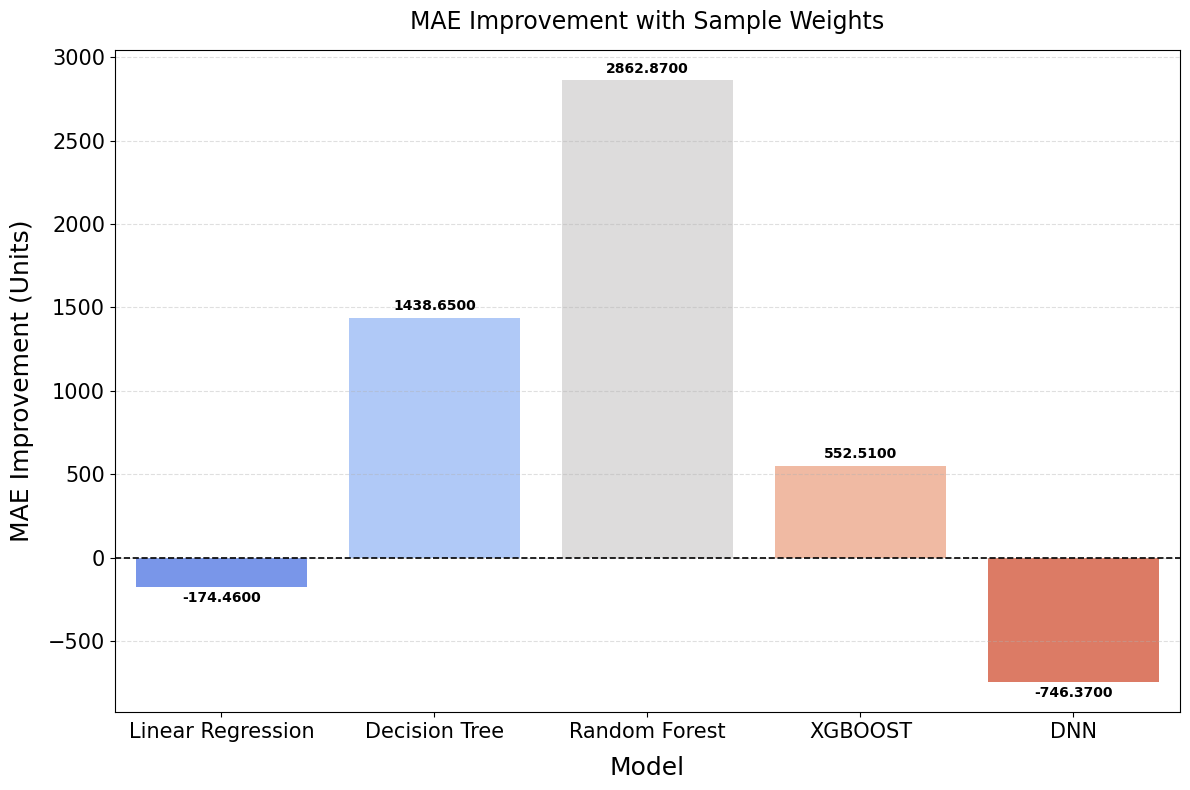

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
# 2. MAE Improvement Plot
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='Model', y='MAE Improvement',
                 data=comparison_df.reset_index(),
                 palette='coolwarm',
                 saturation=0.85)
# Add zero reference line
ax2.axhline(0, color='black', linestyle='--', linewidth=1.2)
# Add horizontal grid lines
ax2.yaxis.grid(True, linestyle='--', alpha=0.4)
# Set titles and labels
plt.title('MAE Improvement with Sample Weights', fontsize=17, pad=15)
plt.ylabel('MAE Improvement (Units)', fontsize=18, labelpad=10)
plt.xlabel('Model', fontsize=18, labelpad=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
add_bar_labels(ax2, fmt="{:.4f}")
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('MAE_Improvement.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('MAE_Improvement.png')

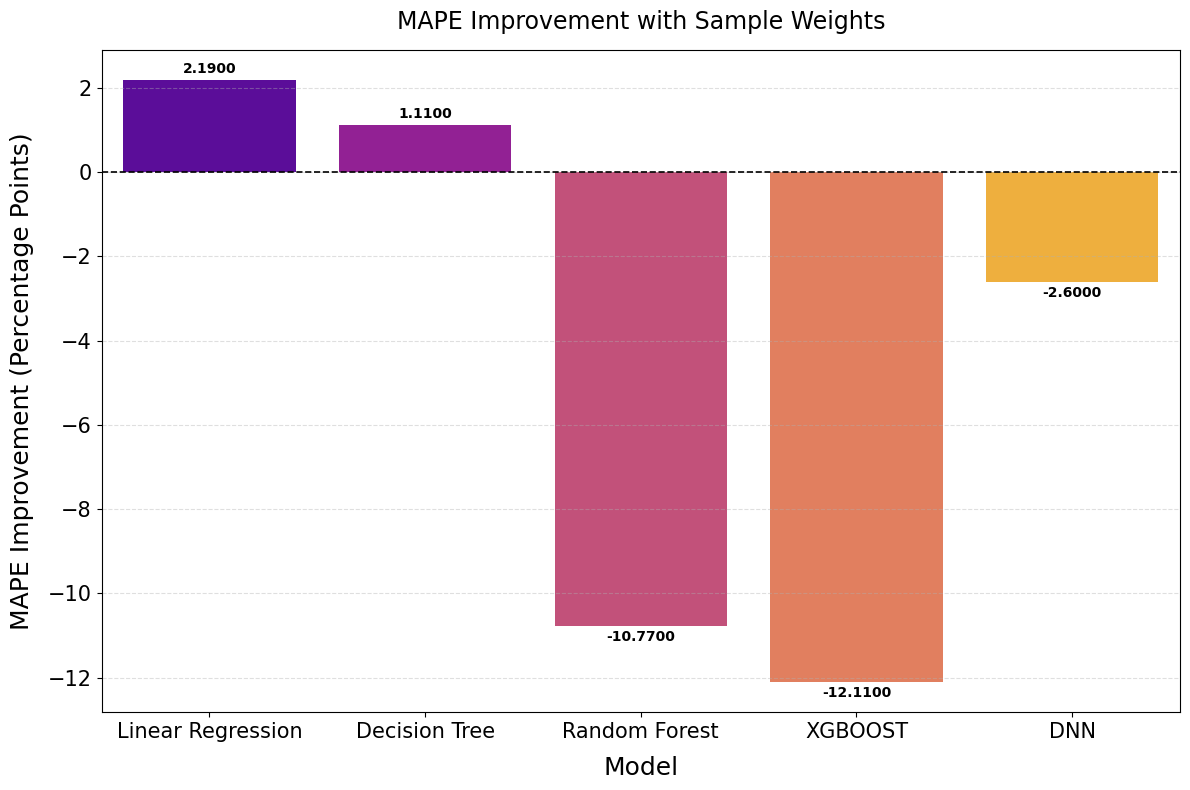

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [131]:
# 3. MAPE Improvement Plot
plt.figure(figsize=(12, 8))
ax3 = sns.barplot(x='Model', y='MAPE Improvement',
                 data=comparison_df.reset_index(),
                 palette='plasma',
                 saturation=0.85)
# Add zero reference line
ax3.axhline(0, color='black', linestyle='--', linewidth=1.2)
# Add horizontal grid lines
ax3.yaxis.grid(True, linestyle='--', alpha=0.4)
# Set titles and labels
plt.title('MAPE Improvement with Sample Weights', fontsize=17, pad=15)
plt.ylabel('MAPE Improvement (Percentage Points)', fontsize=18, labelpad=10)
plt.xlabel('Model', fontsize=18, labelpad=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
add_bar_labels(ax3, fmt="{:.4f}")
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('MAPE_Improvement.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('MAPE_Improvement.png')

In [132]:
# 2. Comprehensive Metrics Table
# Format comparison table
formatted_comparison = comparison_df.copy()
# Format all values to two decimal places
for col in formatted_comparison.columns:
    if 'Improvement' in col:
        formatted_comparison[col] = formatted_comparison[col].apply(lambda x: f"{x:+.4f}" if 'R²' in col else f"{x:+.2f}")
    else:
        formatted_comparison[col] = formatted_comparison[col].apply(lambda x: f"{x:.4f}" if 'R²' in col else f"{x:.2f}")
# Add percentage signs for MAPE
formatted_comparison['MAPE (no weights)'] = formatted_comparison['MAPE (no weights)'] + '%'
formatted_comparison['MAPE (weights)'] = formatted_comparison['MAPE (weights)'] + '%'

print("Model Performance Comparison: With vs Without Sample Weights")
formatted_comparison

Model Performance Comparison: With vs Without Sample Weights


R² (no weights) R² (weights) R² Improvement  \
Model                                                           
Linear Regression          0.0992       0.0874        -0.0118   
Decision Tree              0.6162       0.6541        +0.0379   
Random Forest              0.4819       0.5831        +0.1012   
XGBOOST                    0.6328       0.6398        +0.0070   
DNN                        0.0387       0.0192        -0.0195   

                  R² Improvement (%) MAE (no weights) MAE (weights)  \
Model                                                                 
Linear Regression           -11.8952         74060.66      74235.12   
Decision Tree                +6.1506         39450.47      38011.82   
Random Forest               +21.0002         47455.78      44592.91   
XGBOOST                      +1.1062         40932.58      40380.07   
DNN                         -50.3876         81155.08      81901.45   

                  MAE Improvement MAE Reduction (%) MAPE (no weights)  \
Model                                                                   
Linear Regression         -174.46             -0.24           290.29%   
Decision Tree            +1438.65              3.65            68.05%   
Random Forest            +2862.87              6.03           107.40%   
XGBOOST                   +552.51              1.35            99.75%   
DNN                       -746.37             -0.92           334.93%   

                  MAPE (weights) MAPE Improvement MAPE Reduction (%)  
Model                                                                 
Linear Regression        288.10%            +2.19               0.75  
Decision Tree             66.94%            +1.11               1.63  
Random Forest            118.17%           -10.77             -10.03  
XGBOOST                  111.86%           -12.11             -12.14  
DNN                      337.53%            -2.60              -0.78

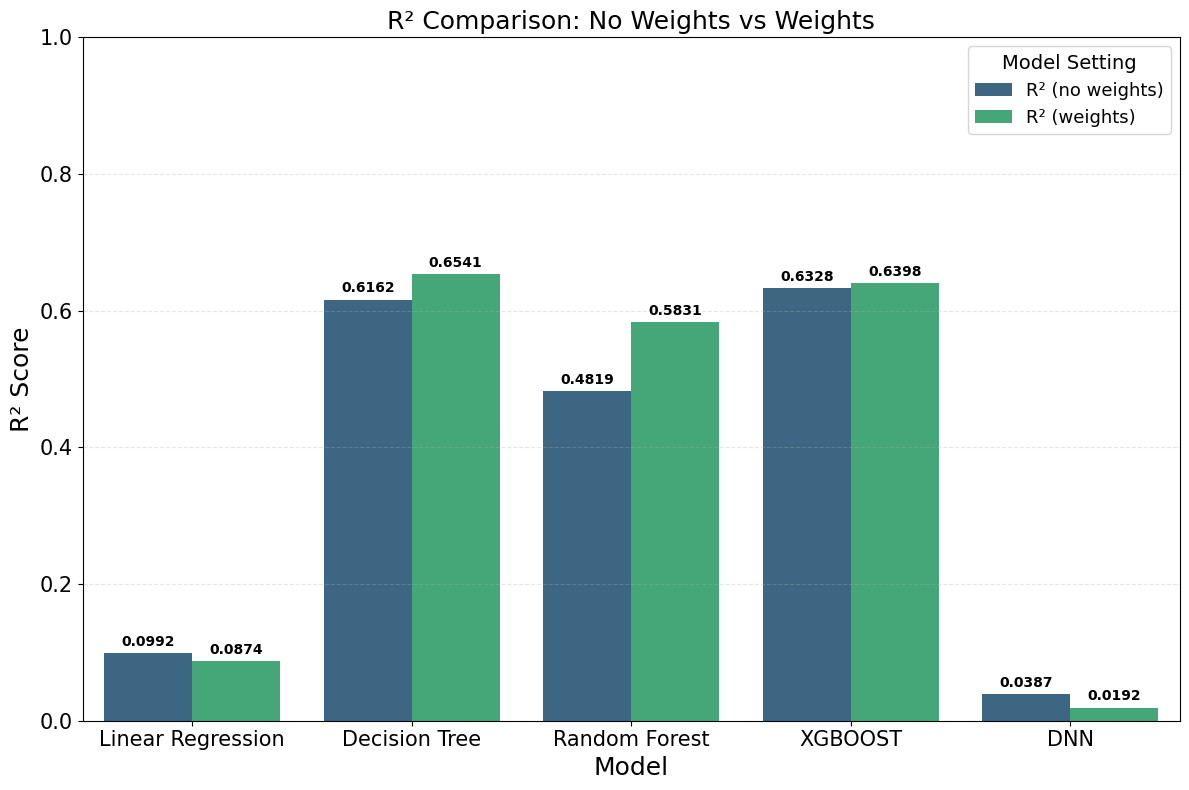

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
# 3. Detailed Metric Visualization
# Melt DataFrame for better plotting
value_vars= ['R² (no weights)', 'R² (weights)', 'MAE (no weights)',
             'MAE (weights)','MAPE (no weights)', 'MAPE (weights)']
melted_df = comparison_df.reset_index().melt(id_vars='Model', value_vars= value_vars,
                                             var_name='Metric', value_name='Value')

# 1. R² Comparison Plot
plt.figure(figsize=(12, 8))
r2_data = melted_df[melted_df['Metric'].str.contains('R²')]
ax1 = sns.barplot(x='Model', y='Value', hue='Metric', data=r2_data, palette='viridis')
plt.title('R² Comparison: No Weights vs Weights', fontsize=18)
plt.ylabel('R² Score', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.legend(title='Model Setting', fontsize=13, title_fontsize=14)
add_bar_labels(ax1, fmt="{:.4f}")
plt.ylim(0, 1.0)  # R² range is 0-1
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('R²_Comparison.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('R²_Comparison.png')

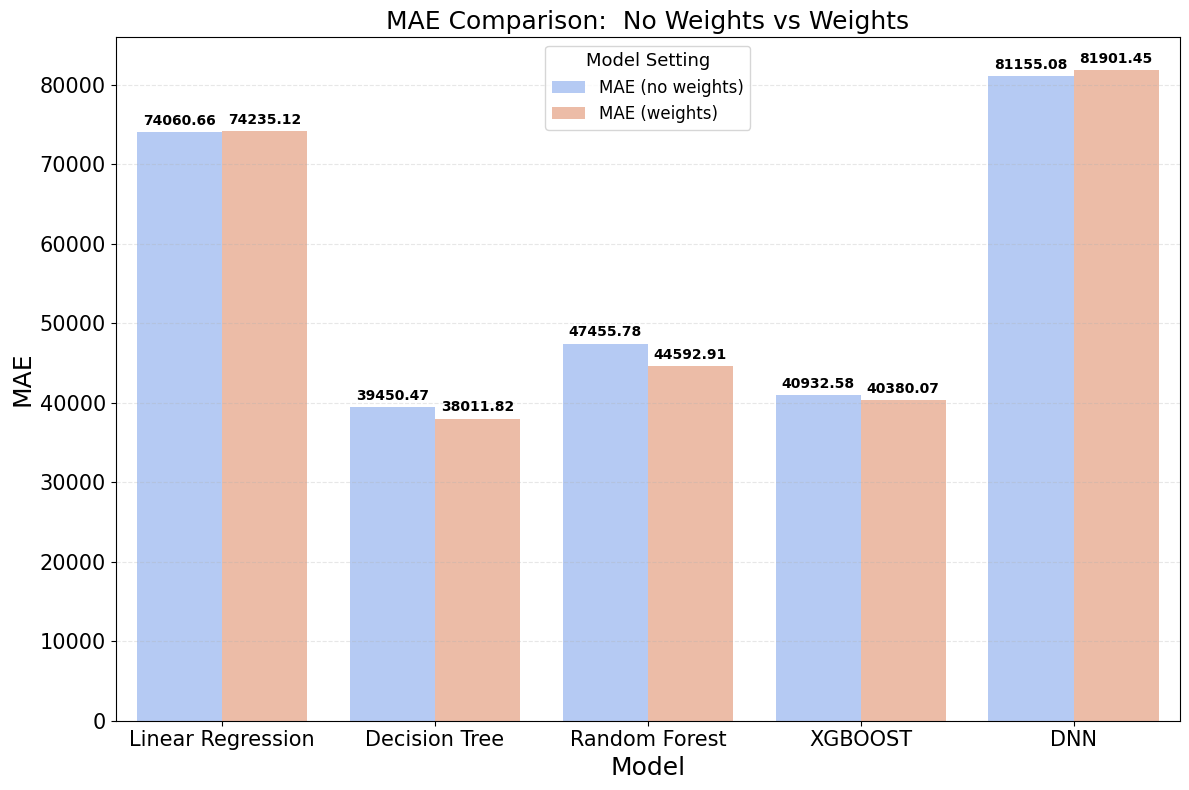

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
# 2. MAE Comparison Plot
plt.figure(figsize=(12, 8))
mae_data = melted_df[melted_df['Metric'].str.contains('MAE')]
ax2 = sns.barplot(x='Model', y='Value', hue='Metric', data=mae_data, palette='coolwarm')
plt.title('MAE Comparison:  No Weights vs Weights', fontsize=18)
plt.ylabel('MAE', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.legend(title='Model Setting', fontsize=12, title_fontsize=13)
add_bar_labels(ax2, fmt="{:.2f}")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('MAE_Comparison.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('MAE_Comparison.png')

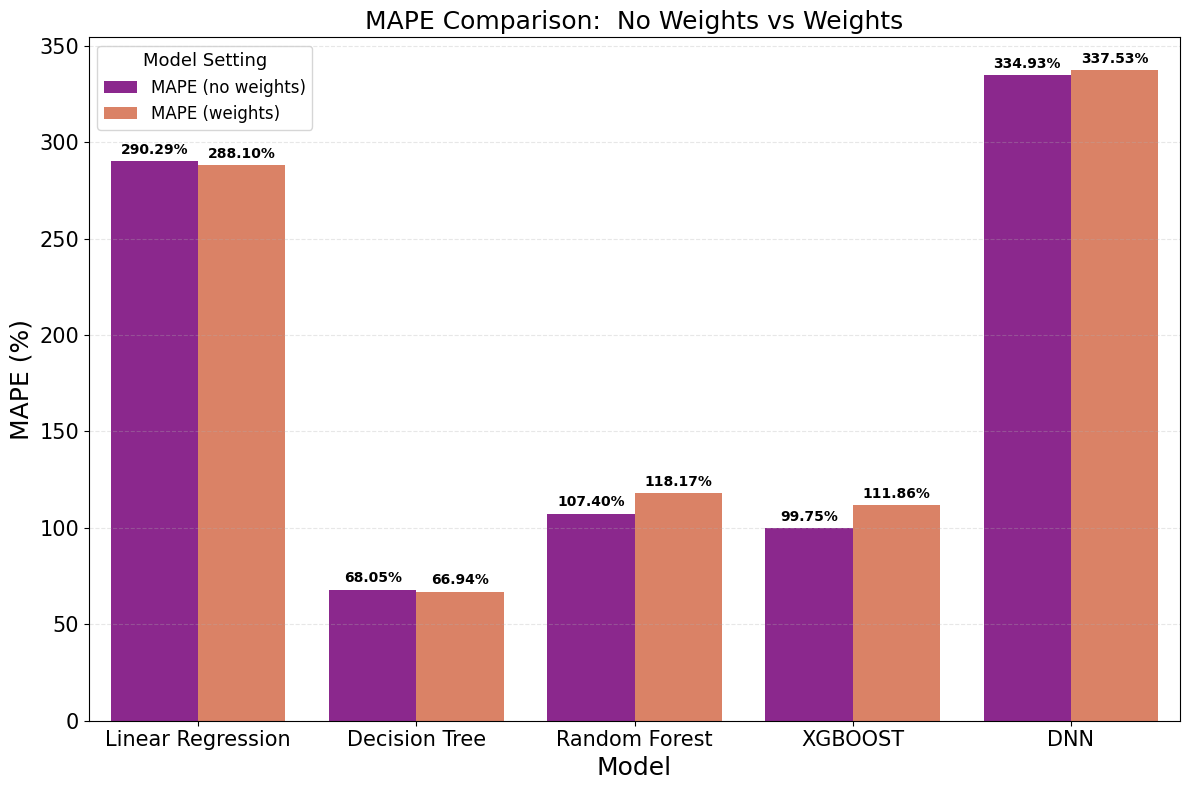

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:
# 3. MAPE Comparison Plot
plt.figure(figsize=(12, 8))
mape_data = melted_df[melted_df['Metric'].str.contains('MAPE')]
ax3 = sns.barplot(x='Model', y='Value', hue='Metric', data=mape_data, palette='plasma')
plt.title('MAPE Comparison:  No Weights vs Weights', fontsize=18)
plt.ylabel('MAPE (%)', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.legend(title='Model Setting', fontsize=12, title_fontsize=13)
add_bar_labels(ax3, fmt="{:.2f}%")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('MAPE_Comparison.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('MAPE_Comparison.png')

## **Transfer Learning**

In [136]:
import numpy as np
from sklearn.model_selection import train_test_split
print("Preparing data for transfer learning...")

# Split unseen country data into adaptation and test sets
X_adapt, X_test_unseen_final, y_adapt, y_test_unseen_final = train_test_split(
    X_test_unseen, y_test_unseen, test_size=0.7, random_state=42)
print(f"Adaptation set size: {len(X_adapt)}")
print(f"Final test set size: {len(X_test_unseen_final)}")
X_train_unseen_final= X_adapt
y_train_unseen_final= y_adapt

Preparing data for transfer learning...
Adaptation set size: 464
Final test set size: 1084


In [137]:
# 1. Transfer Learning Implementation=
results = []

# Helper function to run transfer learning experiments
def run_transfer_experiment(model_name, source_model, baseline_model):
    """Runs transfer learning experiment and returns metrics"""
    # Set seeds for reproducibility
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)

    # Create feature-enhanced datasets
    X_adapt_transfer = X_adapt.copy()
    X_test_transfer = X_test_unseen_final.copy()

    # Add source predictions as new feature
    X_adapt_transfer['source_pred'] = source_model.predict(X_adapt)
    X_test_transfer['source_pred'] = source_model.predict(X_test_unseen_final)

    # Train baseline model (no transfer)
    baseline_model.fit(X_train_final, y_train_final,sample_weight=sample_weights1)
    base_preds = baseline_model.predict(X_test_unseen)

    # Calculate baseline metrics
    base_r2 = round(r2_score(y_test_unseen, base_preds), 4)
    base_mae = round(mean_absolute_error(y_test_unseen, base_preds), 2)
    base_mape = round(mean_absolute_percentage_error(y_test_unseen, base_preds) * 100, 2)

    # Train transfer model
    transfer_model = baseline_model  # Same model type
    transfer_model.fit(X_adapt_transfer, y_adapt)
    transfer_preds = transfer_model.predict(X_test_transfer)

     # Calculate transfer metrics
    transfer_r2 = round(r2_score(y_test_unseen_final, transfer_preds), 4)
    transfer_mae = round(mean_absolute_error(y_test_unseen_final, transfer_preds), 2)
    transfer_mape = round(mean_absolute_percentage_error(y_test_unseen_final, transfer_preds) * 100, 2)


    # Calculate percentage improvements
    r2_improvement_pp = (transfer_r2 - base_r2) * 100  # Percentage points
    r2_improvement_pct = ((transfer_r2 - base_r2) / abs(base_r2)) * 100 if base_r2 != 0 else 0

    mae_improvement_abs = base_mae - transfer_mae
    mae_improvement_pct = (mae_improvement_abs / base_mae) * 100 if base_mae != 0 else 0

    mape_improvement_abs = base_mape - transfer_mape
    mape_improvement_pct = (mape_improvement_abs / base_mape) * 100 if base_mape != 0 else 0
    return {
        'Model': model_name,
        'No Transfer R²': base_r2,
        'Transfer R²': transfer_r2,
        'R² Improvement (pp)': round(r2_improvement_pp, 2),
        'R² Improvement (%)': round(r2_improvement_pct, 2),
        'No Transfer MAE': base_mae,
        'Transfer MAE': transfer_mae,
        'MAE Improvement': round(mae_improvement_abs, 2),
        'MAE Reduction (%)':round(mae_improvement_pct, 2),
        'No Transfer MAPE (%)': base_mape,
        'Transfer MAPE (%)': transfer_mape,
        'MAPE Improvement (%)': round(mape_improvement_abs, 2),
        'MAPE Reduction (%)':  round(mape_improvement_pct, 2)}

# Run experiments for traditional models
models_config = [
    ('Linear Regression', lin_model, LinearRegression(**lin_best_params)),
    ('Decision Tree', dt_model, DecisionTreeRegressor(random_state=42, **dt_best_params)),
    ('Random Forest', rf_model, RandomForestRegressor(random_state=42, **rf_best_params)),
    ('XGBoost', xgb_model,  XGBRegressor(random_state=42, **xgb_best_params))]

for config in models_config:
    results.append(run_transfer_experiment(*config))

In [138]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import clone_model
from tensorflow.keras.optimizers import Adam

# Create a copy of the weighted model for base predictions
base_model = clone_model(weighted_model)
base_model.set_weights(weighted_model.get_weights())

# Create the transfer learning model
transfer_model = clone_model(weighted_model)
transfer_model.set_weights(weighted_model.get_weights())

# Freeze all layers except the last one in the transfer model
for layer in transfer_model.layers[:-1]:
    layer.trainable = False

# Ensure the last layer is trainable
transfer_model.layers[-1].trainable = True

# Recompile the transfer model with a lower learning rate for fine-tuning
transfer_model.compile(
    optimizer=Adam(learning_rate=best_dnn_params['learning_rate'] * 0.1),  # Lower LR for fine-tuning
    loss='mse',
    metrics=['mae'])

# Train (fine-tune) the transfer model on your data
history = transfer_model.fit(X_adapt, y_adapt,
                             sample_weight=sample_weights1,
                             batch_size=32,
                             epochs=50,  # Fewer epochs for fine-tuning
                             validation_split=0.2,verbose=1)

# Generate predictions with both models
dnn_base_preds = base_model.predict(X_test).flatten()
dnn_transfer_preds = transfer_model.predict(X_test).flatten()

# Calculate metrics for both models
dnn_base_r2 = round(r2_score(y_test, dnn_base_preds), 4)
dnn_base_mae = round(mean_absolute_error(y_test, dnn_base_preds), 2)
dnn_base_mape = round(mean_absolute_percentage_error(y_test, dnn_base_preds) * 100, 2)

dnn_transfer_r2 = round(r2_score(y_test_unseen, dnn_transfer_preds), 4)
dnn_transfer_mae = round(mean_absolute_error(y_test_unseen, dnn_transfer_preds), 2)
dnn_transfer_mape = round(mean_absolute_percentage_error(y_test_unseen, dnn_transfer_preds) * 100, 2)

# Calculate percentage improvements
r2_improvement_pp = (dnn_transfer_r2 - dnn_base_r2) * 100  # Percentage points
r2_improvement_pct = ((dnn_transfer_r2 - dnn_base_r2) / abs(dnn_base_r2)) * 100 if dnn_base_r2 != 0 else 0

mae_improvement_abs = dnn_base_mae - dnn_transfer_mae
mae_improvement_pct = (mae_improvement_abs / dnn_base_mae) * 100 if dnn_base_mae != 0 else 0

mape_improvement_abs = dnn_base_mape - dnn_transfer_mape
mape_improvement_pct = (mape_improvement_abs / dnn_base_mape) * 100 if dnn_base_mape != 0 else 0

# Create results dictionary
results.append({
    'Model': 'DNN',
    'No Transfer R²': dnn_base_r2,
    'Transfer R²': dnn_transfer_r2,
    'R² Improvement (pp)': round(r2_improvement_pp, 2),
    'R² Improvement (%)': round(r2_improvement_pct, 2),
    'No Transfer MAE': dnn_base_mae,
    'Transfer MAE': dnn_transfer_mae,
    'MAE Improvement': round(mae_improvement_abs, 2),
    'MAE Reduction (%)': round(mae_improvement_pct, 2),
    'No Transfer MAPE (%)': dnn_base_mape,
    'Transfer MAPE (%)': dnn_transfer_mape,
    'MAPE Improvement (%)': round(mape_improvement_abs, 2),
    'MAPE Reduction (%)': round(mape_improvement_pct, 2)})

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 748220224.0000 - mae: 84645.5469 - val_loss: 377363232.0000 - val_mae: 84661.3516
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 748206976.0000 - mae: 84639.7188 - val_loss: 377357184.0000 - val_mae: 84654.5156
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 748193920.0000 - mae: 84631.5391 - val_loss: 377350816.0000 - val_mae: 84647.4609
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 748180928.0000 - mae: 84623.1719 - val_loss: 377344576.0000 - val_mae: 84640.3750
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 748167936.0000 - mae: 84614.7969 - val_loss: 377338304.0000 - val_mae: 84633.3047
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 748154880.0000 - mae: 84606.4219 - val_loss: 377332064.0000 - val_mae: 84626.2266
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 748142016.0000 - mae: 84598.0547 - val_loss: 377325856.0000 - val_mae: 84619.1719
Epoch 8/50
12/12 ━━

In [139]:
# 3. Results Analysis
# Create results dataframe
results_df = pd.DataFrame(results)
# Format results for better display
display_df = results_df.copy()
print("Transfer Learning Performance Comparison")
# display_df[['Model', 'Baseline R²', 'Transfer R²', 'R² Improvement']]
display_df.head()

Transfer Learning Performance Comparison


Model  No Transfer R²  Transfer R²  R² Improvement (pp)  \
0  Linear Regression          0.0874       0.1517                 6.43   
1      Decision Tree          0.6541       0.8568                20.27   
2      Random Forest          0.5831       0.9267                34.36   
3            XGBoost          0.6398       0.9260                28.62   
4                DNN          0.0192       0.0212                 0.20   

   R² Improvement (%)  No Transfer MAE  Transfer MAE  MAE Improvement  \
0               73.57         74235.12      68552.62          5682.50   
1               30.99         38011.82      21144.33         16867.49   
2               58.93         44592.91      13423.47         31169.44   
3               44.73         40380.07      13270.77         27109.30   
4               10.42         81901.45      81509.99           391.46   

   MAE Reduction (%)  No Transfer MAPE (%)  Transfer MAPE (%)  \
0               7.65                288.10             280.12   
1              44.37                 66.94              58.98   
2              69.90                118.17              32.34   
3              67.14                111.86              31.16   
4               0.48                337.53             334.82   

   MAPE Improvement (%)  MAPE Reduction (%)  
0                  7.98                2.77  
1                  7.96               11.89  
2                 85.83               72.63  
3                 80.70               72.14  
4                  2.71                0.80

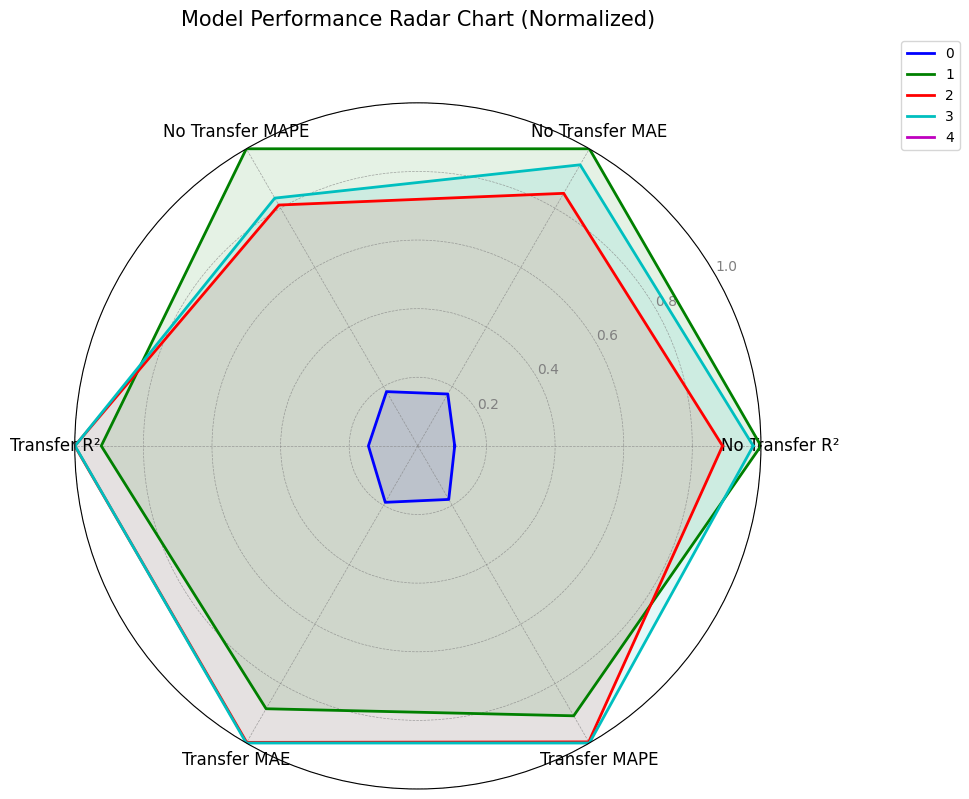

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
# Set the Model column as the index
models = display_df.index.tolist()
# Radar chart for model comparison
fig = plt.figure(figsize=(10, 10))
categories = ['No Transfer R²', 'No Transfer MAE', 'No Transfer MAPE (%)',
              'Transfer R²', 'Transfer MAE', 'Transfer MAPE (%)']
N = len(categories)

# Normalize the data for radar chart (since metrics have different scales)
normalized_df = display_df.copy()
# Also update the normalization code:
for col in ['No Transfer R²', 'Transfer R²']:
    normalized_df[col] = (normalized_df[col] - normalized_df[col].min()) / (normalized_df[col].max() - normalized_df[col].min())

for col in ['No Transfer MAE', 'Transfer MAE', 'No Transfer MAPE (%)', 'Transfer MAPE (%)']:
    # For metrics where lower is better, we invert the scale
    normalized_df[col] = 1 - ((normalized_df[col] - normalized_df[col].min()) /
                             (normalized_df[col].max() - normalized_df[col].min()))

# Calculate angles for radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the circle

# Create subplot
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.ylim(0, 1)

# Improve category labels with better formatting
category_labels = ['No Transfer R²', 'No Transfer MAE', 'No Transfer MAPE',
              'Transfer R²', 'Transfer MAE', 'Transfer MAPE']

plt.xticks(angles[:-1], category_labels, color='black', size=12, ha='center', va='center')
ax.set_rlabel_position(30)  # Move radial labels to a better position
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"],
           color="grey", size=10)
plt.ylim(0, 1)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot each model
colors = ['b', 'g', 'r', 'c', 'm']
for i, model in enumerate(models):
    values = normalized_df.loc[model, categories].values.flatten().tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

plt.title('Model Performance Radar Chart (Normalized)', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
# Save the radar chart
plt.savefig('model_radar_chart2.jpg', dpi=300, bbox_inches='tight')
plt.show()

files.download('model_radar_chart2.jpg')

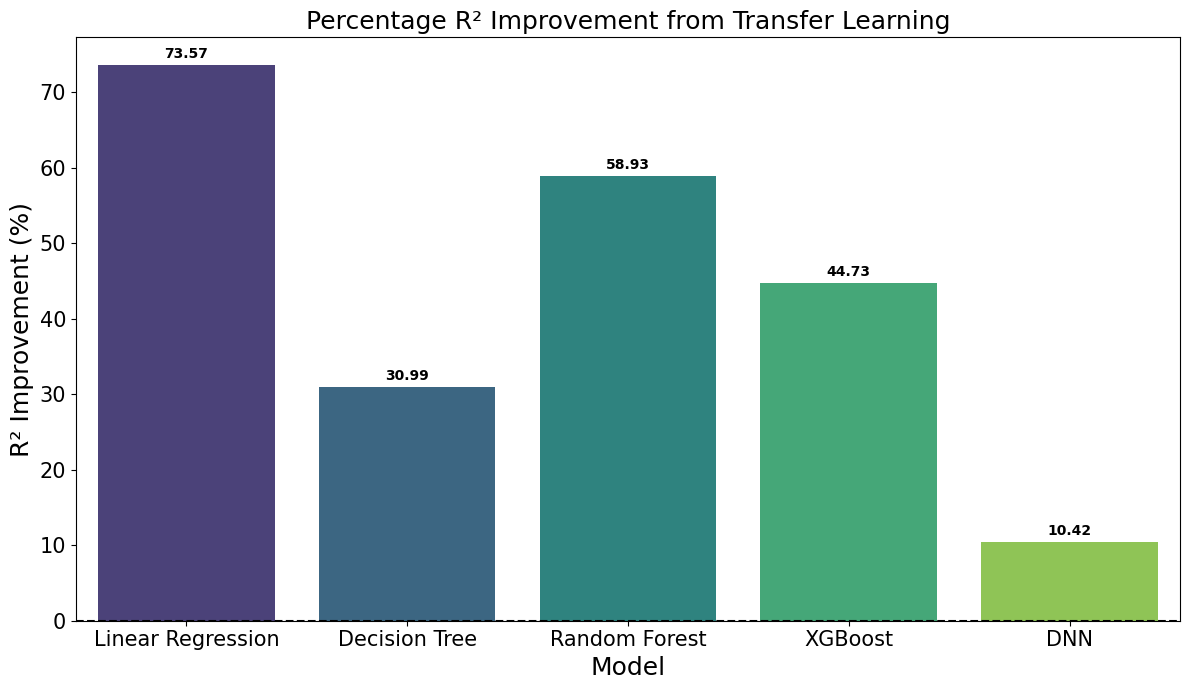

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
# Visualize R² improvement
plt.figure(figsize=(12, 7))
ax=sns.barplot(x='Model', y='R² Improvement (%)',
            data=results_df, palette='viridis')

add_bar_labels(ax, fmt="{:.2f}")
plt.title('Percentage R² Improvement from Transfer Learning',fontsize=18)
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('R² Improvement (%)',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('R²_Trans_Improve.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('R²_Trans_Improve.png')

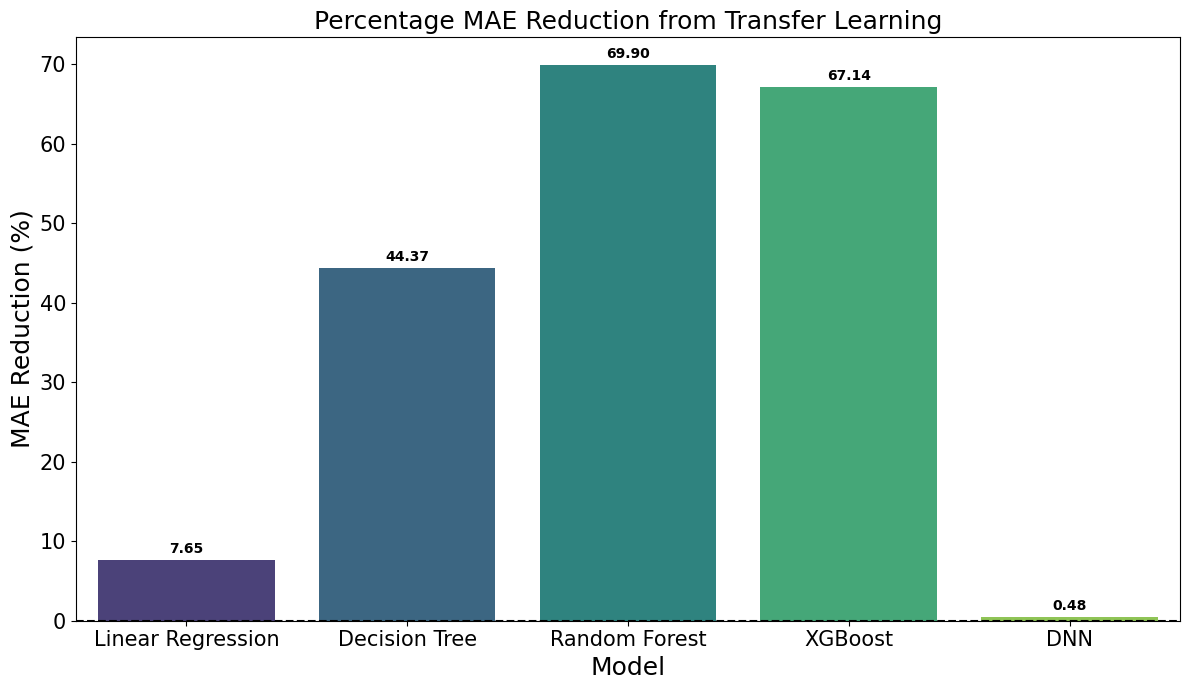

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
# Visualize R² improvement
plt.figure(figsize=(12, 7))
ax=sns.barplot(x='Model', y='MAE Reduction (%)',
            data=results_df, palette='viridis')
add_bar_labels(ax, fmt="{:.2f}")
plt.title('Percentage MAE Reduction from Transfer Learning',fontsize=18)
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('MAE Reduction (%)',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Percent_MAE_Trans_Reduct.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Percent_MAE_Trans_Reduct.png')

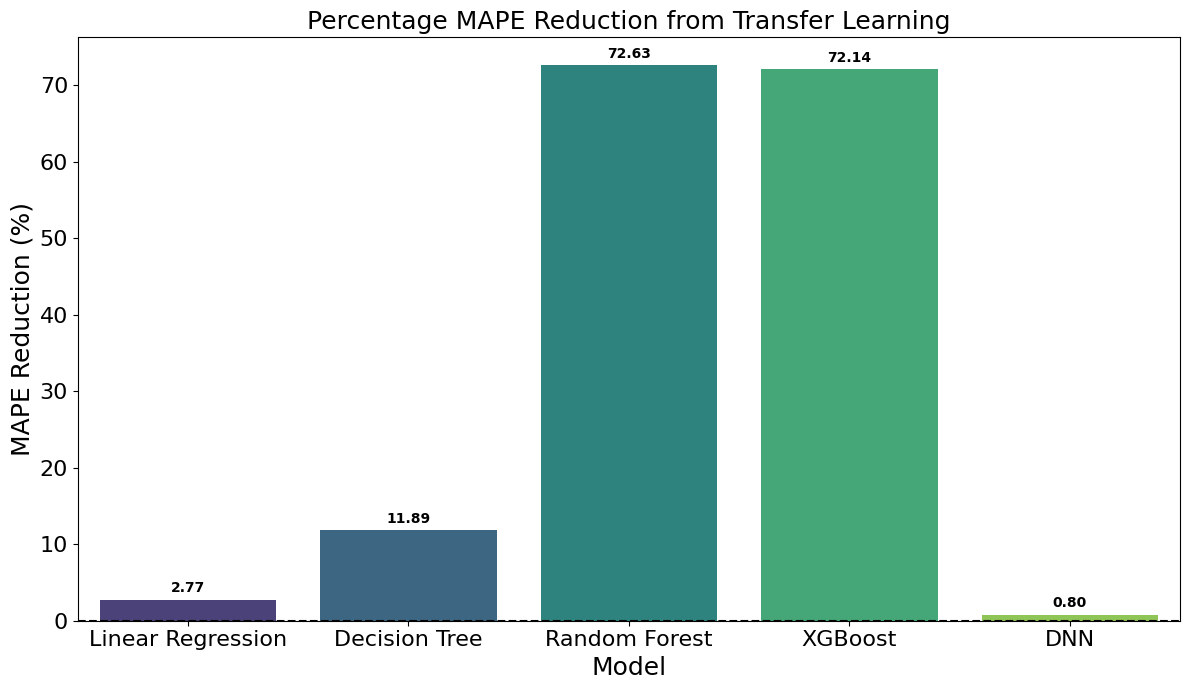

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
# Visualize R² improvement
plt.figure(figsize=(12, 7))
ax=sns.barplot(x='Model', y='MAPE Reduction (%)',
            data=results_df, palette='viridis')
add_bar_labels(ax, fmt="{:.2f}")
plt.title('Percentage MAPE Reduction from Transfer Learning',fontsize=18)
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('MAPE Reduction (%)',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Percent_MAPE_Trans_Reduct.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Percent_MAPE_Trans_Reduct.png')

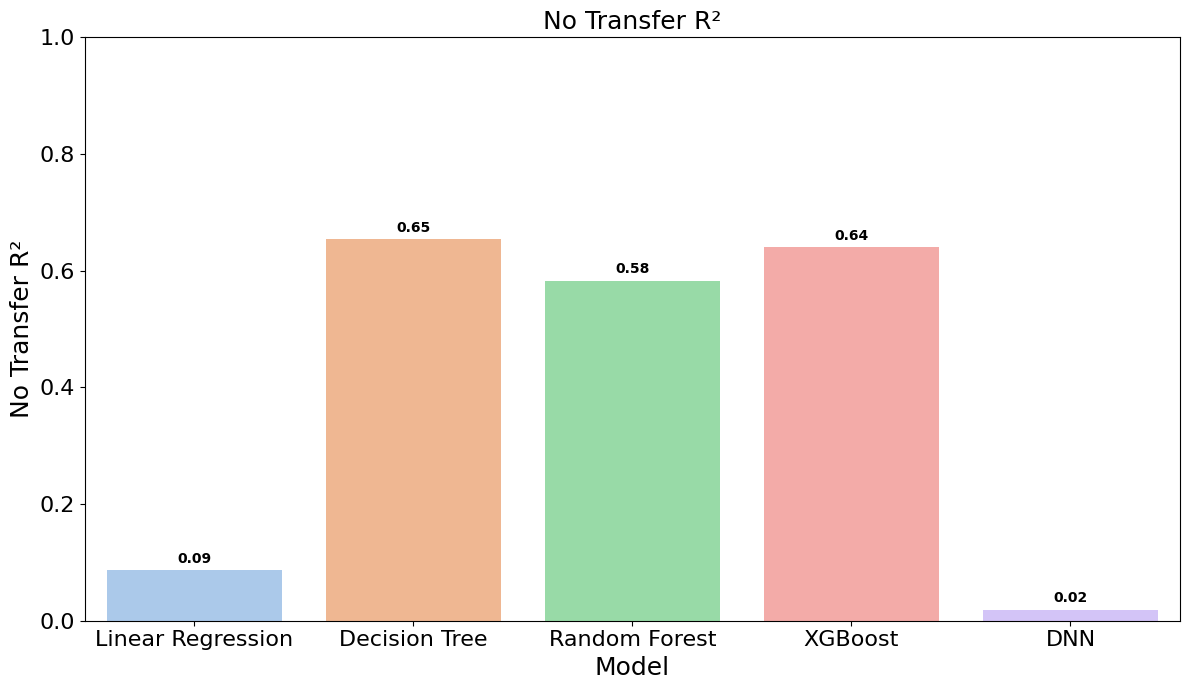

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [144]:
# 4. Performance Comparison Plot
plt.figure(figsize=(12, 7))
# Baseline R² comparison
ax = sns.barplot(x='Model', y='No Transfer R²',
            data=results_df, palette='pastel')
add_bar_labels(ax, fmt="{:.2f}")
plt.title('No Transfer R²',fontsize=18)
plt.ylim(0, 1)
plt.ylabel('No Transfer R²',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('No_Transfer_R².png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('No_Transfer_R².png')

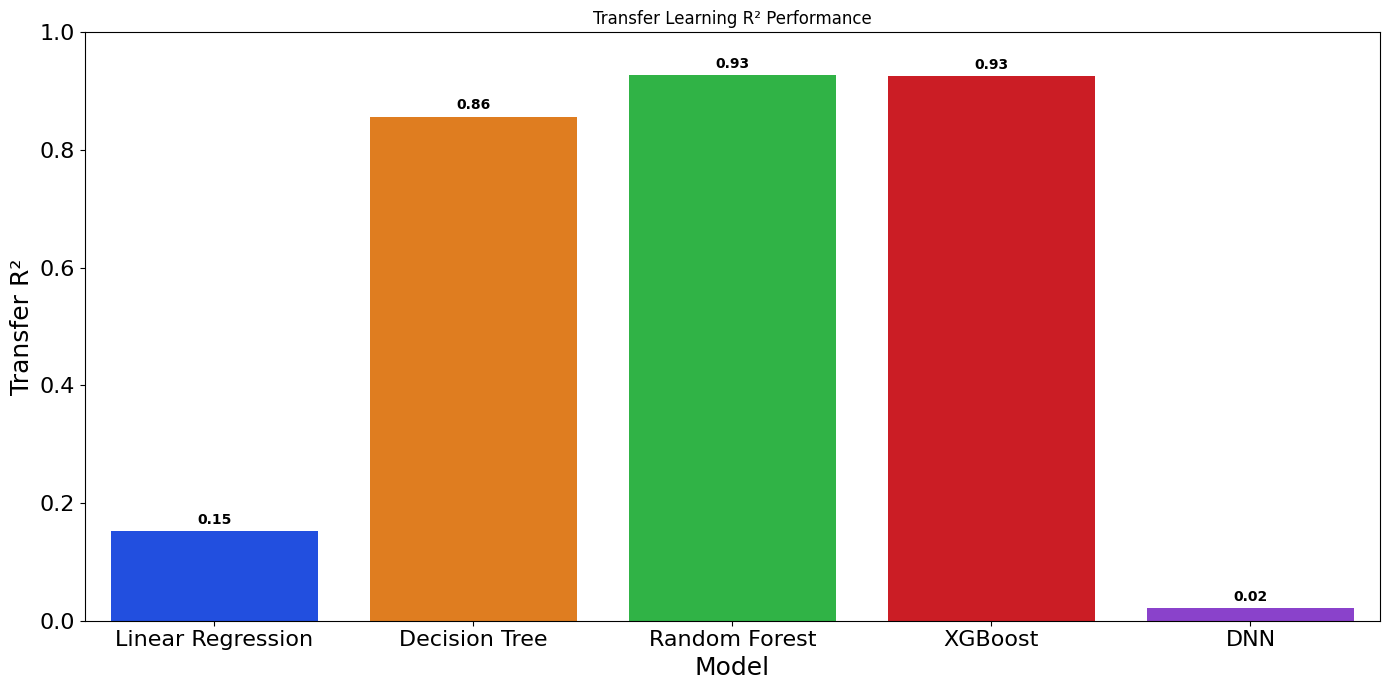

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
# Transfer R² comparison
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Model', y='Transfer R²',
            data=results_df, palette='bright')

add_bar_labels(ax, fmt="{:.2f}")
plt.title('Transfer Learning R² Performance')
plt.ylim(0, 1)
plt.ylabel('Transfer R²',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Transfer_R².png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Transfer_R².png')

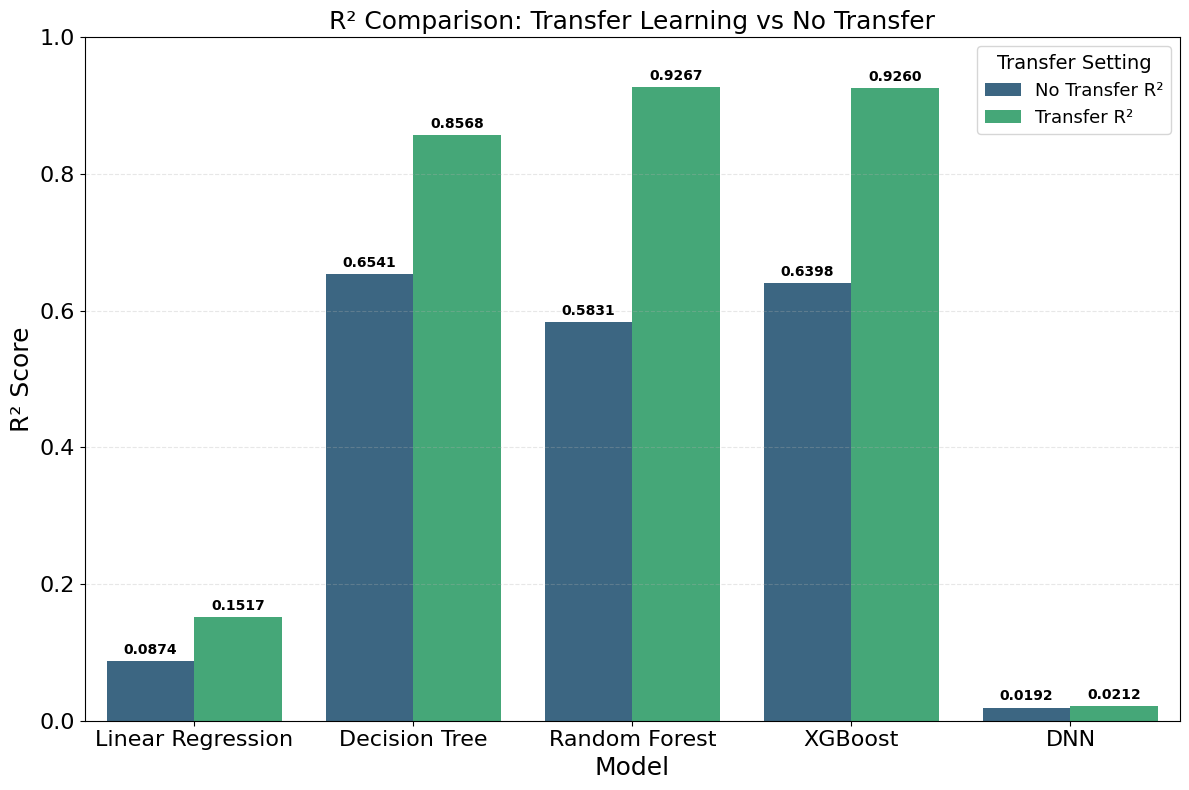

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
# 3. Detailed Metric Visualization
# Melt DataFrame for better plotting
melted_df = display_df.reset_index().melt(id_vars='Model',
                                            value_vars=['No Transfer R²', 'Transfer R²',
                                                        'No Transfer MAE', 'Transfer MAE',
                                                        'No Transfer MAPE (%)', 'Transfer MAPE (%)'],
                                            var_name='Metric',
                                            value_name='Value')

# 1. R² Comparison Plot
plt.figure(figsize=(12, 8))
r2_data = melted_df[melted_df['Metric'].str.contains('R²')]
ax1 = sns.barplot(x='Model', y='Value', hue='Metric', data=r2_data, palette='viridis')
plt.title('R² Comparison: Transfer Learning vs No Transfer', fontsize=18)
plt.ylabel('R² Score', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.legend(title='Transfer Setting', fontsize=13, title_fontsize=14)
add_bar_labels(ax1, fmt="{:.4f}")
plt.ylim(0, 1.0)  # R² range is 0-1
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('R²_Comparison_Transfer.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('R²_Comparison_Transfer.png')

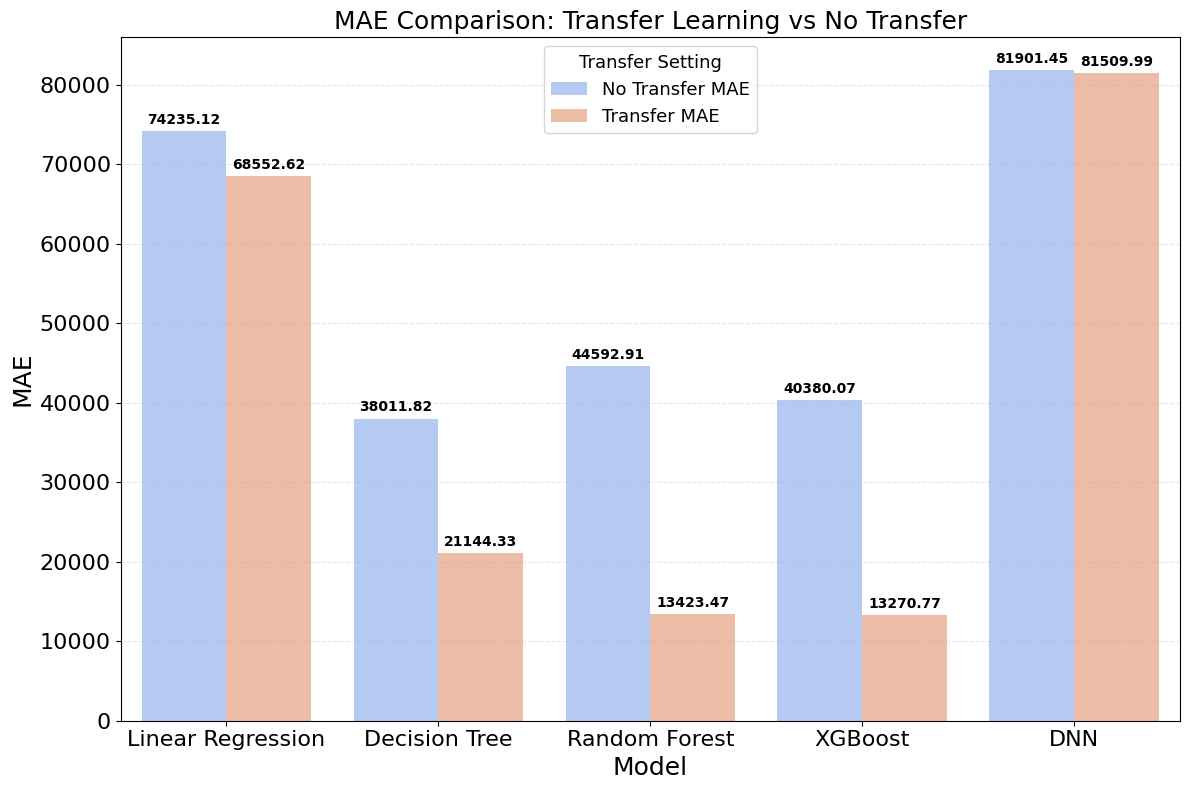

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
# 2. MAE Comparison Plot
plt.figure(figsize=(12, 8))
mae_data = melted_df[melted_df['Metric'].str.contains('MAE')]
ax2 = sns.barplot(x='Model', y='Value', hue='Metric', data=mae_data, palette='coolwarm')
plt.title('MAE Comparison: Transfer Learning vs No Transfer', fontsize=18)
plt.ylabel('MAE', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.legend(title='Transfer Setting', fontsize=13, title_fontsize=13)
add_bar_labels(ax2, fmt="{:.2f}")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('MAE_Comparison_Transfer.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('MAE_Comparison_Transfer.png')

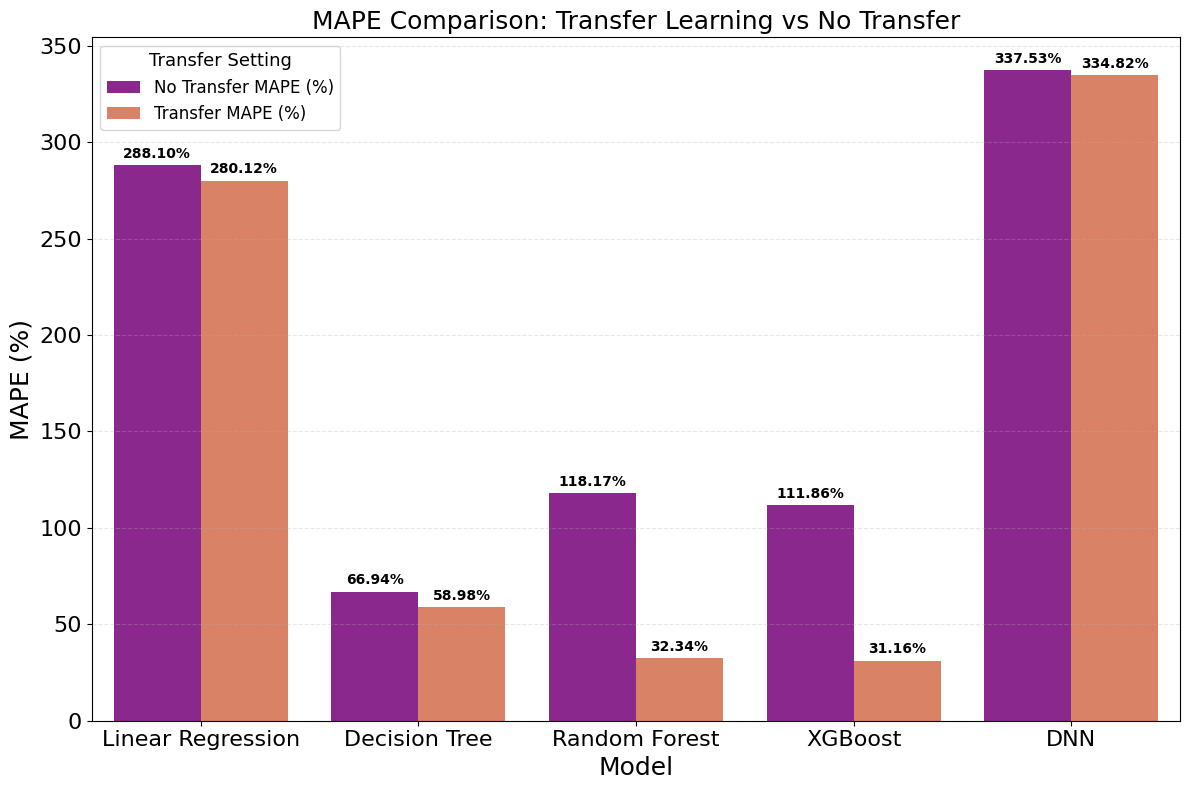

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
# 3. MAPE Comparison Plot
plt.figure(figsize=(12, 8))
mape_data = melted_df[melted_df['Metric'].str.contains('MAPE')]
ax3 = sns.barplot(x='Model', y='Value', hue='Metric', data=mape_data, palette='plasma')
plt.title('MAPE Comparison: Transfer Learning vs No Transfer', fontsize=18)
plt.ylabel('MAPE (%)', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.legend(title='Transfer Setting', fontsize=12, title_fontsize=13)
add_bar_labels(ax3, fmt="{:.2f}%")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('MAPE_Comparison_Transfer.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('MAPE_Comparison_Transfer.png')

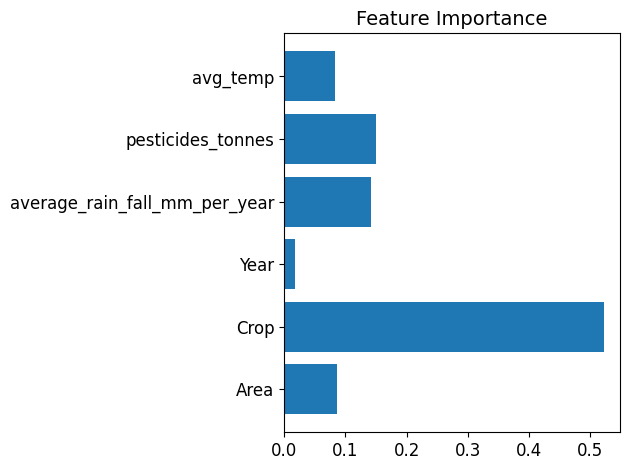

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
# Plot feature importance for Random Forest
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state= 42,**rf_best_params).fit(X_train_final, y_train_final, sample_weights1)
plt.barh(X_train_time.columns, model.feature_importances_)
plt.title('Feature Importance',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Tidy up layout
plt.tight_layout()
# Save with higher resolution
plt.savefig('Feature_Importance1.png',dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
# Download the file in Google Colab
files.download('Feature_Importance1.png')